In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import requests
import csv
#from ib_insync import *
import nest_asyncio
from tqdm.notebook import tqdm
nest_asyncio.apply()
import io
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Below are our targeted Y

In [559]:
EV_companies_list = ['TSLA.US', 'NIO.US','HYMTF.US',
                       'TM.US','LI.US','NSANY.US','GM.US','F.US','BYDDF.US','XPEV.US','RIVN.US']

In [7]:
up_list = ['ALB.US', '1772.HK','002466.SHE','0TWH.LSE','SQM.US','MIN.AU','LTHM.US']

In [ ]:
mid_list = ['VAR1.STU']

In [ ]:
refine_list = ['']

In [560]:
mining_comp_list = ['SLI.US','ALB.US','SQM.US','1772.Hk','002466.SHE',
                    'LTHM.US','PLL.US','LAC.US','ORE.AU','GALXF.US','ENS.US','VUL.AU','EMHLF.US','CRE.V']

In [561]:
mining_comp_list = ['SLI.US','ALB.US','SQM.US','1772.HK','002466.SHE',
                    'LTHM.US','PLL.US','LAC.US','ORE.AU','GALXF.US','ENS.US','VUL.AU','CRE.V']

In [ ]:
ETF_list = ['LIT.US','BATT.US','CHRG.US','HLIT.TO',
            'ACDC.AU','LITU.LSE','LI7U.XETRA','LITG.LSE','394670.KO','LITU.SW',
            'LIT.V', 'LIT.LSE','ARKQ.US','QCLN.US','ICLN.US','TAN.US','PBW.US']

* HLIT.TO: The Horizons Global Lithium Producers Index ETF is an exchange-traded fund (ETF) whose objective is to track the performance of the Solactive Global Lithium Index. The index is made up of the world's major lithium production and lithium battery manufacturing companies, so by purchasing this ETF, investors can gain broad exposure to the global lithium industry.

* LI7U.XETRA: "Global X Lithium & Battery Tech UCITS ETF USD Acc (LI7U XETRA)" is an Exchange Traded Fund (ETF for short) traded on the XETRA exchange in Germany. The investment objective of this ETF is to track the performance of global lithium mining and battery technology companies. Its benchmark index is the Solactive Global Lithium Index, which includes global lithium mining and battery technology-related companies.

* LITG.LSE: Global X Lithium & Battery Tech UCITS ETF USD Acc GBP (LITG LSE)" is an Exchange-Traded Fund (ETF) listed on the London Stock Exchange (LSE). The investment strategy of this ETF is mainly concentrated in the field of lithium battery technology. Its investment objective is to track the performance of the global lithium battery technology industry, including companies in lithium mining, lithium battery manufacturing and battery technology.

* LI7U.XETRA and LITG.LSE are the same in investment strategy. They are both ETFs that track the performance of the global lithium battery technology industry, including companies in lithium mining, lithium battery manufacturing, and battery technology. The investment objective of both is to track the performance of the Global X Lithium & Battery Tech Index.

* The difference between them is that LI7U is listed on the XETRA exchange in Germany, and the trading currency is the euro; while LITG is listed on the London Stock Exchange in the UK, and the trading currency is the British pound. Both NAVs are denominated in U.S. dollars and traded on their respective exchanges in their respective trading currencies.

* ARKQ.US: The ARK Autonomous Technology & Robotics ETF (ARKQ) does not directly focus on the lithium market or the lithium mining industry. However, its portfolio may include some companies that utilize or produce lithium batteries, such as electric vehicle makers or high-tech manufacturing companies. The success of these companies may indirectly depend on the state of the lithium market, an essential component of modern rechargeable batteries.

* Lithium, however, is just one of the many technologies and industries that this ETF focuses on. The ETF's main focus is automation, robotics, energy storage (including lithium batteries), and other related advanced technologies.

* Overall, while this ETF may contain some lithium-related investments, it is not an ETF specifically focused on lithium or battery technology. So, if your primary goal is to invest in the lithium market, you may need to find an investment vehicle that focuses more specifically on this sector.

* Revised: some ETFs are not realted: ARKQ.US

In [ ]:
ETF_list = ['LIT.US','BATT.US','CHRG.US','HLIT.TO',
            'ACDC.AU','LITU.LSE','LI7U.XETRA','LITG.LSE','394670.KO','LITU.SW',
            'LIT.V', 'LIT.LSE','QCLN.US','ICLN.US','TAN.US','PBW.US']

In [127]:
Lithium_Battery_list = ['PCRFY.US','051910.KO','300750.SHE',
                        '006400.KO','MRAAF.US','300014.SHE','ENR.US','1211.HK','SONY.US']

* LITH-ETH refers to the trading pair between Lith Token and Ethereum. Lith Token is a token in the Lithium Finance ecosystem, while Ethereum is a blockchain platform and cryptocurrency. The LITH-ETH trading pair allows users to trade and exchange between Lith Token and Ethereum.

## Lithium Carbonate (from wind database)

* Start from 2005

In [2]:
df_Y = pd.read_excel('./Data/Li2CO3 & LiOH_Leo.xlsx')

In [27]:
df_Y = df_Y.rename(columns={'Index': 'Date'})
df_Y.set_index('Date', inplace = True)

In [28]:
df_Lico = df_Y['Li2CO3 99%']
df_Lioh = df_Y['LiOH 56.5%']
df_Lico_1 = df_Lico
df_Lioh_1 = df_Lioh
df_Lico = df_Lico = np.log(df_Lico / df_Lico.shift(1))
df_Lioh = df_Lioh = np.log(df_Lioh / df_Lioh.shift(1))
df_Lico_2 = df_Lico
df_Lioh_2 = df_Lioh

/Users/yangli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


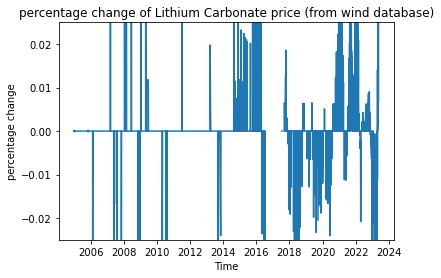

In [29]:
plt.plot(df_Lico.index,df_Lico)

plt.ylim(-0.025, 0.025)
plt.xlabel('Time')
plt.ylabel('percentage change')
plt.title('percentage change of Lithium Carbonate price (from wind database)')

plt.show()

In [31]:
df_Lico_1.to_csv('./Data/Lithium Carbonate.csv', index=True)
df_Lioh_1.to_csv('./Data/Lithium Hydroxide.csv', index=True)

### Calculate Zeros (task assigned by Prof.Geert)

#### Monthly

In [1069]:
df_Lico = df_Lico.to_frame('Lico_return')
df_Lico = df_Lico[1:]
df_Lico['return_is_zero'] = (df_Lico['Lico_return'] == 0).astype(int)
df_Lico_zero_M = df_Lico['return_is_zero'].resample('M').sum() / df_Lico['return_is_zero'].resample('M').size()
df_Lico_zero_M = df_Lico_zero_M.to_frame()

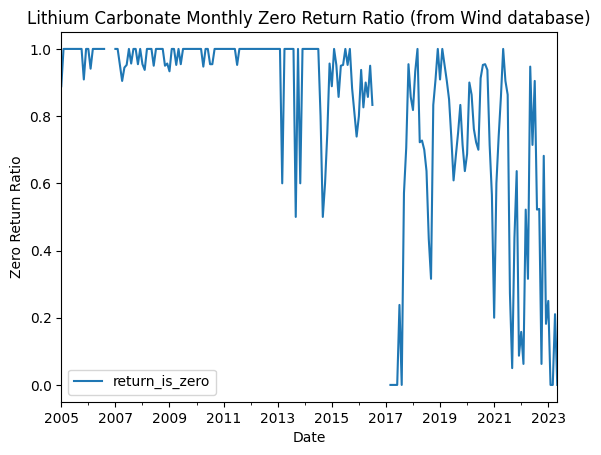

In [1072]:
df_Lico_zero_M.plot(kind='line')
plt.title('Lithium Carbonate Monthly Zero Return Ratio (from Wind database)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

#### Yearly

In [1073]:
df_Lico_zero_Y = df_Lico['return_is_zero'].resample('Y').sum() / df_Lico['return_is_zero'].resample('Y').size()
df_Lico_zero_Y = df_Lico_zero_Y.to_frame()

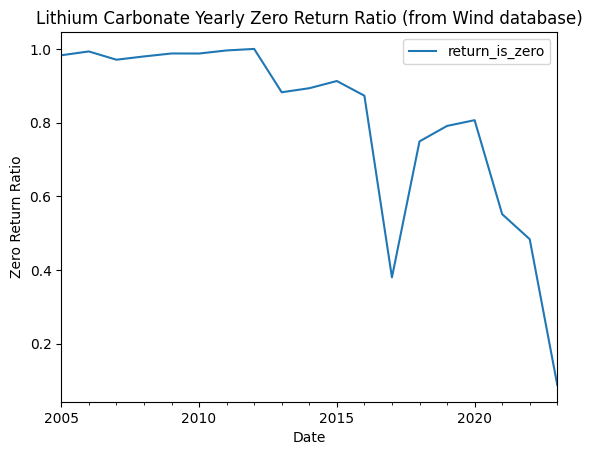

In [1074]:
df_Lico_zero_Y.plot(kind='line')
plt.title('Lithium Carbonate Yearly Zero Return Ratio (from Wind database)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

In [1075]:
df_Lico_zero_Y

return_is_zero
Date                      
2005-12-31        0.982833
2006-12-31        0.993151
2007-12-31        0.970711
2008-12-31        0.979592
2009-12-31        0.987654
2010-12-31        0.987500
2011-12-31        0.995902
2012-12-31        1.000000
2013-12-31        0.882353
2014-12-31        0.893333
2015-12-31        0.912863
2016-12-31        0.873016
2017-12-31        0.379888
2018-12-31        0.748971
2019-12-31        0.790984
2020-12-31        0.806584
2021-12-31        0.551440
2022-12-31        0.483471
2023-12-31        0.087912

## Lithium Hydroxide (from wind database)

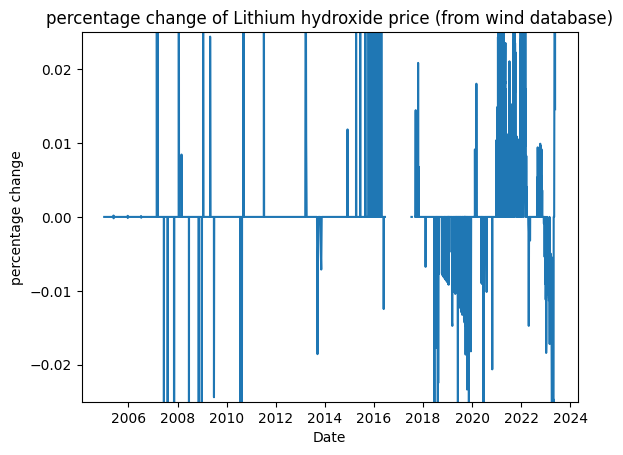

In [1076]:
plt.plot(df_Lioh.index,df_Lioh)

plt.ylim(-0.025, 0.025)
plt.xlabel('Date')
plt.ylabel('percentage change')
plt.title('percentage change of Lithium hydroxide price (from wind database)')

plt.show()

In [1077]:
df_Lioh.to_csv('./Data/Lithium Hydroxide.csv', index=True)

### Calculate Zeros

#### Monthly

In [1078]:
df_Lioh = df_Lioh.iloc[1:]
df_Lioh = df_Lioh.to_frame('Lioh_return')
df_Lioh['return_is_zero'] = (df_Lioh['Lioh_return'] == 0).astype(int)

In [1079]:
df_Lioh_zero_M = df_Lioh['return_is_zero'].resample('M').sum() / df_Lioh['return_is_zero'].resample('M').size()
df_Lioh_zero_M = df_Lioh_zero_M.to_frame()

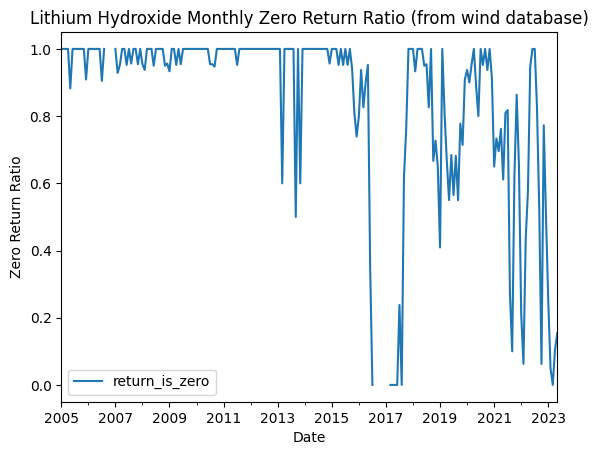

In [1080]:
df_Lioh_zero_M.plot(kind='line')
plt.title('Lithium Hydroxide Monthly Zero Return Ratio (from wind database)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

#### Yearly

In [1081]:
df_Lioh_zero_Y = df_Lioh['return_is_zero'].resample('Y').sum() / df_Lioh['return_is_zero'].resample('Y').size()
df_Lioh_zero_Y = df_Lioh_zero_Y.to_frame()

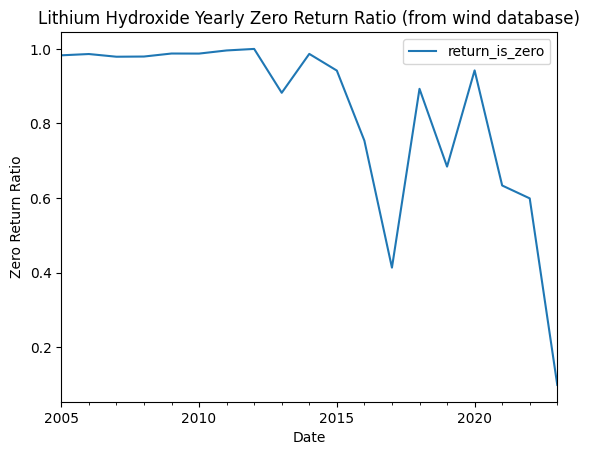

In [1082]:
df_Lioh_zero_Y.plot(kind='line')
plt.title('Lithium Hydroxide Yearly Zero Return Ratio (from wind database)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

## Lithium Carbonate 99%Min China Spot Historical Data (from Investing.com)

In [1083]:
df_LitCarb = pd.read_csv('./Data/Lithium Carbonate 99%Min China Spot Historical Data.csv') 
df_LitCarb['Date'] = pd.to_datetime(df_LitCarb['Date'])
df_LitCarb = df_LitCarb[::-1]
df_LitCarb = df_LitCarb.reset_index(drop=True)
df_LitCarb

Date       Price        Open        High         Low  Vol. Change %
0    2017-05-10  123,000.00  123,000.00  127,000.00  119,000.00   NaN    0.00%
1    2017-05-11  123,000.00  123,000.00  127,000.00  119,000.00   NaN    0.00%
2    2017-05-12  123,000.00  123,000.00  127,000.00  119,000.00   NaN    0.00%
3    2017-05-15  123,000.00  123,000.00  127,000.00  119,000.00   NaN    0.00%
4    2017-05-16  123,000.00  123,000.00  127,000.00  119,000.00   NaN    0.00%
...         ...         ...         ...         ...         ...   ...      ...
1353 2022-12-26  492,500.00  492,500.00  495,000.00  490,000.00   NaN   -1.01%
1354 2022-12-27  482,500.00  482,500.00  485,000.00  480,000.00   NaN   -2.03%
1355 2022-12-28  482,500.00  482,500.00  485,000.00  480,000.00   NaN    0.00%
1356 2022-12-29  477,500.00  477,500.00  480,000.00  475,000.00   NaN   -1.04%
1357 2022-12-30  474,500.00  474,500.00  477,000.00  472,000.00   NaN   -0.63%

[1358 rows x 7 columns]

In [1084]:
df_LitCarb.loc[:, ['Price', 'Open', 'High', 'Low']] = df_LitCarb.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_LitCarb['Price'] = pd.to_numeric(df_LitCarb['Price'])
stats = pd.DataFrame(df_LitCarb['Price'].describe())
print(stats)
# 将 'date' 列设置为索引
df_LitCarb['Date'] = pd.to_datetime(df_LitCarb['Date'])
df_LitCarb.set_index('Date', inplace=True)

               Price
count    1358.000000
mean   154178.792342
std    152799.488422
min     33500.000000
25%     57000.000000
50%     82000.000000
75%    152000.000000
max    581500.000000


/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


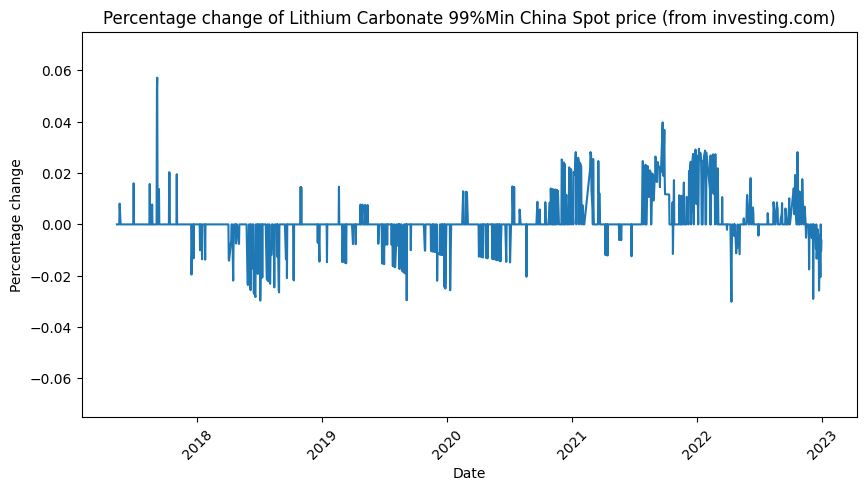

In [1085]:
# 绘制时间序列图
for col in df_LitCarb.columns:
    df_LitCarb[col] = pd.to_numeric(df_LitCarb[col], errors='coerce')

df_LitCarb_1 = df_LitCarb['Price'] # Store the price 
df_LitCarb = np.log(df_LitCarb / df_LitCarb.shift(1))
df_LitCarb_2 = df_LitCarb['Price'] # Store the return 

plt.figure(figsize=(10, 5))
plt.plot(df_LitCarb.index, df_LitCarb['Price'])
plt.xlabel('Date')
plt.ylabel('Percentage change')
plt.title('Percentage change of Lithium Carbonate 99%Min China Spot price (from investing.com)')
plt.xticks(rotation=45)
plt.ylim(-0.075, 0.075)
plt.show()

### Calculate zeros

##### Monthly

In [1086]:
df_LitCarb = df_LitCarb['Price']
df_LitCarb = df_LitCarb.iloc[1:]
df_LitCarb = df_LitCarb.to_frame('LitCarb_return')

In [1087]:
df_LitCarb['return_is_zero'] = (df_LitCarb['LitCarb_return'] == 0).astype(int)

In [1088]:
df_LitCarb_zero_M = df_LitCarb['return_is_zero'].resample('M').sum() / df_LitCarb['return_is_zero'].resample('M').size()
df_LitCarb_zero_M = df_LitCarb_zero_M.to_frame()

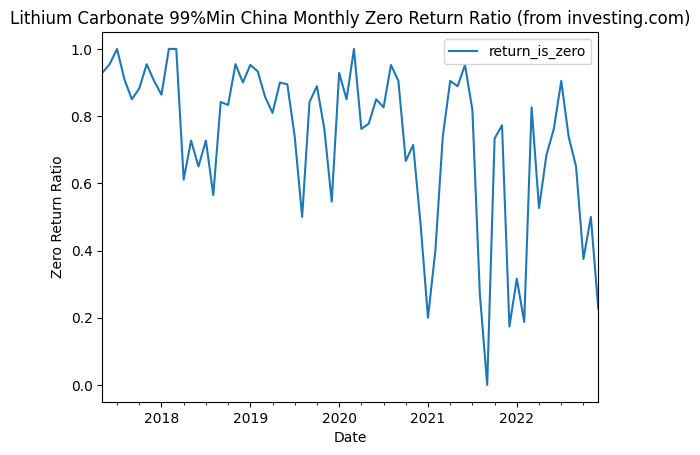

In [1089]:
df_LitCarb_zero_M.plot(kind='line')
plt.title('Lithium Carbonate 99%Min China Monthly Zero Return Ratio (from investing.com)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

##### Yearly

In [1090]:
df_LitCarb_zero_Y = df_LitCarb['return_is_zero'].resample('Y').sum() / df_LitCarb['return_is_zero'].resample('Y').size()
df_LitCarb_zero_Y = df_LitCarb_zero_Y.to_frame()

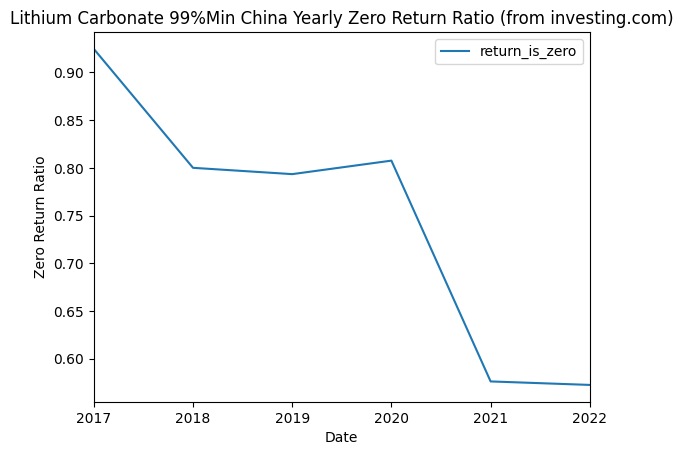

In [1091]:
df_LitCarb_zero_Y.plot(kind='line')
plt.title('Lithium Carbonate 99%Min China Yearly Zero Return Ratio (from investing.com)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

In [1092]:
df_LitCarb_zero_Y

return_is_zero
Date                      
2017-12-31        0.924528
2018-12-31        0.800000
2019-12-31        0.793388
2020-12-31        0.807531
2021-12-31        0.576271
2022-12-31        0.572614

## 99%min China Lithium Metal Spot (from Investing.com)

In [1093]:
df_Lit = pd.read_csv('./Data/99%min China Lithium Metal Spot Historical Data.csv')
df_Lit['Date'] = pd.to_datetime(df_Lit['Date'])
df_Lit = df_Lit[::-1]
df_Lit = df_Lit.reset_index(drop=True)
df_Lit

Date      Price       Open       High        Low  Vol. Change %
0    2017-05-10    830,000    830,000    850,000    810,000   NaN    0.00%
1    2017-05-11    830,000    830,000    850,000    810,000   NaN    0.00%
2    2017-05-12    830,000    830,000    850,000    810,000   NaN    0.00%
3    2017-05-15    830,000    830,000    850,000    810,000   NaN    0.00%
4    2017-05-16    830,000    830,000    850,000    810,000   NaN    0.00%
...         ...        ...        ...        ...        ...   ...      ...
1353 2022-12-26  2,990,000  2,990,000  3,000,000  2,980,000   NaN    0.00%
1354 2022-12-27  2,990,000  2,990,000  3,000,000  2,980,000   NaN    0.00%
1355 2022-12-28  2,990,000  2,990,000  3,000,000  2,980,000   NaN    0.00%
1356 2022-12-29  2,990,000  2,990,000  3,000,000  2,980,000   NaN    0.00%
1357 2022-12-30  2,990,000  2,990,000  3,000,000  2,980,000   NaN    0.00%

[1358 rows x 7 columns]

          Open
count     1358
unique     157
top     865000
freq       114


/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


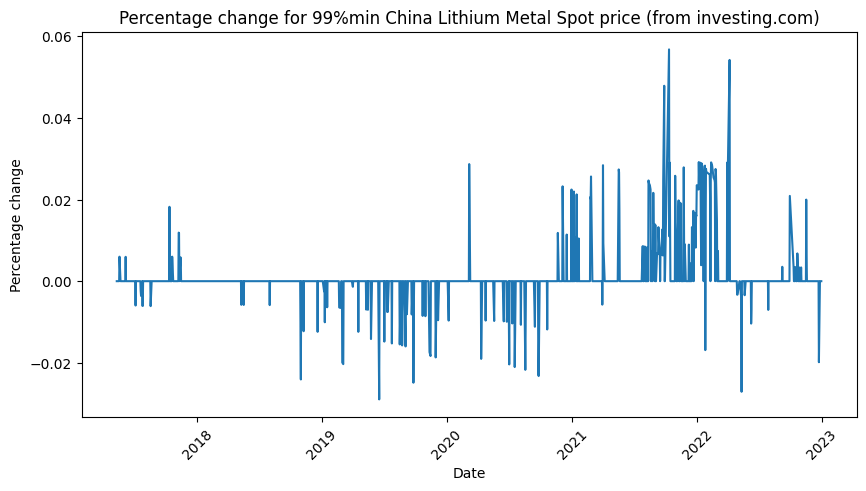

In [1094]:
df_Lit.loc[:, ['Price', 'Open', 'High', 'Low']] = df_Lit.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_Lit['Price'] = pd.to_numeric(df_Lit['Price'])
stats = pd.DataFrame(df_Lit['Open'].describe())
print(stats)
# 将 'date' 列设置为索引
df_Lit['Date'] = pd.to_datetime(df_Lit['Date'])
df_Lit.set_index('Date', inplace=True)

for col in df_Lit.columns:
    df_Lit[col] = pd.to_numeric(df_Lit[col], errors='coerce')
    
df_Lit_1 = df_Lit['Price'] # Store the price 
df_Lit = np.log(df_Lit / df_Lit.shift(1))
df_Lit_2 = df_Lit['Price'] # Store the return

# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(df_Lit.index, df_Lit['Price'])
plt.xlabel('Date')
plt.ylabel('Percentage change')
plt.title('Percentage change for 99%min China Lithium Metal Spot price (from investing.com)')
plt.xticks(rotation=45)
plt.show()

#### Caculate zeros

#### Monthly

In [1095]:
df_Lit = df_Lit['Price']
df_Lit = df_Lit.iloc[1:]
df_Lit = df_Lit.to_frame('Lit_return')
df_Lit['return_is_zero'] = (df_Lit['Lit_return'] == 0).astype(int)
df_Lit_zero_M = df_Lit['return_is_zero'].resample('M').sum() / df_Lit['return_is_zero'].resample('M').size()
df_Lit_zero_M = df_Lit_zero_M.to_frame()

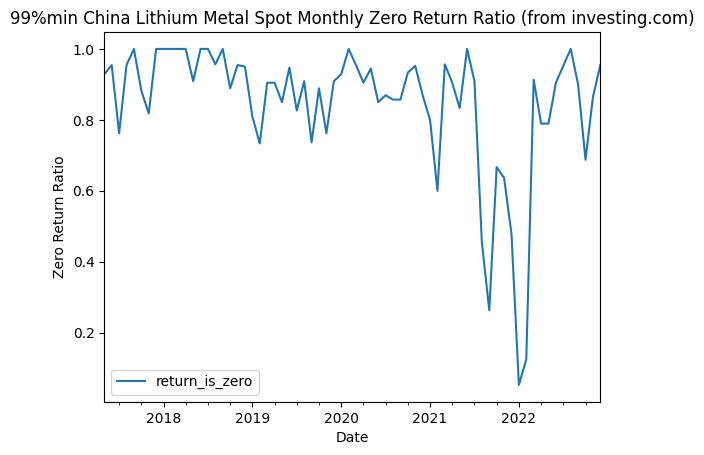

In [1098]:
df_Lit_zero_M.plot(kind='line')
plt.title('99%min China Lithium Metal Spot Monthly Zero Return Ratio (from investing.com)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

#### Yearly

In [1099]:
df_Lit_zero_Y = df_Lit['return_is_zero'].resample('Y').sum() / df_Lit['return_is_zero'].resample('Y').size()
df_Lit_zero_Y = df_Lit_zero_Y.to_frame()

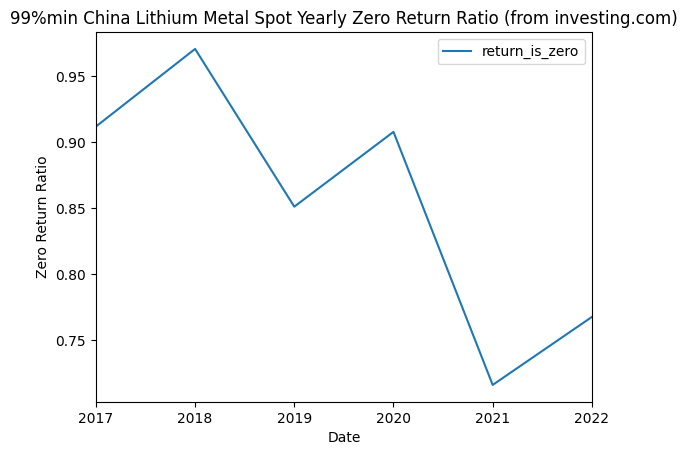

In [1100]:
df_Lit_zero_Y.plot(kind='line')
plt.title('99%min China Lithium Metal Spot Yearly Zero Return Ratio (from investing.com)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.show()

### ZEROs: plot all the monthly zero return ratio in one graph

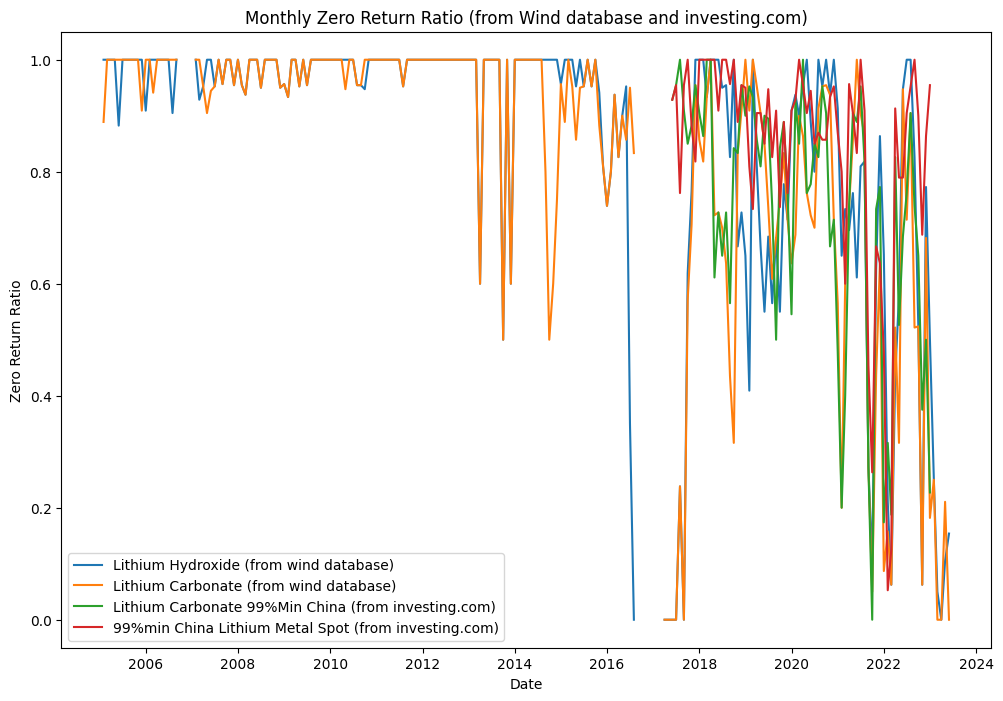

In [1021]:
plt.figure(figsize=(12, 8))

# 画出所有的线
plt.plot(df_Lioh_zero_M, label='Lithium Hydroxide (from wind database)')
plt.plot(df_Lico_zero_M, label='Lithium Carbonate (from wind database)')
plt.plot(df_LitCarb_zero_M, label='Lithium Carbonate 99%Min China (from investing.com)')
plt.plot(df_Lit_zero_M, label='99%min China Lithium Metal Spot (from investing.com)')

plt.title('Monthly Zero Return Ratio (from Wind database and investing.com)')
plt.xlabel('Date')
plt.ylabel('Zero Return Ratio')
plt.legend(loc='best')  # 添加图例

plt.show()


### Merge all the yearly ZEROS in one table

In [1037]:
df_Lico_zero_Y = df_Lico_zero_Y.add_prefix('1)_')
df_Lioh_zero_Y = df_Lioh_zero_Y.add_prefix('2)_')
df_LitCarb_zero_Y = df_LitCarb_zero_Y.add_prefix('3)_')
df_Lit_zero_Y = df_Lit_zero_Y.add_prefix('4)_')

In [1038]:
df = pd.concat([df_Lico_zero_Y, df_Lioh_zero_Y, df_LitCarb_zero_Y, df_Lit_zero_Y], axis=1, join='outer')

In [1039]:
df

1)_return_is_zero  2)_return_is_zero  3)_return_is_zero   
Date                                                                  
2005-12-31           0.982833           0.982833                NaN  \
2006-12-31           0.993151           0.986301                NaN   
2007-12-31           0.970711           0.979079                NaN   
2008-12-31           0.979592           0.979592                NaN   
2009-12-31           0.987654           0.987654                NaN   
2010-12-31           0.987500           0.987500                NaN   
2011-12-31           0.995902           0.995902                NaN   
2012-12-31           1.000000           1.000000                NaN   
2013-12-31           0.882353           0.882353                NaN   
2014-12-31           0.893333           0.986667                NaN   
2015-12-31           0.912863           0.941909                NaN   
2016-12-31           0.873016           0.753968                NaN   
2017-12-31           0.379888           0.413408           0.924528   
2018-12-31           0.748971           0.893004           0.800000   
2019-12-31           0.790984           0.684426           0.793388   
2020-12-31           0.806584           0.942387           0.807531   
2021-12-31           0.551440           0.633745           0.576271   
2022-12-31           0.483471           0.599174           0.572614   
2023-12-31           0.087912           0.098901                NaN   

            4)_return_is_zero  
Date                           
2005-12-31                NaN  
2006-12-31                NaN  
2007-12-31                NaN  
2008-12-31                NaN  
2009-12-31                NaN  
2010-12-31                NaN  
2011-12-31                NaN  
2012-12-31                NaN  
2013-12-31                NaN  
2014-12-31                NaN  
2015-12-31                NaN  
2016-12-31                NaN  
2017-12-31           0.911950  
2018-12-31           0.970833  
2019-12-31           0.851240  
2020-12-31           0.907950  
2021-12-31           0.716102  
2022-12-31           0.767635  
2023-12-31                NaN

## Plot all the price in one graph

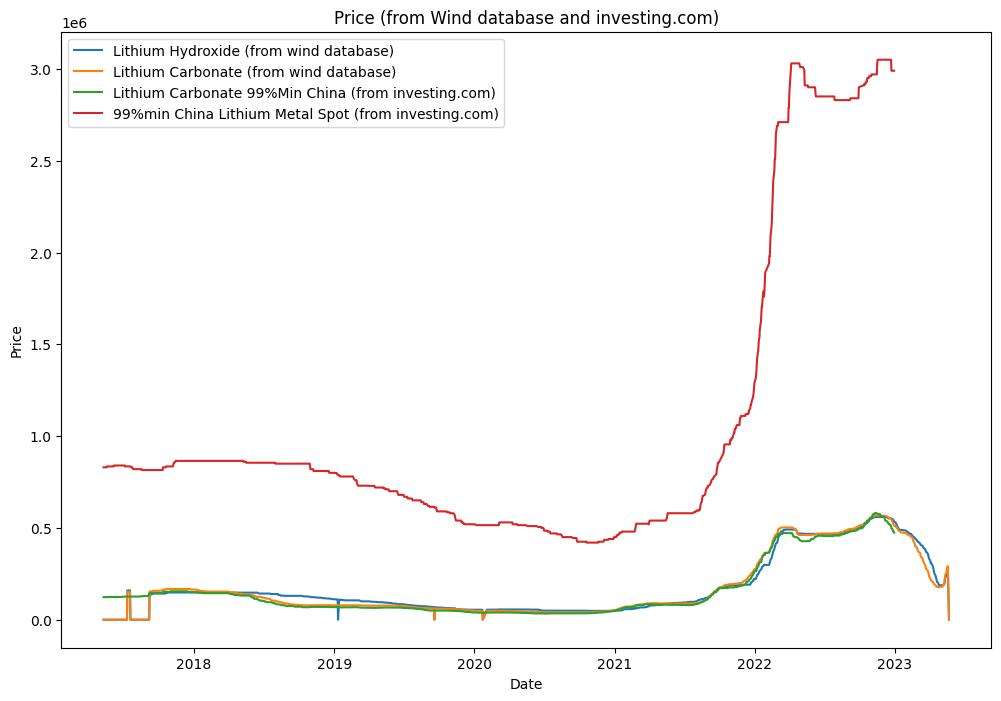

In [1022]:
df_Lico_1 = df_Lico_1.loc['2017-05-10':]
df_Lioh_1 = df_Lioh_1.loc['2017-05-10':]

plt.figure(figsize=(12, 8))

# 画出所有的线
plt.plot(df_Lioh_1, label='Lithium Hydroxide (from wind database)')
plt.plot(df_Lico_1, label='Lithium Carbonate (from wind database)')
plt.plot(df_LitCarb_1, label='Lithium Carbonate 99%Min China (from investing.com)')
plt.plot(df_Lit_1, label='99%min China Lithium Metal Spot (from investing.com)')

plt.title('Price (from Wind database and investing.com)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')  # 添加图例

plt.show()


### weekly return for these four time series

In [1188]:
print(df_Lico_week.isnull().sum())  
print(df_Lioh_week.isnull().sum())  
print(np.isinf(df_Lico_week).sum())  
print(np.isinf(df_LitCarb_week).sum())  

144
147
0
0


In [ ]:
df_Lico_week.replace([np.inf, -np.inf], np.nan, inplace=True)

In [1164]:
print(df_LitCarb_week.isnull().sum())  # 统计df_Lico_week中的缺失值数量
print(df_Lit_week.isnull().sum())  # 统计df_LitCarb_week中的缺失值数量
print(np.isinf(df_LitCarb_week).sum())  # 统计df_Lico_week中的无穷大值数量
print(np.isinf(df_Lit_week).sum())  # 统计df_LitCarb_week中的无穷大值数量

26
26
0
0


In [1181]:
# 1）
date_range = pd.date_range(start=df_Lico_2.index.min(), end=df_Lico_2.index.max())
df_Lico_2 = df_Lico_2.reindex(date_range)
df_Lico_week = df_Lico_2[df_Lico_2.index.dayofweek == 4]

# 2）
date_range = pd.date_range(start=df_Lioh_2.index.min(), end=df_Lioh_2.index.max())
df_Lioh_2 = df_Lioh_2.reindex(date_range)
df_Lioh_week = df_Lioh_2[df_Lioh_2.index.dayofweek == 4]

# 3）
date_range = pd.date_range(start=df_LitCarb_2.index.min(), end=df_LitCarb_2.index.max())
df_LitCarb_2 = df_LitCarb_2.reindex(date_range)
df_LitCarb_week = df_LitCarb_2[df_LitCarb_2.index.dayofweek == 4]

# 4）
date_range = pd.date_range(start=df_Lit_2.index.min(), end=df_Lit_2.index.max())
df_Lit_2 = df_Lit_2.reindex(date_range)
df_Lit_week = df_Lit_2[df_Lit_2.index.dayofweek == 4]

In [1185]:
# df_Lico_week = df_Lico_week.to_frame()
# df_Lioh_week = df_Lioh_week.to_frame()
# df_LitCarb_week = df_LitCarb_week.to_frame()
# df_Lit_week = df_Lit_week.to_frame()

In [1189]:
correlation_matrix = pd.concat([df_Lico_week.rename('1)'), df_Lioh_week.rename('2)')], axis=1).corr()
correlation_matrix

1)        2)
1)  1.000000  0.670597
2)  0.670597  1.000000

In [1190]:
correlation_matrix_1 = pd.concat([df_LitCarb_week.rename('3)'), df_Lit_week.rename('4)')], axis=1).corr()
correlation_matrix_1

3)        4)
3)  1.000000  0.463605
4)  0.463605  1.000000

In [1191]:
df_Lico_week = df_Lico_week['2017-05-12':'2022-12-30']
df_Lioh_week = df_Lioh_week['2017-05-12':'2022-12-30']

In [1192]:
correlation_matrix_2 = pd.concat([df_Lico_week.rename('1)'), df_Lioh_week.rename('2)'), df_LitCarb_week.rename('3)'), df_Lit_week.rename('4)')], axis=1).corr()
correlation_matrix_2

1)        2)        3)        4)
1)  1.000000  0.549207  0.486732  0.398941
2)  0.549207  1.000000  0.409698  0.357515
3)  0.486732  0.409698  1.000000  0.463605
4)  0.398941  0.357515  0.463605  1.000000

## Lithium Futures (from seekingAlpha.com)

In [ ]:
df_Lifu = pd.read_excel('./Data/Historical Prices (9).xlsx')

# Remove '.' from dates
df_Lifu['Date'] = df_Lifu['Date'].str.replace('.', '')
# Convert dates
df_Lifu['Date'] = pd.to_datetime(df_Lifu['Date'], format="%b %d, %Y")


def convert_string_to_numeric(s):
    """
    Convert strings like '5.74M' or '532.50K' to numeric values
    """
    s = str(s).replace(',', '')  # Remove commas
    if 'M' in s:
        return float(s.replace('M', '')) * 1e6
    elif 'K' in s:
        return float(s.replace('K', '')) * 1e3
    else:
        return float(s)

# Convert columns 'Open', 'High', 'Close', 'Low' from string to numeric
for col in ['Open', 'High', 'Close', 'Low']:
    df_Lifu[col] = df_Lifu[col].apply(convert_string_to_numeric)
    
df_Lifu.set_index('Date', inplace=True)
df_Lifu = df_Lifu[::-1]
df_Lifu = df_Lifu.pct_change()
df_Lifu
df_Lifu.to_csv('Lithium_futures_price.csv')

## Lithium Carbonate 99.5%Min China Spot (from investing.com)

In [ ]:
df_LitCarb_1 = pd.read_csv('./Data/Lithium Carbonate 99.5%Min China Spot Historical Data.csv')
df_LitCarb_1['Date'] = pd.to_datetime(df_LitCarb_1['Date'])
df_LitCarb_1 = df_LitCarb_1[::-1]
df_LitCarb_1 = df_LitCarb_1.reset_index(drop=True)
df_LitCarb_1

In [ ]:
df_LitCarb_1.to_csv('Lithium carbonate 99.5%(investing.com).csv', index=False)

df_LitCarb_1.loc[:, ['Price', 'Open', 'High', 'Low']] = df_LitCarb_1.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_LitCarb_1['Open'] = pd.to_numeric(df_LitCarb_1['Open'])
stats = pd.DataFrame(df_LitCarb_1['Open'].describe())
print(stats)
# 将 'date' 列设置为索引
df_LitCarb_1['Date'] = pd.to_datetime(df_LitCarb_1['Date'])
df_LitCarb_1.set_index('Date', inplace=True)
# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(df_LitCarb_1.index, df_LitCarb_1['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price for Lithium Carbonate 99.5%Min China Spot')
plt.xticks(rotation=45)
plt.show()

## 99.9%min China Lithium Metal Spot (from investing.com)

In [ ]:
df_Lit_1 = pd.read_csv('./Data/99.9%min China Lithium Metal Spot Historical Data.csv')
df_Lit_1['Date'] = pd.to_datetime(df_Lit_1['Date'])
df_Lit_1= df_Lit_1[::-1]
df_Lit_1 = df_Lit_1.reset_index(drop=True)
df_Lit_1

df_Lit_1.loc[:, ['Price', 'Open', 'High', 'Low']] = df_Lit_1.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_Lit_1['Open'] = pd.to_numeric(df_Lit_1['Open'])
stats = pd.DataFrame(df_Lit_1['Open'].describe())
print(stats)
# 将 'date' 列设置为索引
df_Lit_1['Date'] = pd.to_datetime(df_Lit_1['Date'])
df_Lit_1.set_index('Date', inplace=True)
# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(df_Lit_1.index, df_Lit_1['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price for 99.9%min China Lithium Metal Spot')
plt.xticks(rotation=45)
plt.show()

## Lithium Cobalt Oxide 60%Min China Spot (from investing.com)

In [ ]:
df_Litcoba = pd.read_csv('./Data/Lithium Cobalt Oxide 60%Min China Spot Historical Data.csv')
df_Litcoba['Date'] = pd.to_datetime(df_Litcoba['Date'])
df_Litcoba = df_Litcoba[::-1]
df_Litcoba = df_Litcoba.reset_index(drop=True)
df_Litcoba

df_Litcoba.loc[:, ['Price', 'Open', 'High', 'Low']] = df_Litcoba.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_Litcoba['Open'] = pd.to_numeric(df_Litcoba['Open'])
stats = pd.DataFrame(df_Litcoba['Open'].describe())
print(stats)
# 将 'date' 列设置为索引
df_Litcoba['Date'] = pd.to_datetime(df_Litcoba['Date'])
df_Litcoba.set_index('Date', inplace=True)
# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(df_Litcoba.index, df_Litcoba['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price for Lithium Cobalt Oxide 60%Min China Spot')
plt.xticks(rotation=45)
plt.show()

## Lithium Carbonate price (from trading economics.com)

In [ ]:
df_Licar = pd.read_excel('./Data/Lithium Carbonate from trading economics.xlsx')
df_Licar = df_Licar['Symbol;Date;Open;High;Low;Close'].str.split(';', expand=True)
df_Licar.columns = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close']

df_Licar['Date'] = pd.to_datetime(df_Licar['Date'], format='%d/%m/%Y')
df_Licar.set_index('Date', inplace=True)
#转换 'Close' 列的数据类型为 float
df_Licar['Open'] = df_Licar['Open'].astype(float)
df_Licar['High'] = df_Licar['High'].astype(float)
df_Licar['Low'] = df_Licar['Low'].astype(float)
df_Licar['Close'] = df_Licar['Close'].astype(float)
df_Licar = df_Licar[::-1]

del df_Licar['Symbol']
df_Licar

df_Licar = df_Licar.pct_change()

#绘制 'Close' 列的折线图
df_Licar['Close'].plot()
# 设置图表的标题
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('return of close Price for Lithium Carbonate')
# 显示图表
plt.show()

# Below are X we considered 

## LIBOR

In [384]:
import requests
import pandas as pd
from io import StringIO

api_key = "5f3afd582bd7b4.95720069"
symbol = "LIBOREUR2M.MONEY"
url = f"https://eodhistoricaldata.com/api/eod/{symbol}?api_token={api_key}"

response = requests.get(url)

if response.status_code == 200:
    try:
        df_libor = pd.read_csv(StringIO(response.text), index_col='Date', parse_dates=True)
        libor_values = df_libor['Close']
        #print(libor_values)
    except ValueError as e:
        print(f"JSONDecodeError: {e}")
else:
    print(f"Error: {response.status_code}")

In [385]:
df_libor = df_libor.pct_change()

* Visualization

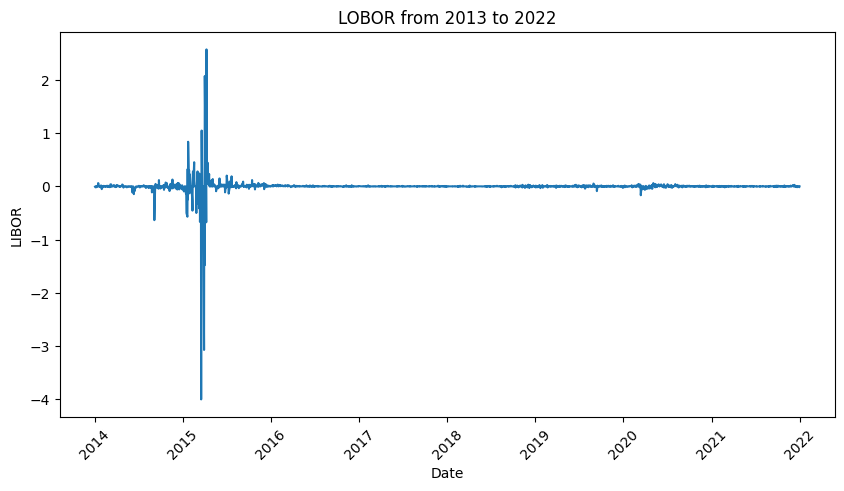

In [386]:
sep_data = df_libor['Adjusted_close']
sep_data =  sep_data.dropna()
plt.figure(figsize=(10, 5))
plt.plot(sep_data.index, sep_data)
plt.xlabel('Date')
plt.ylabel('LIBOR')
plt.title('LOBOR from 2013 to 2022')
plt.xticks(rotation=45)
plt.show()

## LITH-USD

* LITH-USD is a digital currency representing the lithium market. It is one of the top 100 cryptocurrencies by market capitalization provided by CoinMarketCap, which measures the performance of the global lithium market.

In [190]:
df_LITHUSD = yf.download('LITH-USD' , start = '2021-08-04', end = '2022-12-31')

[*********************100%***********************]  1 of 1 completed


* The earliest date is '2021-08-04'

In [191]:
df_LITHUSD = df_LITHUSD.pct_change()
df_LITHUSD

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2021-08-05       NaN       NaN       NaN       NaN        NaN       NaN
2021-08-06 -0.034726 -0.117270  0.157723 -0.003653  -0.003653 -0.609265
2021-08-07 -0.004476  0.051985  0.130392  0.147142   0.147142 -0.314954
2021-08-08  0.144630 -0.032310  0.024983 -0.110328  -0.110328 -0.271829
2021-08-09 -0.108897  0.103950  0.012271  0.143195   0.143195 -0.111794
...              ...       ...       ...       ...        ...       ...
2022-12-26 -0.051852  0.002959  0.030645  0.057812   0.057812  0.111912
2022-12-27  0.057812 -0.001475 -0.025039 -0.063515  -0.063515 -0.188055
2022-12-28 -0.064993 -0.032496  0.011236  0.014196   0.014196  0.118751
2022-12-29  0.015798  0.004580  0.017460  0.012442   0.012442  0.151895
2022-12-30  0.012442 -0.009119  0.001560 -0.003072  -0.003072  0.086672

[513 rows x 6 columns]

* Autocorrelation check

* Visulization

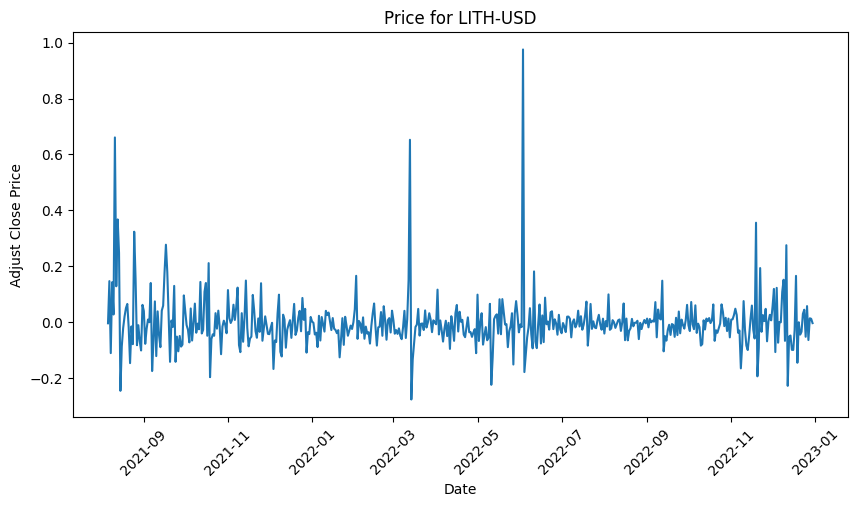

In [193]:
sep_data = df_LITHUSD['Adj Close']
sep_data =  sep_data.dropna()
plt.figure(figsize=(10, 5))
plt.plot(sep_data.index, sep_data)
plt.xlabel('Date')
plt.ylabel('Adjust Close Price')
plt.title('Price for LITH-USD')
plt.xticks(rotation=45)
plt.show()

* statistics

In [194]:
pd.DataFrame(sep_data.describe())

Adj Close
count  512.000000
mean    -0.001892
std      0.094449
min     -0.276153
25%     -0.043518
50%     -0.008577
75%      0.021860
max      0.975502

* Histogram

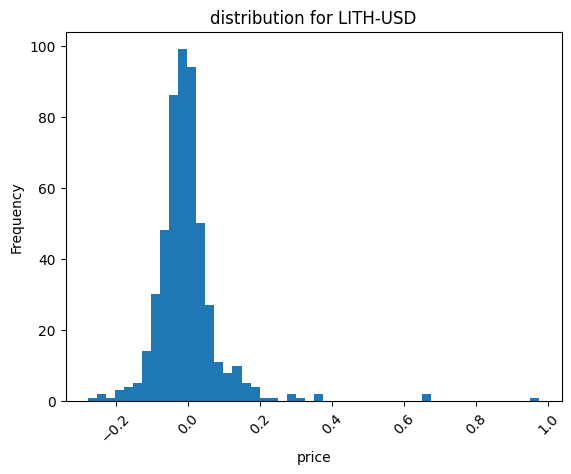

In [195]:
plt.hist(sep_data, bins=50)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('distribution for LITH-USD')
plt.xticks(rotation=45)
plt.show()

* Box plot

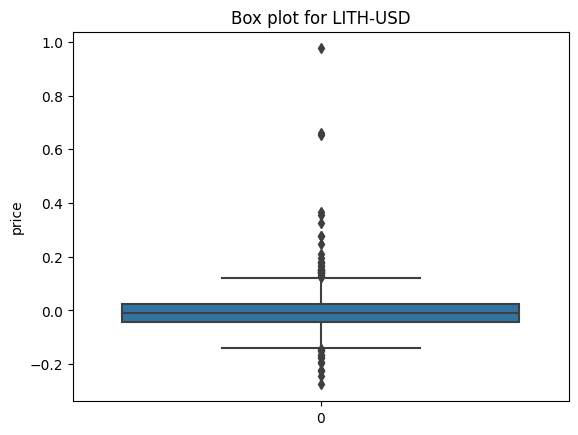

In [196]:
sns.boxplot(sep_data)
plt.ylabel('price')
plt.title('Box plot for LITH-USD')
plt.show()

* QQ plot

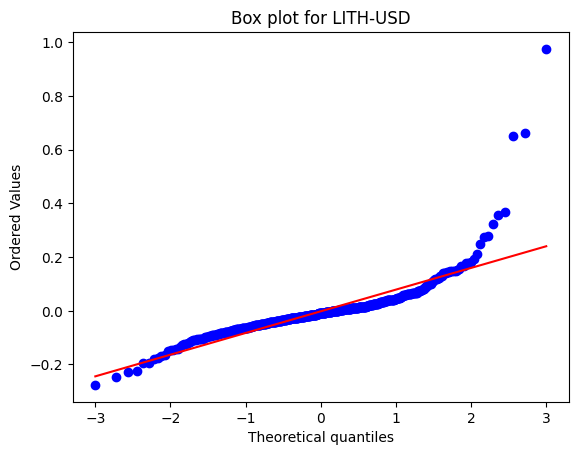

In [197]:
stats.probplot(sep_data, dist='norm', plot=plt)
plt.title('Box plot for LITH-USD')
plt.show()

## EV company stock prices

In [562]:
EV_companies_list = ['TSLA.US', 'NIO.US','XPEV.US','LI.US','GM.US','F.US','RIVN.US','TM.US','NSANY.US',
                     'HYMTF.US','BYDDF.US']

In [9]:
import requests
import pandas as pd
import io


api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

# 获取每个股票的 DataFrame 并存储在字典中
for stock in up_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        # 仅为非 "Date" 列添加后缀
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        # 将 DataFrame 存储在字典中，使用股票代码作为键
        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

# 创建一个包含所有交易日期的单独 DataFrame
all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_upstream = all_dates_df
for stock, df in dataframes.items():
    df_upstream = df_upstream.merge(df, on='Date', how='left')

In [23]:
for col in df_upstream.columns:
    df_upstream[col] = pd.to_numeric(df_upstream[col], errors='coerce')

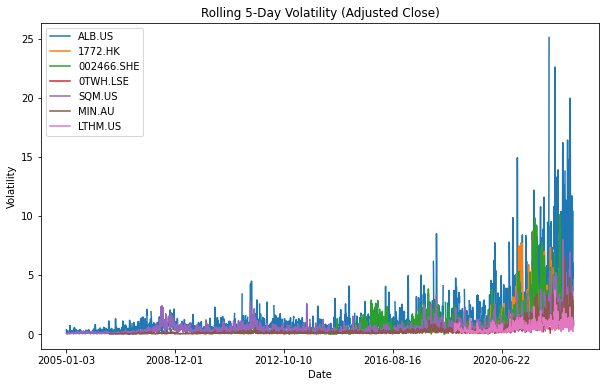

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你已经有一个名为df_upstream的DataFrame，包含了所有资产的数据

# 获取所有名字带"Adjusted_close_"的列
adjusted_close_columns = [col for col in df_upstream.columns if col.startswith("Adjusted_close_")]

# 创建一个空DataFrame用于存储滑动波动率
volatility_df = pd.DataFrame()

# 计算每个资产的滑动5天波动率，并将结果存储在volatility_df中
for column in adjusted_close_columns:
    column_name = column.replace("Adjusted_close_", "")
    volatility = df_upstream[column].rolling(window=5).std()
    volatility_df[column_name] = volatility

# 绘制所有资产的滑动5天波动率
volatility_df.plot(figsize=(10, 6))

# 设置图表标题和标签
plt.title("Rolling 5-Day Volatility (Adjusted Close)")
plt.xlabel("Date")
plt.ylabel("Volatility")

# 显示图表
plt.legend(loc="upper left")
plt.show()



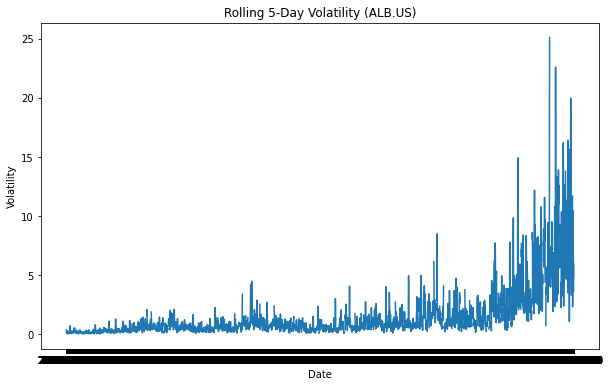

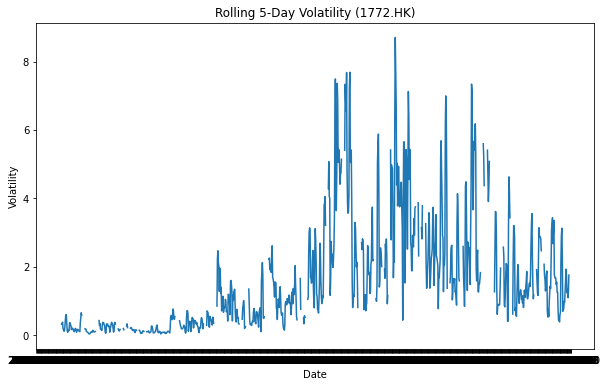

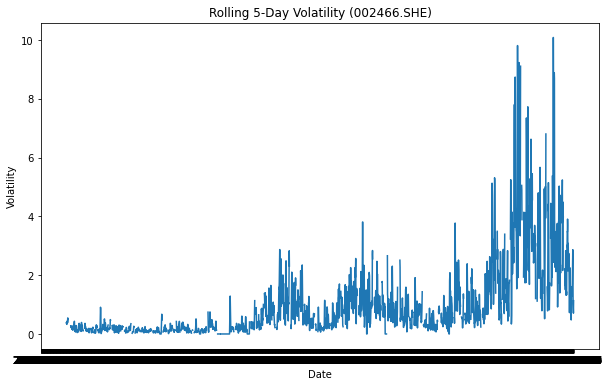

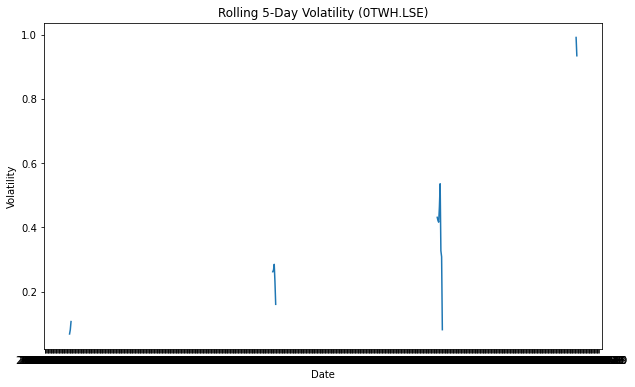

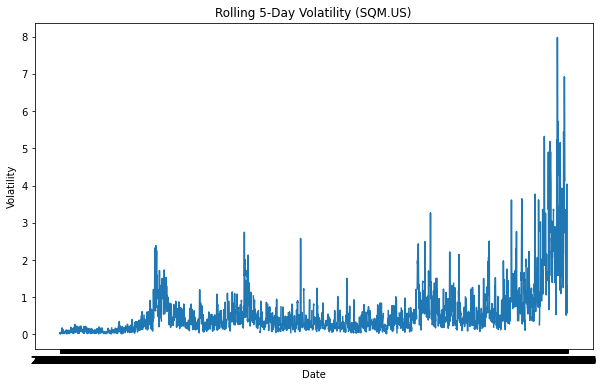

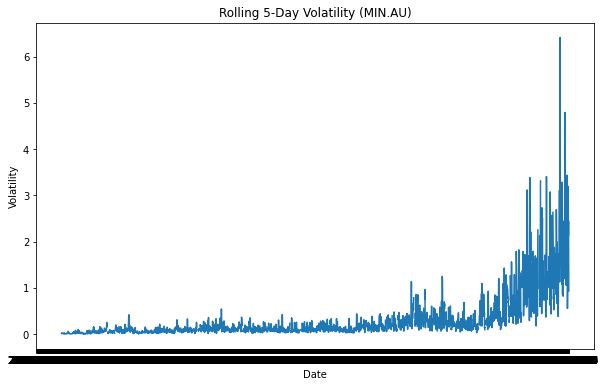

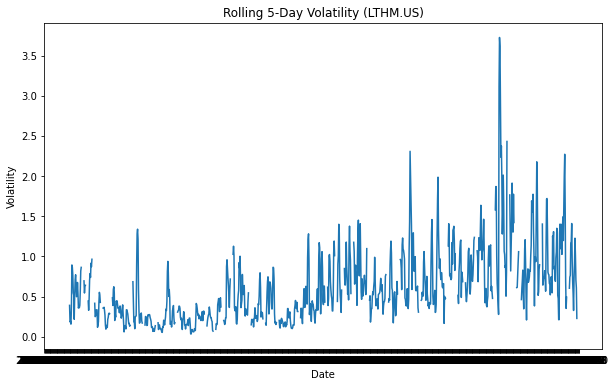

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

adjusted_close_columns = [col for col in df_upstream.columns if col.startswith("Adjusted_close_")]

for column in adjusted_close_columns:
    column_name = column.replace("Adjusted_close_", "")
    volatility = df_upstream[column].rolling(window=5).std()

    # 创建一个新的图表
    plt.figure(figsize=(10, 6))

    # 绘制波动率曲线
    plt.plot(volatility)

    # 设置图表标题和标签
    plt.title(f"Rolling 5-Day Volatility ({column_name})")
    plt.xlabel("Date")
    plt.ylabel("Volatility")

    # 显示图表
    plt.show()


In [747]:
import requests
import pandas as pd
import io

EV_companies_list = ['TSLA.US','TM.US' ,'GM.US','F.US','BYDDF.US','NIO.US', 'XPEV.US']

api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

# 获取每个股票的 DataFrame 并存储在字典中
for stock in EV_companies_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        # 仅为非 "Date" 列添加后缀
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

# 创建一个包含所有交易日期的单独 DataFrame
all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_EV = all_dates_df
for stock, df in dataframes.items():
    df_EV = df_EV.merge(df, on='Date', how='left')

In [748]:
df_EV.set_index('Date', inplace=True)
for col in df_EV.columns:
    df_EV[col] = pd.to_numeric(df_EV[col], errors='coerce')

price of TSLA.US starts from 2010-06-29
       Adjusted_close_TSLA.US
count             3150.000000
mean                58.807493
std                 95.526395
min                  1.053300
25%                  8.957675
50%                 16.222350
75%                 24.448025
max                409.970000


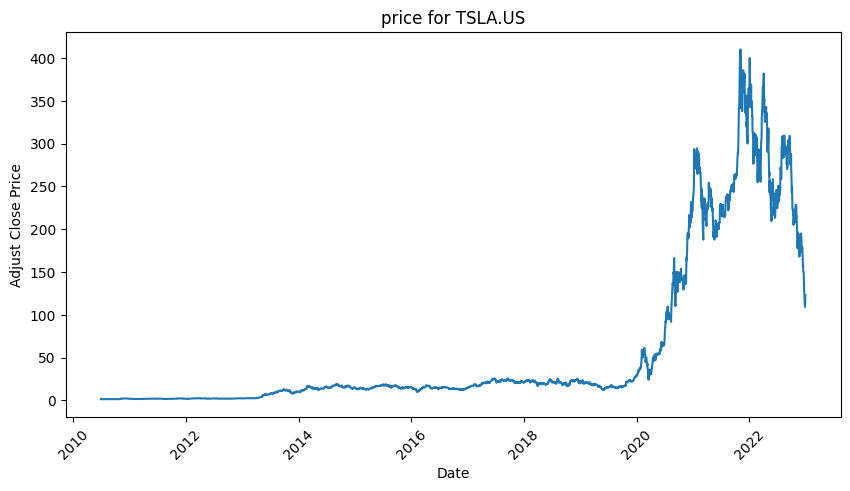

price of TM.US starts from 2005-01-03
       Adjusted_close_TM.US
count           4531.000000
mean              89.576218
std               35.223213
min               38.357400
25%               58.282200
50%               87.667900
75%              109.884450
max              206.283900


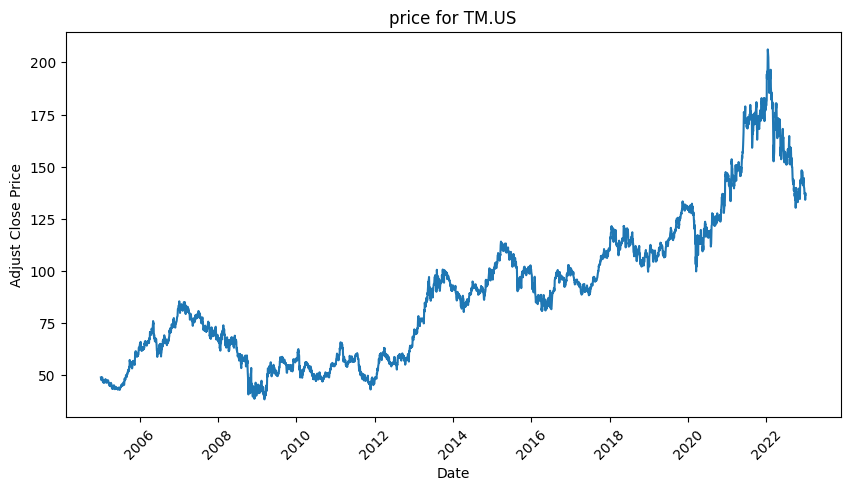

price of GM.US starts from 2010-11-17
       Adjusted_close_GM.US
count           3051.000000
mean              31.321461
std               10.087697
min               14.428000
25%               25.230750
50%               29.256000
75%               35.815600
max               65.292600


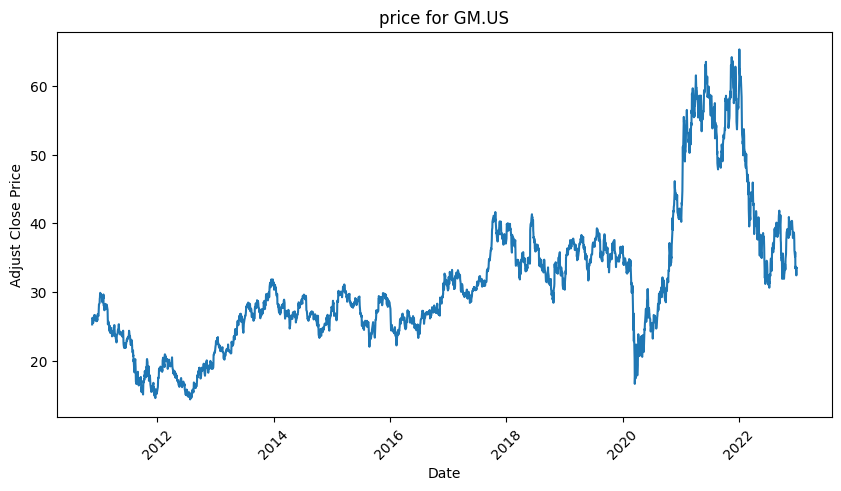

price of F.US starts from 2005-01-03
       Adjusted_close_F.US
count          4531.000000
mean              7.933522
std               3.065541
min               0.777100
25%               5.583700
50%               8.070500
75%               9.778100
max              22.694900


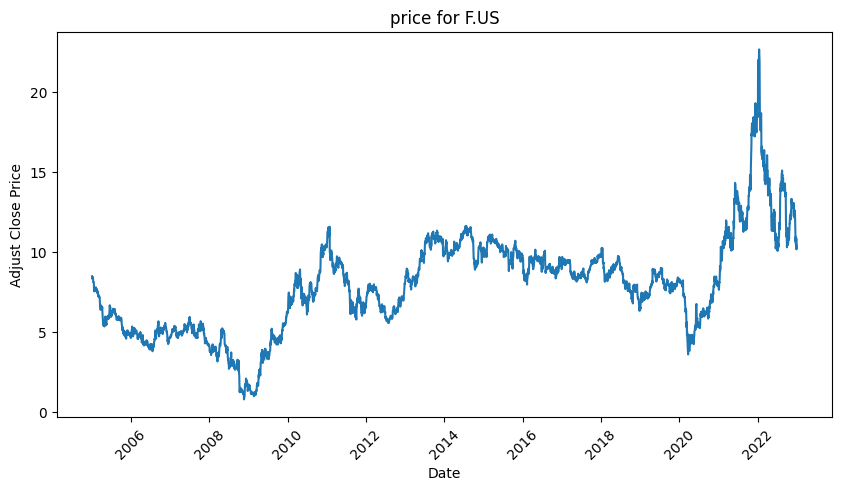

price of BYDDF.US starts from 2005-01-07
       Adjusted_close_BYDDF.US
count              3809.000000
mean                  8.627593
std                   9.167284
min                   0.313800
25%                   3.720000
50%                   5.744400
75%                   7.630400
max                  42.400000


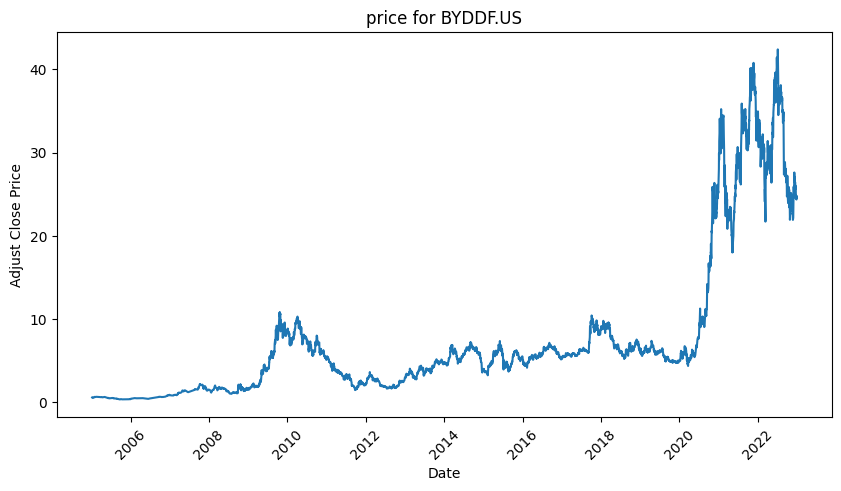

price of NIO.US starts from 2018-09-12
       Adjusted_close_NIO.US
count            1084.000000
mean               19.121670
std                16.263169
min                 1.320000
25%                 4.742500
50%                13.810000
75%                33.665000
max                62.840000


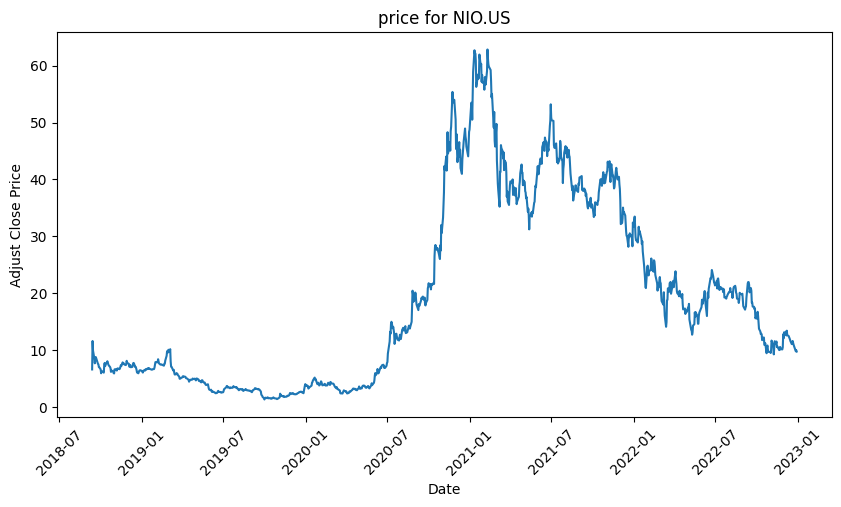

price of XPEV.US starts from 2020-08-27
       Adjusted_close_XPEV.US
count              591.000000
mean                31.589069
std                 12.866879
min                  6.410000
25%                 22.070000
50%                 32.530000
75%                 41.840000
max                 72.170000


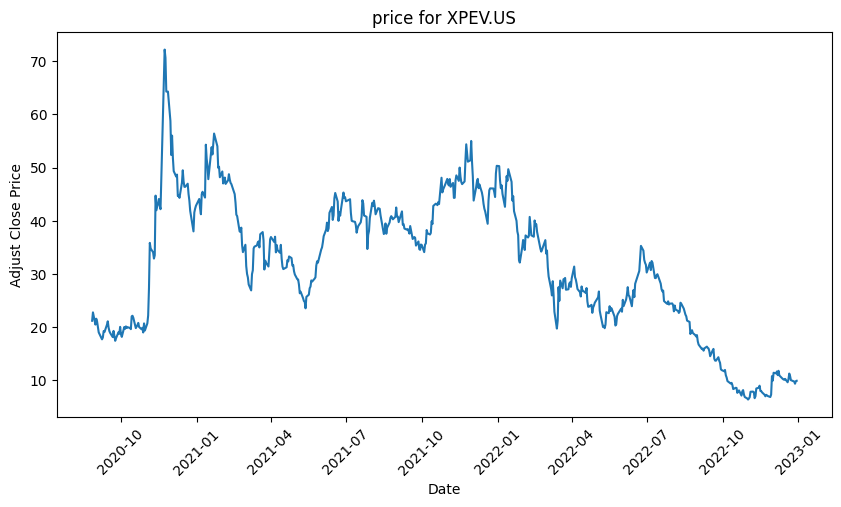

In [749]:
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('Adjust Close Price')
    plt.title('price for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

In [750]:
for col in df_EV.columns:
    df_EV[col] = np.log(df_EV[col]) - np.log(df_EV[col].shift(1))

/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [582]:
df_EV.to_csv('EV company stock prices.csv', index=False)

* Statistics and Visualization

price of TSLA.US starts from 2010-06-30
       Adjusted_close_TSLA.US
count             3149.000000
mean                 0.001381
std                  0.035865
min                 -0.236518
25%                 -0.015745
50%                  0.001172
75%                  0.019073
max                  0.218362


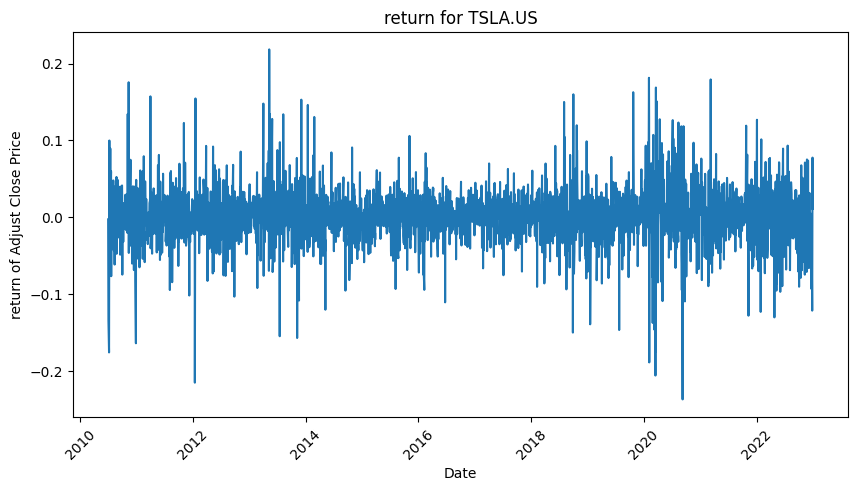

price of TM.US starts from 2005-01-04
       Adjusted_close_TM.US
count           4530.000000
mean               0.000227
std                0.015691
min               -0.180607
25%               -0.007732
50%                0.000145
75%                0.008291
max                0.132526


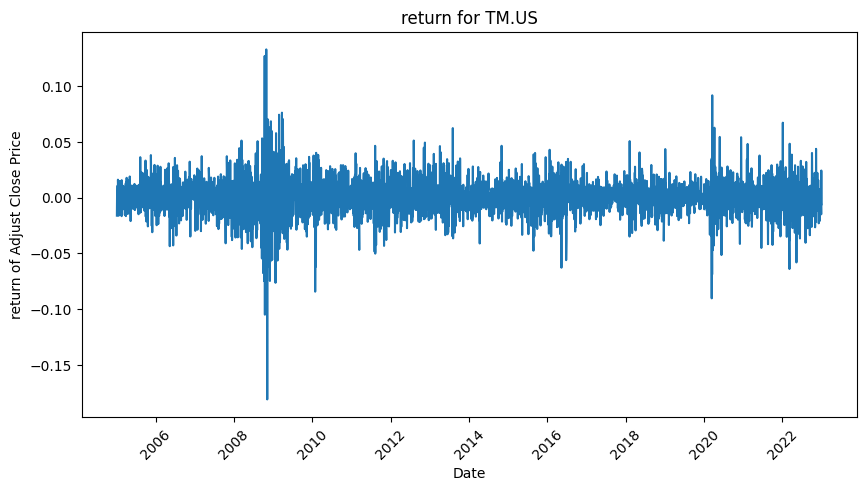

price of GM.US starts from 2010-11-18
       Adjusted_close_GM.US
count           3050.000000
mean               0.000092
std                0.021762
min               -0.190224
25%               -0.010444
50%                0.000292
75%                0.010815
max                0.181848


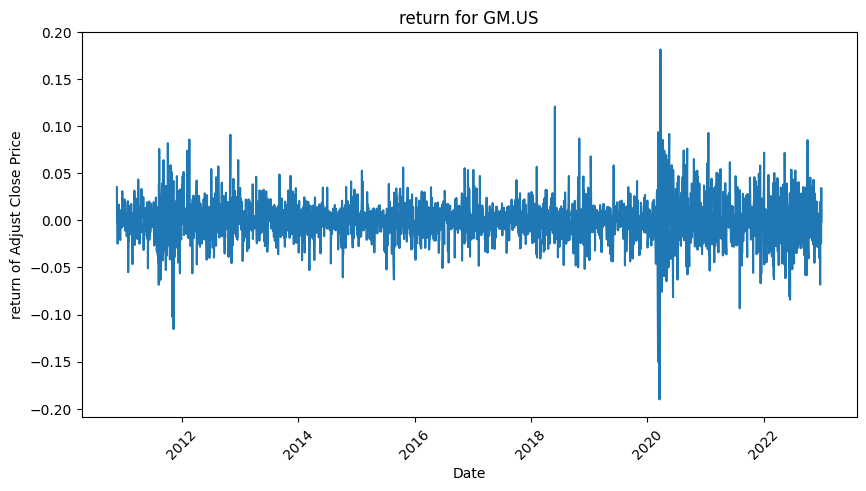

price of F.US starts from 2005-01-04
       Adjusted_close_F.US
count          4530.000000
mean              0.000053
std               0.026811
min              -0.287650
25%              -0.011436
50%               0.000000
75%               0.011550
max               0.258668


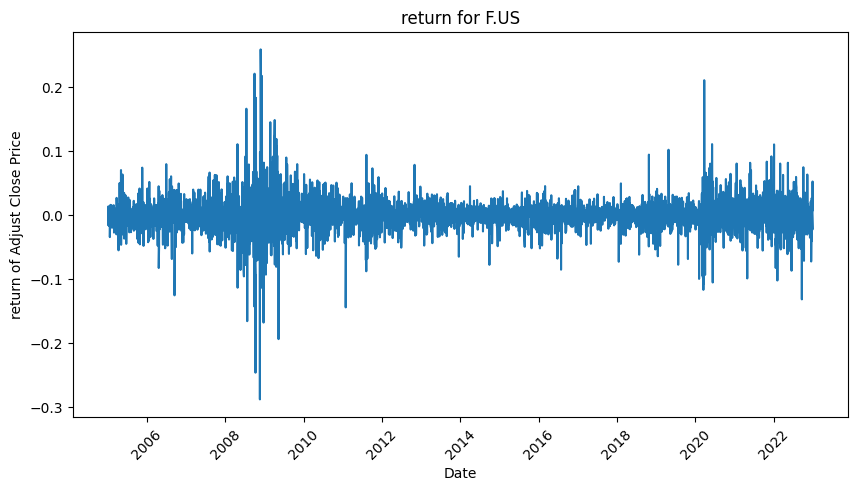

price of BYDDF.US starts from 2005-01-13
       Adjusted_close_BYDDF.US
count              3670.000000
mean                  0.000577
std                   0.035099
min                  -0.216243
25%                  -0.017720
50%                  -0.000750
75%                   0.017481
max                   0.216243


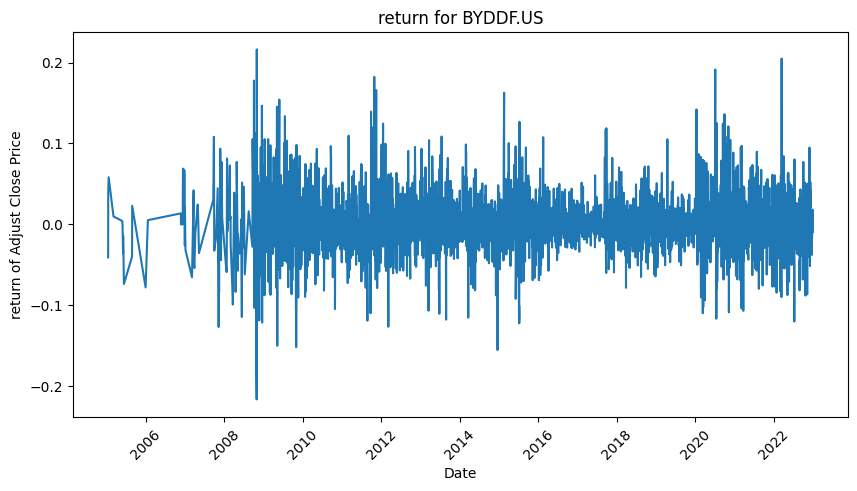

price of NIO.US starts from 2018-09-13
       Adjusted_close_NIO.US
count            1083.000000
mean                0.000360
std                 0.059752
min                -0.237768
25%                -0.032871
50%                -0.002911
75%                 0.028808
max                 0.563935


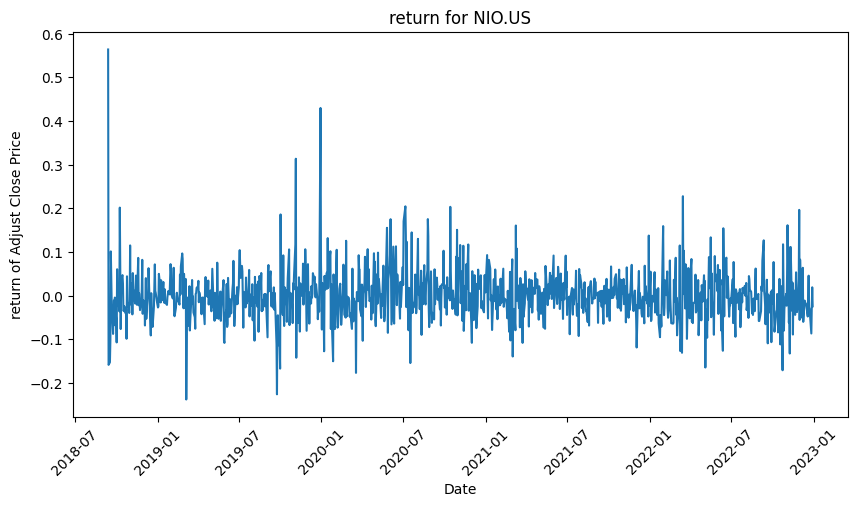

price of XPEV.US starts from 2020-08-28
       Adjusted_close_XPEV.US
count              590.000000
mean                -0.001285
std                  0.059493
min                 -0.163507
25%                 -0.036543
50%                 -0.006264
75%                  0.026082
max                  0.387133


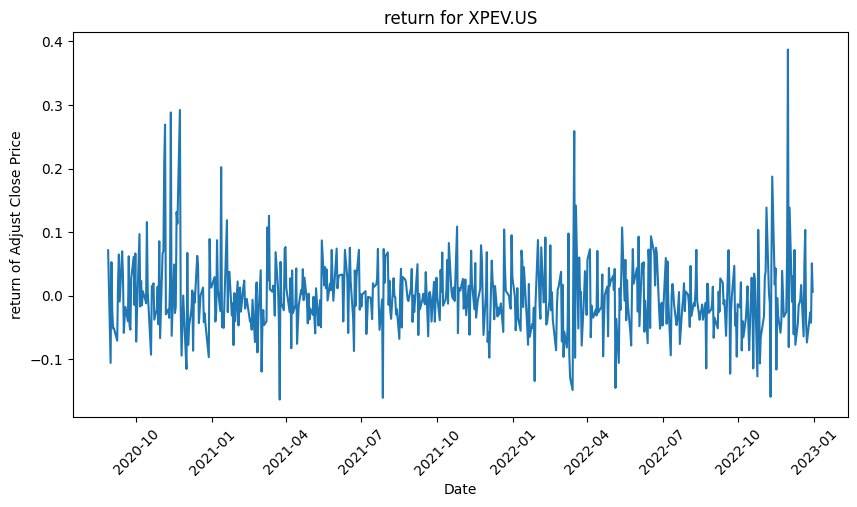

In [751]:
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('return of Adjust Close Price')
    plt.title('return for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

* plot them into one graph

price of TSLA.US starts from 2010-06-30
price of TM.US starts from 2005-01-04
price of GM.US starts from 2010-11-18
price of F.US starts from 2005-01-04
price of BYDDF.US starts from 2005-01-13


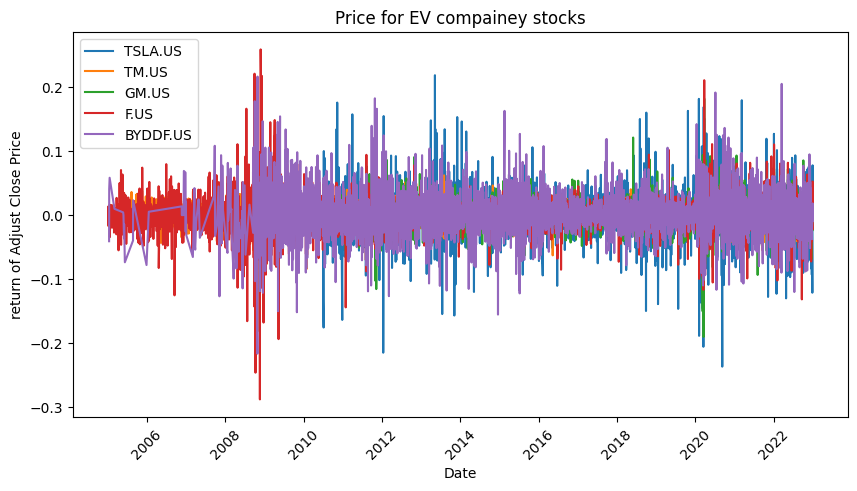

In [635]:
plt.figure(figsize=(10, 5))
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('Price for EV compainey stocks')
plt.xticks(rotation=45)
plt.legend()
plt.show()

price of TSLA.US starts from 2010-06-30
price of NIO.US starts from 2018-09-13
price of HYMTF.US starts from 2005-01-26
price of TM.US starts from 2005-01-04
price of LI.US starts from 2020-07-31
price of NSANY.US starts from 2005-01-04
price of GM.US starts from 2010-11-18
price of F.US starts from 2005-01-04
price of BYDDF.US starts from 2005-01-10
price of XPEV.US starts from 2020-08-28
price of RIVN.US starts from 2021-11-09


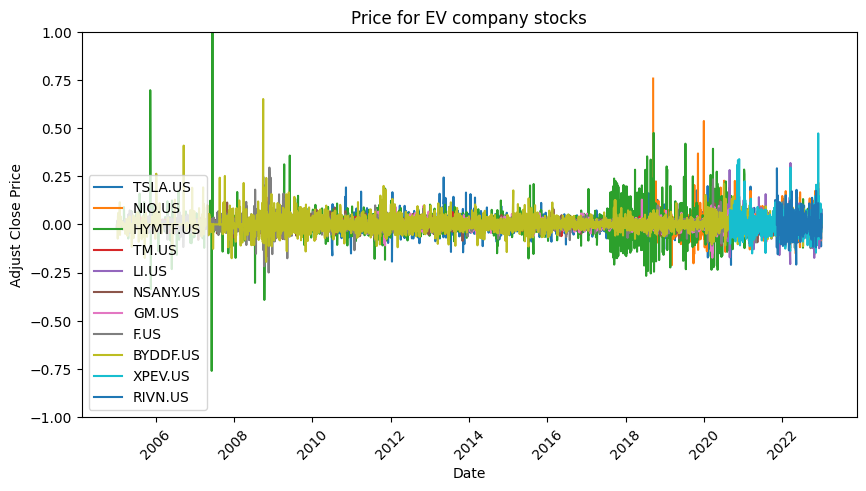

In [249]:
plt.figure(figsize=(10, 5))
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    print('price of ' + stock + ' starts from ' + date)
    sep_data.index = pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('Adjust Close Price')
plt.title('Log return for EV company stocks')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(-1, 1)  # 设置纵坐标范围为0到1
plt.show()


* If we focus on recent 4 years 

* Historgram

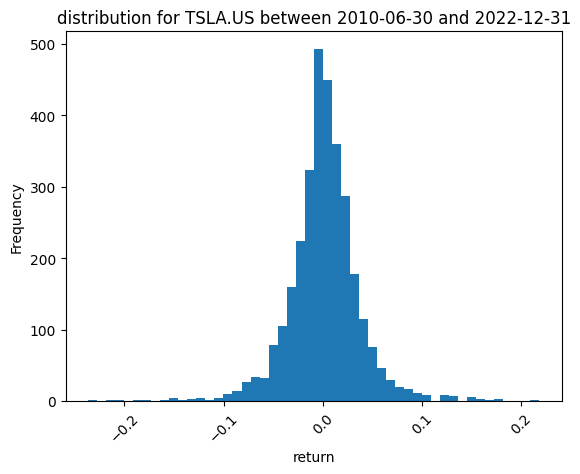

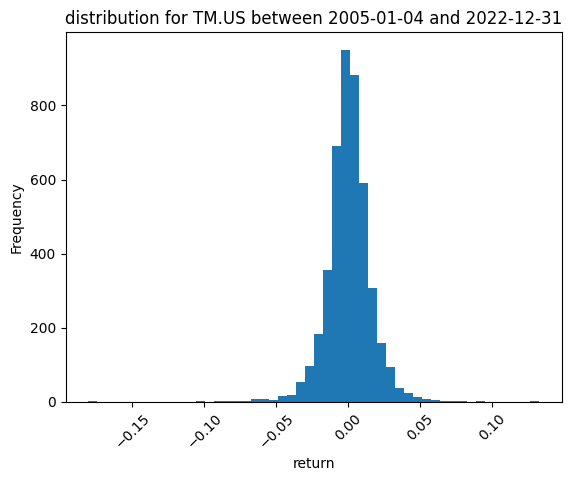

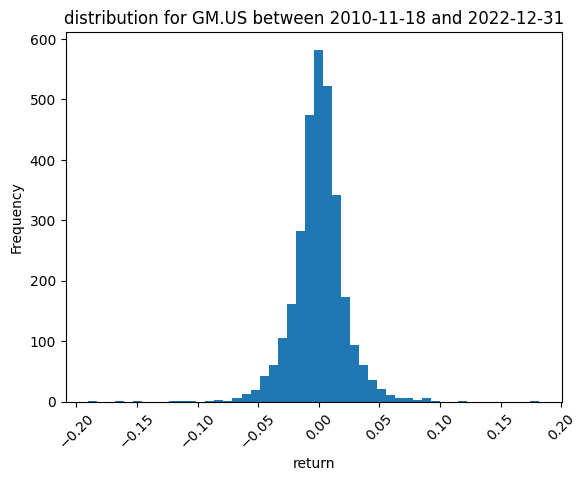

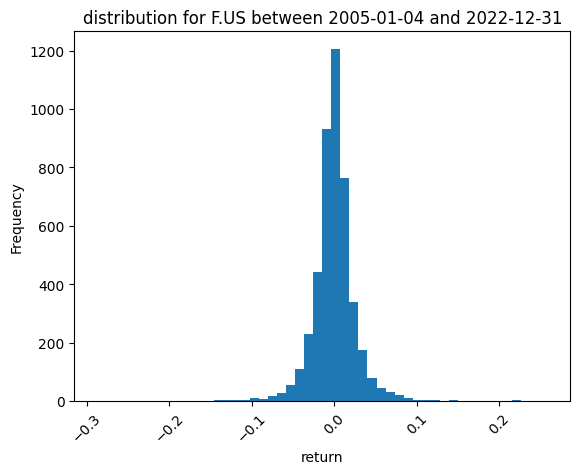

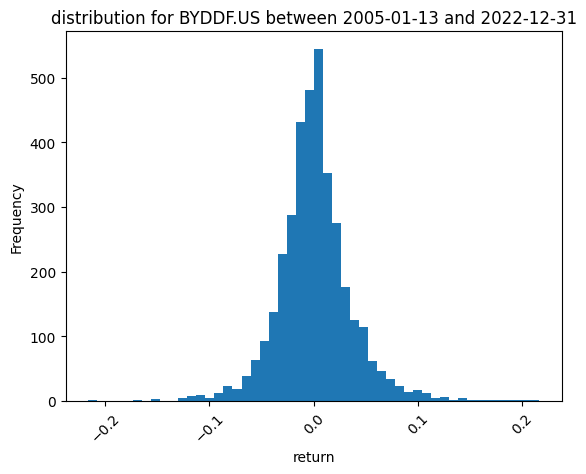

In [637]:
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index= pd.to_datetime(sep_data.index)
    plt.hist(sep_data, bins=50)
    plt.xlabel('return')
    plt.ylabel('Frequency')
    plt.title('distribution for ' + stock + ' between ' + date+' and 2022-12-31')
    plt.xticks(rotation=45)
    plt.show()

* Box Plot

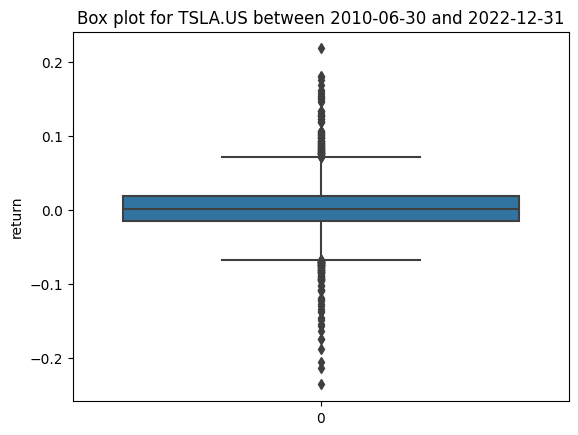

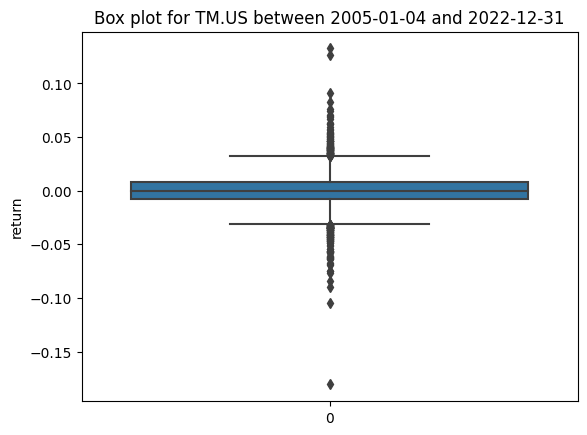

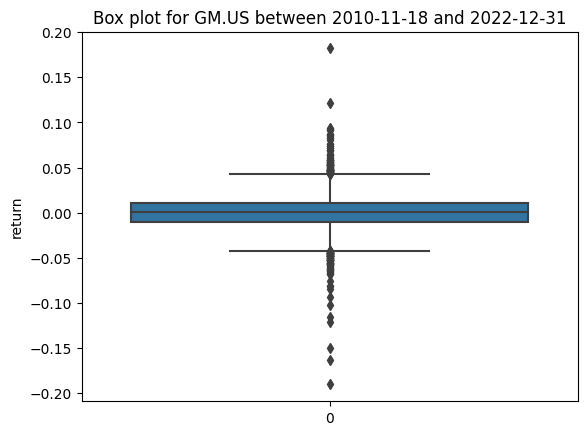

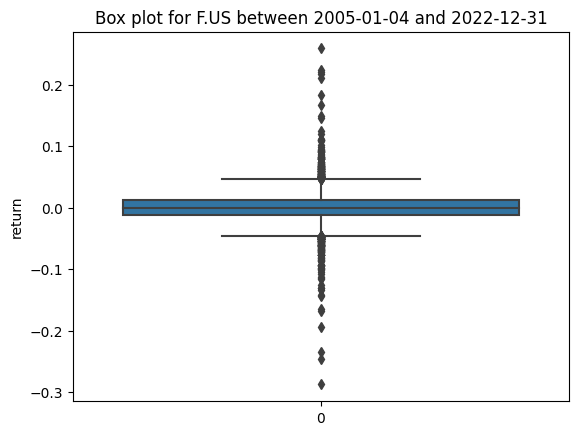

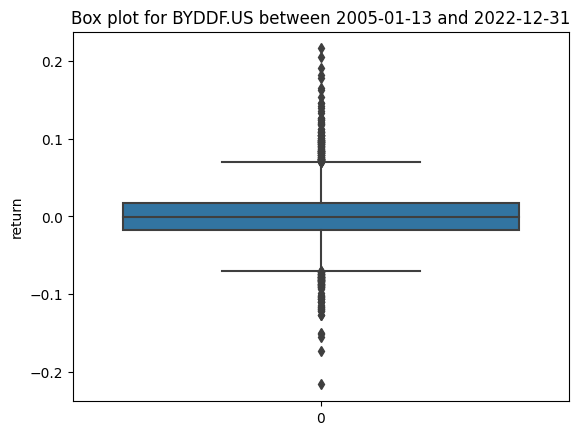

In [638]:
for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    # 绘制箱线图
    sns.boxplot(sep_data)
    plt.ylabel('return')
    plt.title('Box plot for '+ stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* QQ plot

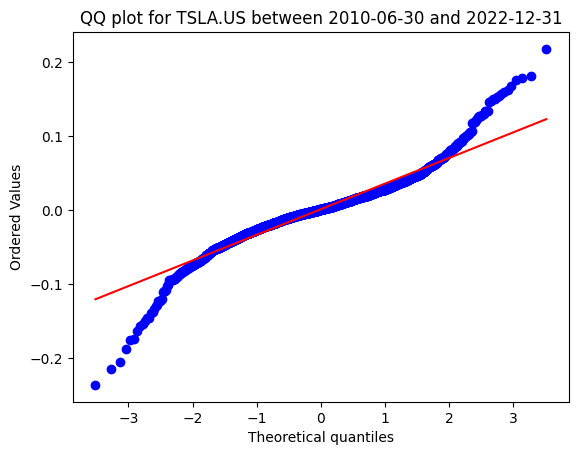

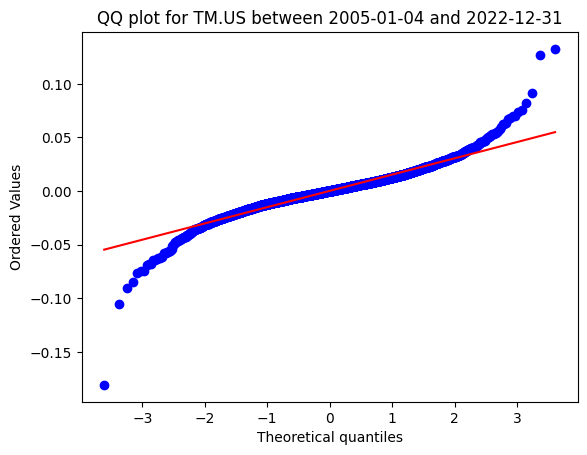

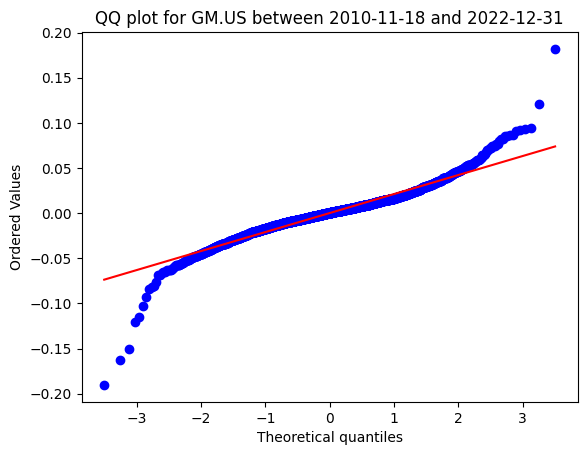

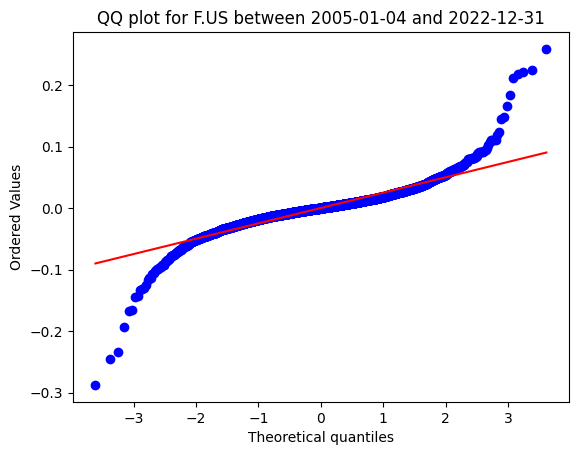

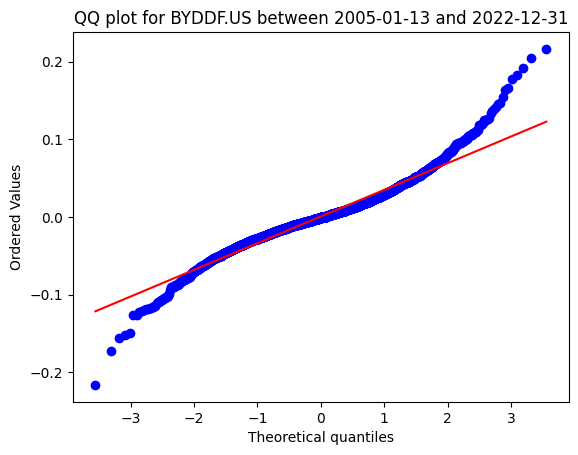

In [639]:
import scipy.stats as stats

for stock in EV_companies_list:
    sep_data = df_EV['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制QQ图
    stats.probplot(sep_data, dist='norm', plot=plt)
    plt.title('QQ plot for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.show()


In [725]:
df_EV.to_csv('./Data/EV companies.csv', index=True)

## Lithium Mining Companies (including Midstream companies)

* These companies play an important role in the global lithium market, and their production and sales activities have a significant impact on lithium prices and supply.

In [572]:
mining_comp_list = ['SLI.US','ALB.US','SQM.US','1772.Hk','002466.SHE',
                    'LTHM.US','PLL.US','LAC.US','ORE.AU','GALXF.US','ENS.US','VUL.AU','CRE.V']

In [752]:
import requests
import pandas as pd
import io

mining_comp_list = ['ALB.US','SQM.US','002466.SHE','LAC.US','ORE.AU','GALXF.US','LTHM.US']
api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

for stock in mining_comp_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)

        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

# 创建一个包含所有交易日期的单独 DataFrame
all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_Limin = all_dates_df
for stock, df in dataframes.items():
    df_Limin = df_Limin.merge(df, on='Date', how='left')

In [753]:
df_Limin.set_index('Date', inplace=True)
for col in df_Limin.columns:
    df_Limin[col] = pd.to_numeric(df_Limin[col], errors='coerce')

price of ALB.US starts from 2005-01-03
       Adjusted_close_ALB.US
count            4531.000000
mean               70.495102
std                59.339560
min                12.526100
25%                32.829500
50%                53.916300
75%                82.805150
max               324.255400


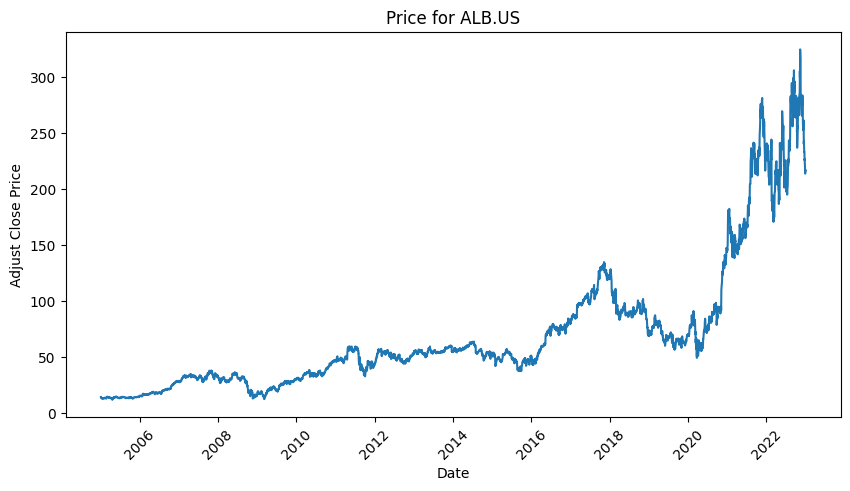

price of SQM.US starts from 2005-01-03
       Adjusted_close_SQM.US
count            4531.000000
mean               25.625881
std                17.407891
min                 2.917000
25%                14.089700
50%                21.890400
75%                34.362850
max               102.853300


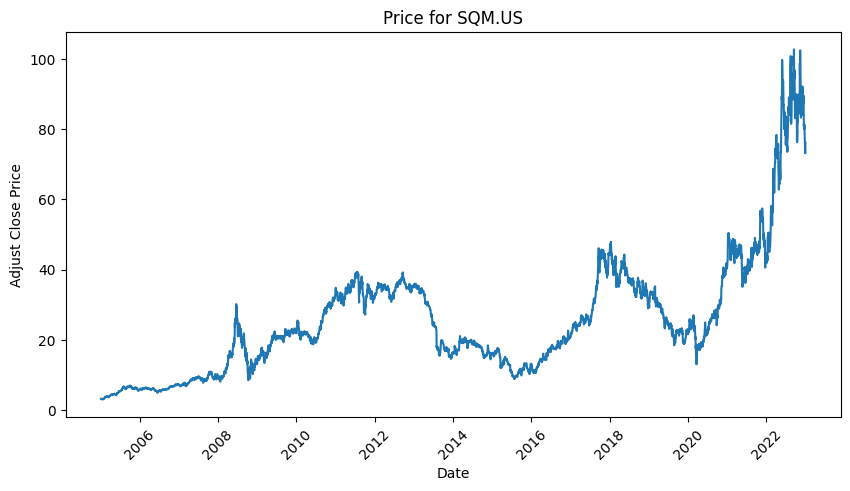

price of 002466.SHE starts from 2010-08-31
       Adjusted_close_002466.SHE
count                2839.000000
mean                   31.624510
std                    30.190587
min                     4.619900
25%                     7.889850
50%                    24.038000
75%                    39.504600
max                   148.000000


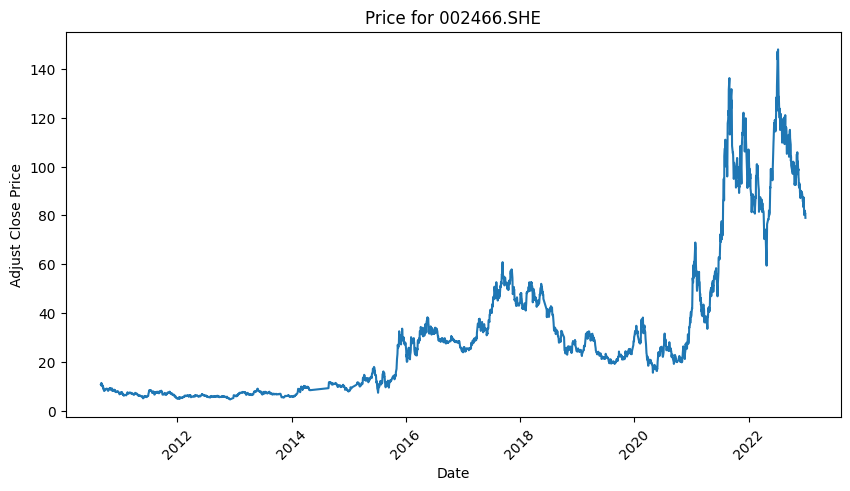

price of LAC.US starts from 2008-09-15
       Adjusted_close_LAC.US
count            3541.000000
mean                6.417680
std                 7.542498
min                 0.370000
25%                 2.292000
50%                 3.600000
75%                 6.450000
max                40.960000


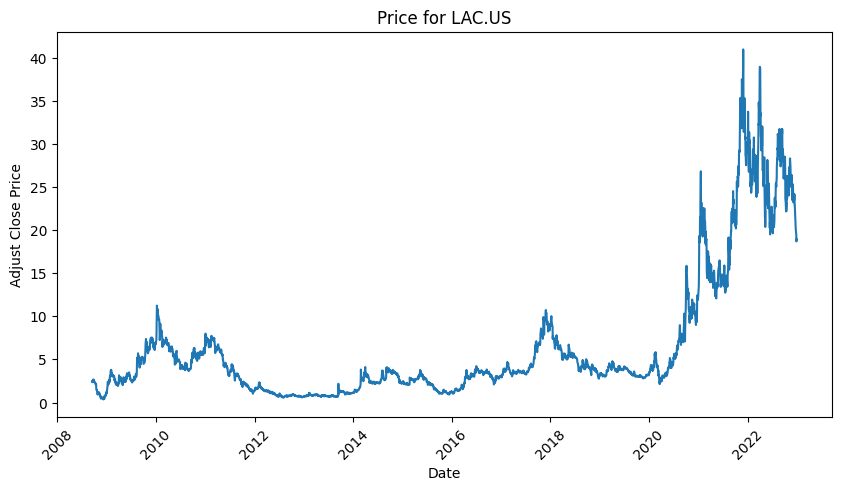

price of ORE.AU starts from 2007-12-04
       Adjusted_close_ORE.AU
count            3459.000000
mean                2.808549
std                 1.839488
min                 0.120500
25%                 1.684850
50%                 2.440000
75%                 3.490000
max                10.220000


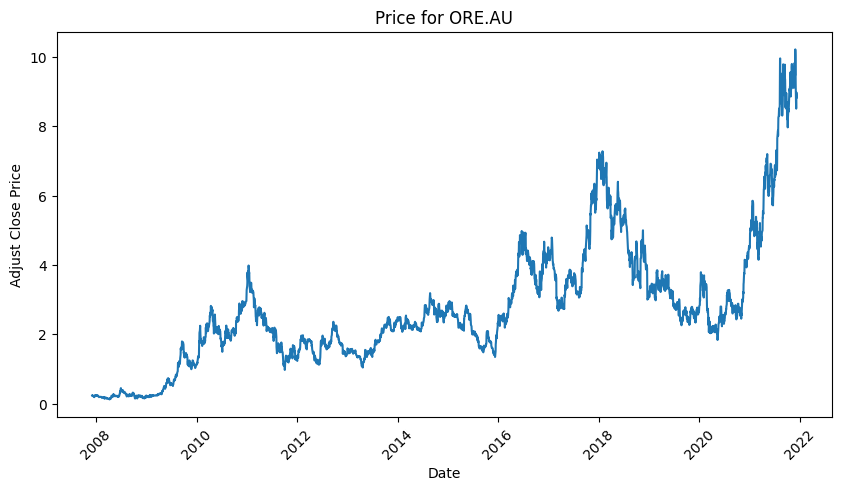

price of GALXF.US starts from 2009-08-12
       Adjusted_close_GALXF.US
count              2361.000000
mean                  2.262566
std                   1.989192
min                   0.000500
25%                   0.810000
50%                   1.775000
75%                   2.800000
max                   9.550000


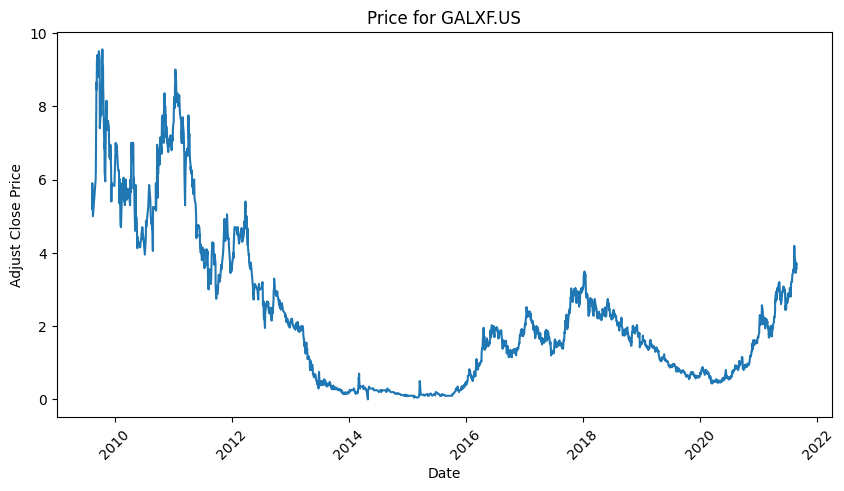

price of LTHM.US starts from 2018-10-11
       Adjusted_close_LTHM.US
count             1063.000000
mean                16.507686
std                  8.216393
min                  4.190000
25%                  8.085000
50%                 16.730000
75%                 23.425000
max                 35.050000


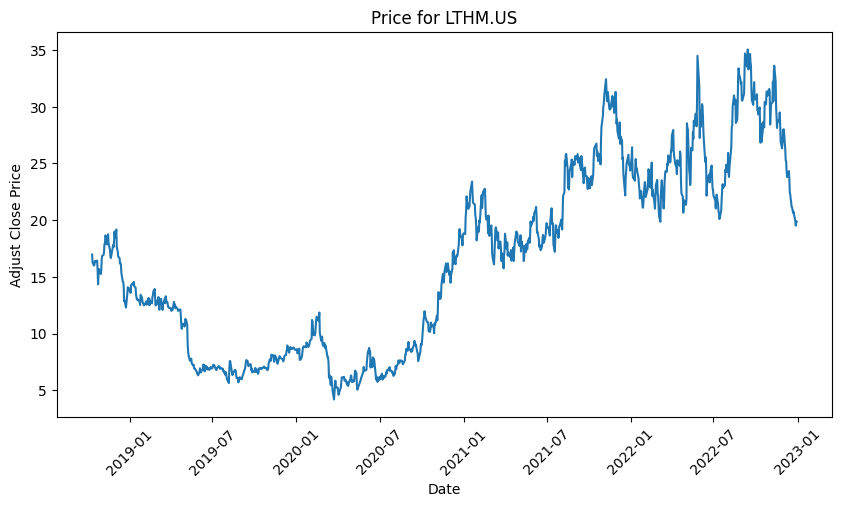

In [754]:
for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('Adjust Close Price')
    plt.title('Price for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

In [755]:
for col in df_Limin.columns:
    df_Limin[col] = np.log(df_Limin[col]) - np.log(df_Limin[col].shift(1))

/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [584]:
df_Limin.to_csv('Lithium Mining Companies stock prices.csv', index=False)

* Statistics and Visulization

price of ALB.US starts from 2005-01-04
       Adjusted_close_ALB.US
count            4419.000000
mean                0.000606
std                 0.024670
min                -0.222026
25%                -0.010178
50%                 0.001152
75%                 0.012102
max                 0.137192


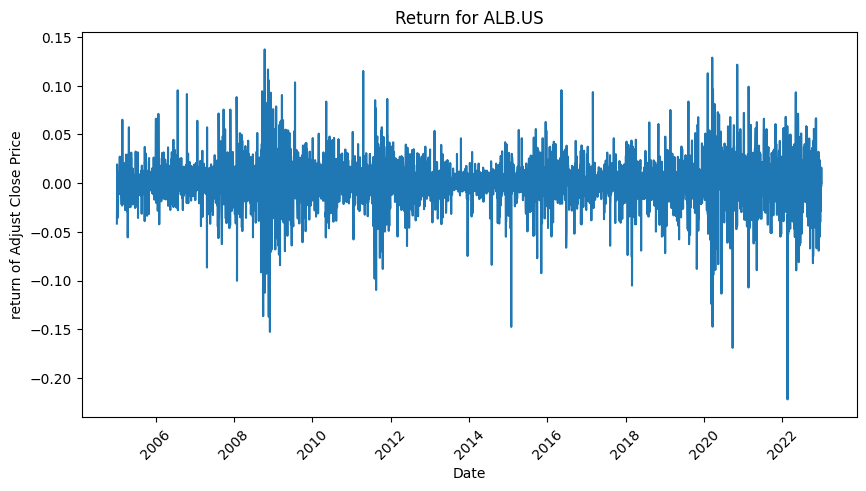

price of SQM.US starts from 2005-01-04
       Adjusted_close_SQM.US
count            4419.000000
mean                0.000807
std                 0.027620
min                -0.191765
25%                -0.012249
50%                 0.000517
75%                 0.014096
max                 0.355040


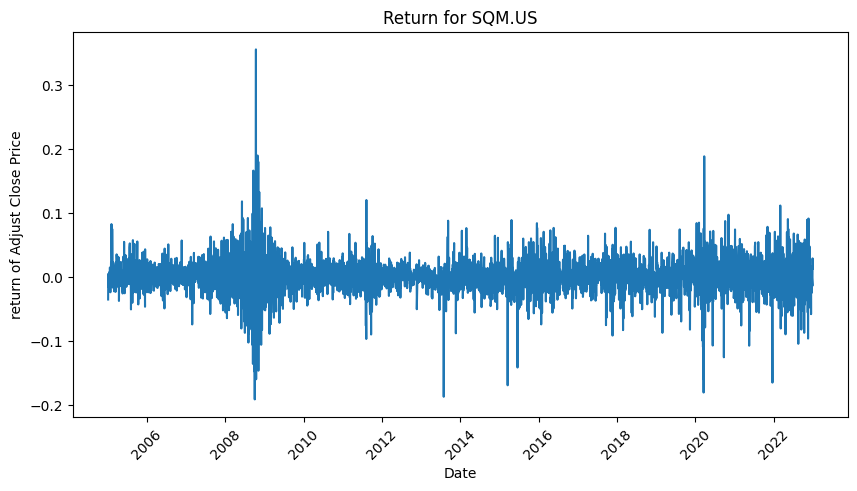

price of 002466.SHE starts from 2010-09-01
       Adjusted_close_002466.SHE
count                2747.000000
mean                    0.000443
std                     0.036301
min                    -0.105494
25%                    -0.019162
50%                     0.000000
75%                     0.018253
max                     0.095577


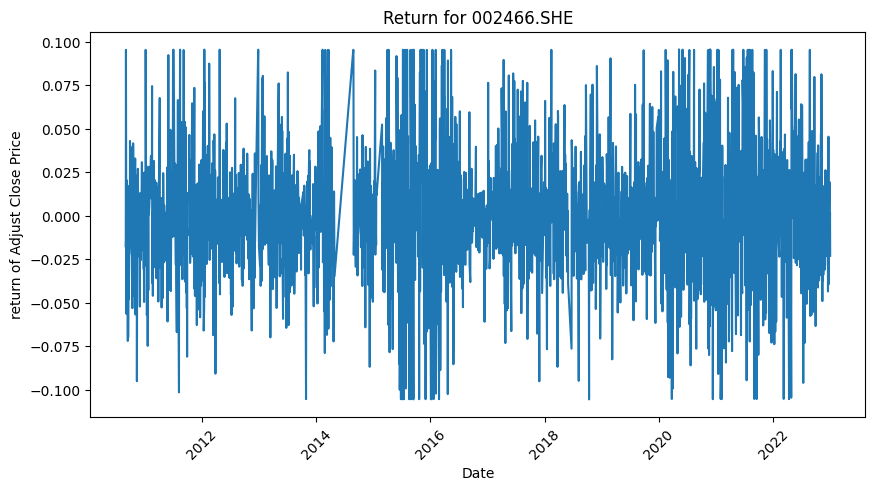

price of LAC.US starts from 2008-09-16
       Adjusted_close_LAC.US
count            3385.000000
mean                0.000016
std                 0.060859
min                -0.766921
25%                -0.029630
50%                -0.002322
75%                 0.027029
max                 1.037194


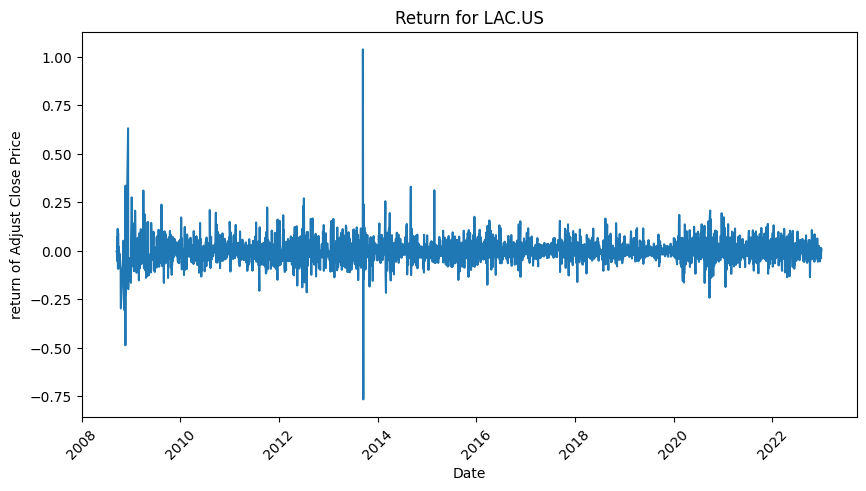

price of ORE.AU starts from 2007-12-05
       Adjusted_close_ORE.AU
count            3337.000000
mean                0.001128
std                 0.041030
min                -0.236427
25%                -0.020333
50%                 0.000000
75%                 0.021885
max                 0.228439


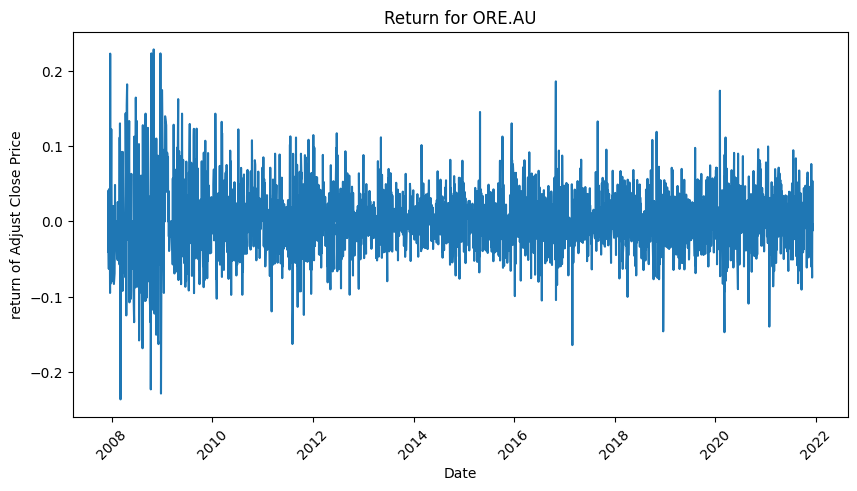

price of GALXF.US starts from 2009-08-13
       Adjusted_close_GALXF.US
count              1984.000000
mean                  0.005054
std                   0.153783
min                  -0.693147
25%                  -0.025211
50%                   0.000000
75%                   0.026074
max                   6.109248


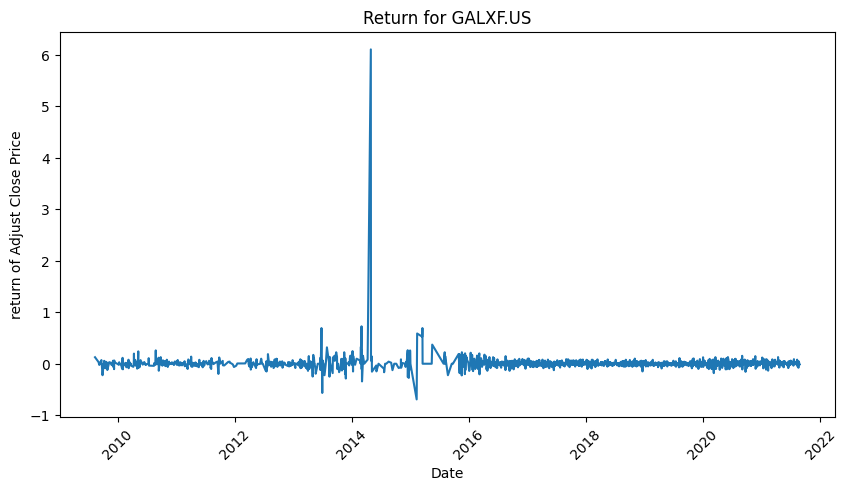

price of LTHM.US starts from 2018-10-12
       Adjusted_close_LTHM.US
count             1027.000000
mean                 0.000428
std                  0.044820
min                 -0.199333
25%                 -0.025088
50%                  0.000526
75%                  0.027137
max                  0.264257


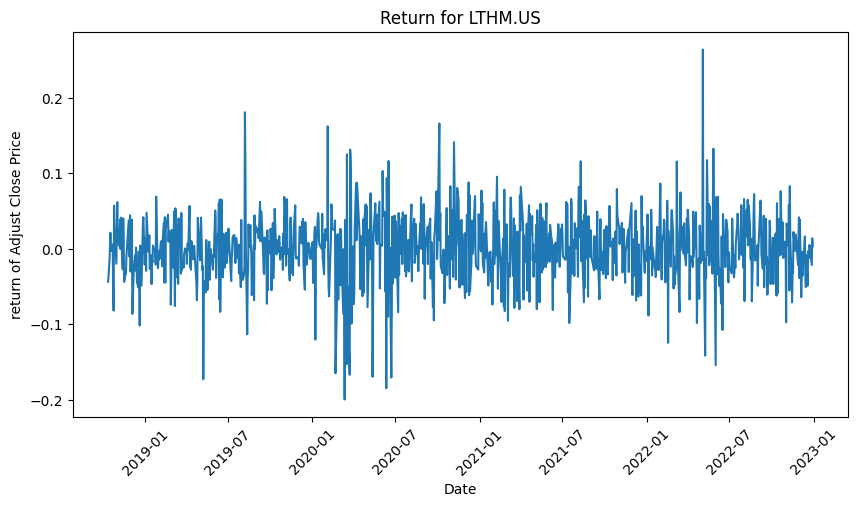

In [757]:
for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('return of Adjust Close Price')
    plt.title('Return for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

price of GALXF.US starts from 2009-08-13
       Adjusted_close_GALXF.US
count              1984.000000
mean                  0.005054
std                   0.153783
min                  -0.693147
25%                  -0.025211
50%                   0.000000
75%                   0.026074
max                   6.109248


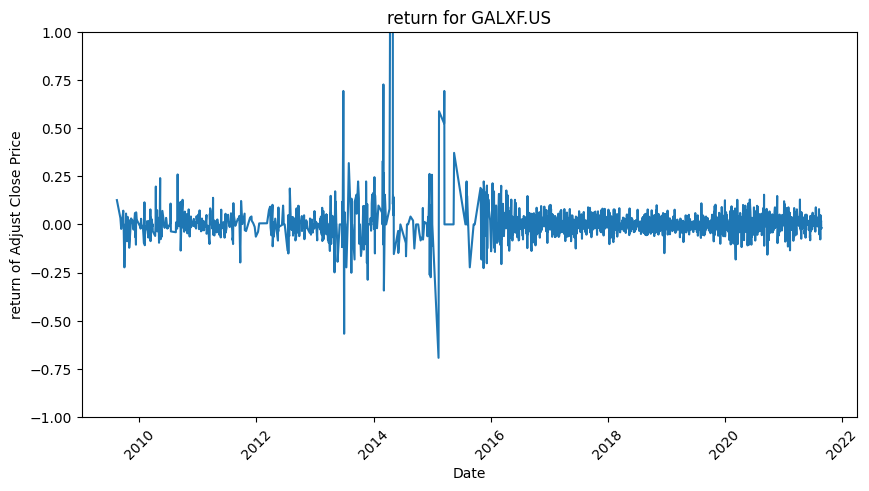

In [645]:
for stock in mining_comp_list:
    if stock == 'GALXF.US':
        sep_data = df_Limin['Adjusted_close'+'_'+stock]
        sep_data =  sep_data.dropna()
        date = sep_data.index[0]
        print ('price of ' + stock + ' starts from '+date)
        stats = pd.DataFrame(sep_data.describe())
        print(stats)
        # 将 'date' 列设置为索引
        sep_data.index= pd.to_datetime(sep_data.index)
        # 绘制时间序列图
        plt.figure(figsize=(10, 5))
        plt.plot(sep_data.index, sep_data)
        plt.xlabel('Date')
        plt.ylabel('return of Adjust Close Price')
        plt.title('return for ' + stock)
        plt.xticks(rotation=45)
        plt.ylim(-1, 1)  # 设置y轴范围为-1到1
        plt.show()

* plot all the stocks in one graph

price of ALB.US starts from 2005-01-04
price of SQM.US starts from 2005-01-04
price of 002466.SHE starts from 2010-09-01
price of LAC.US starts from 2008-09-16
price of ORE.AU starts from 2007-12-05
price of GALXF.US starts from 2009-08-13


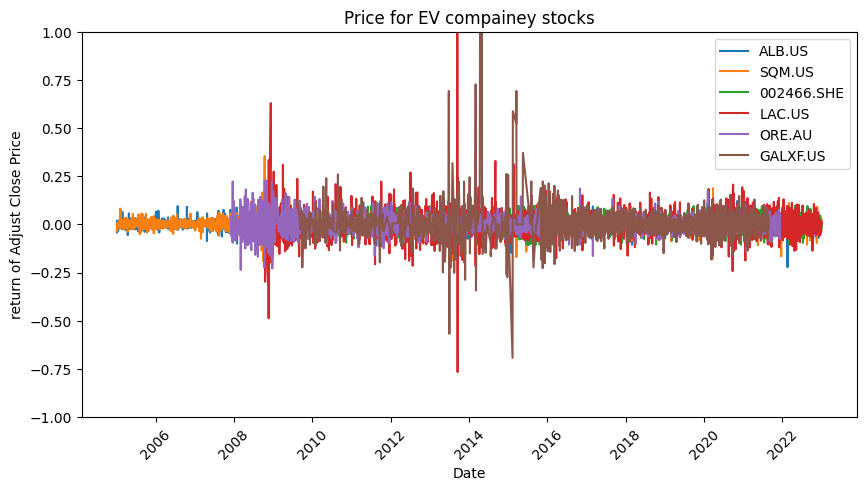

In [628]:
plt.figure(figsize=(10, 5))
for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('Price for EV compainey stocks')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(-1, 1)
plt.show()

* Histogram

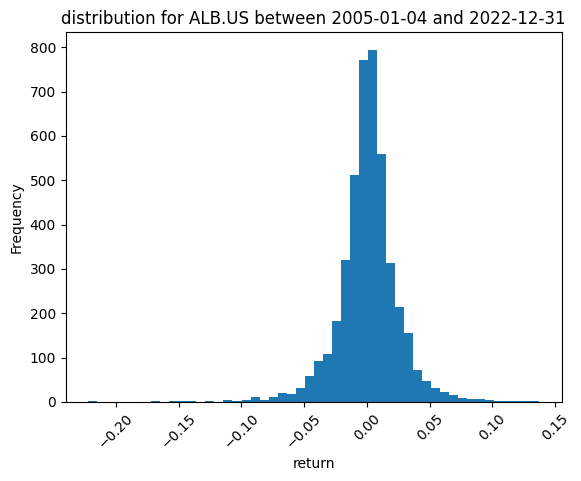

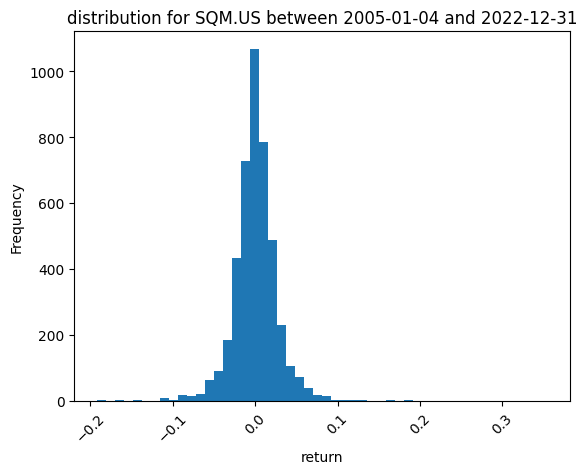

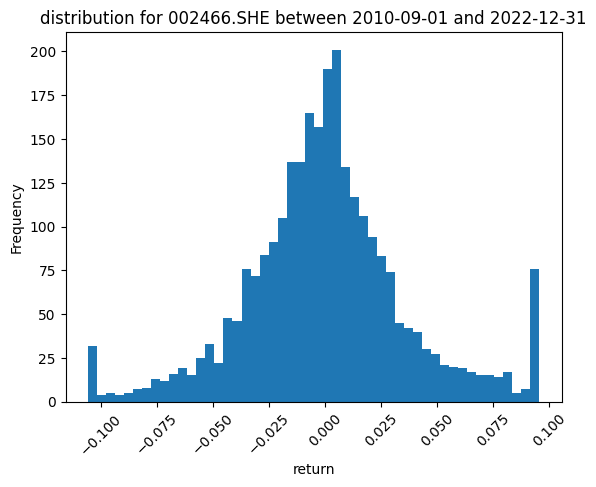

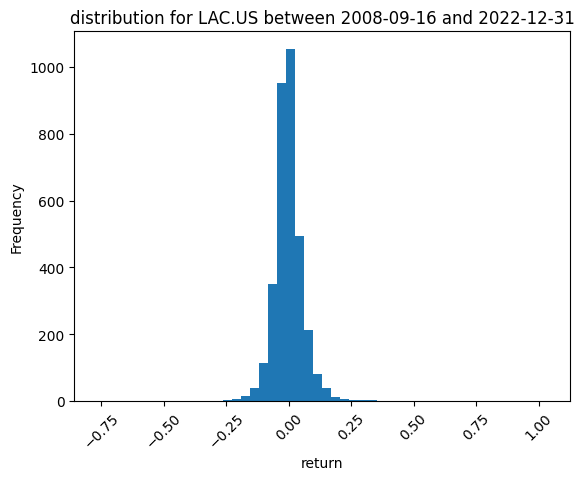

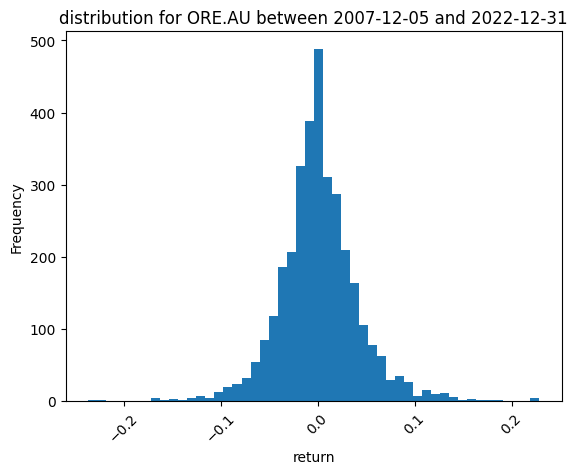

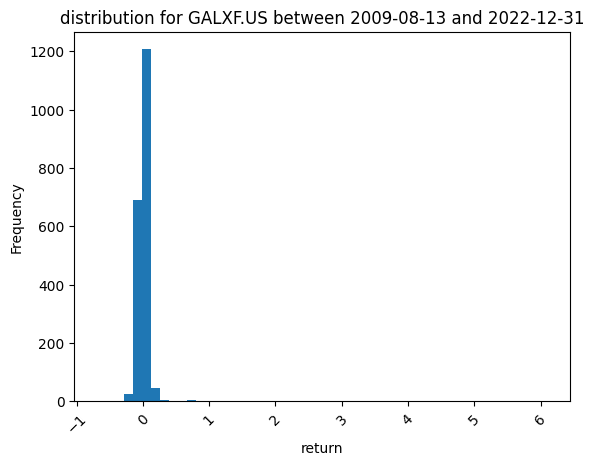

In [654]:
for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index= pd.to_datetime(sep_data.index)
    plt.hist(sep_data, bins=50)
    plt.xlabel('return')
    plt.ylabel('Frequency')
    plt.title('distribution for ' + stock + ' between ' + date+' and 2022-12-31')
    plt.xticks(rotation=45)
    plt.show()

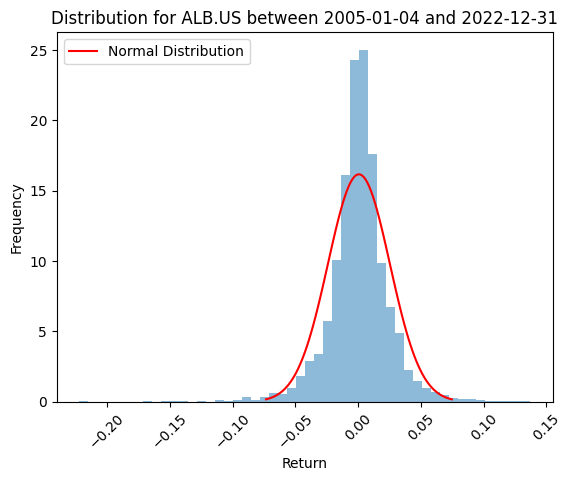

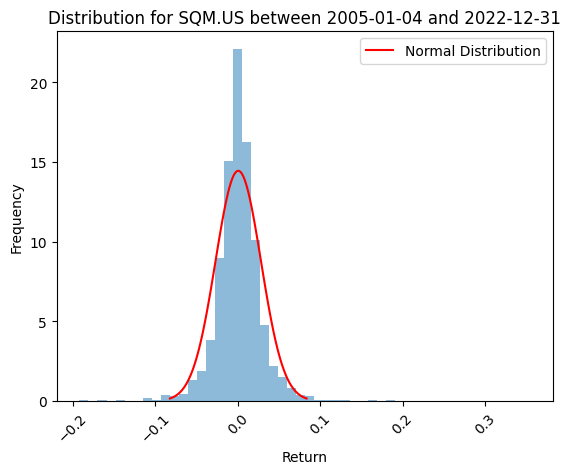

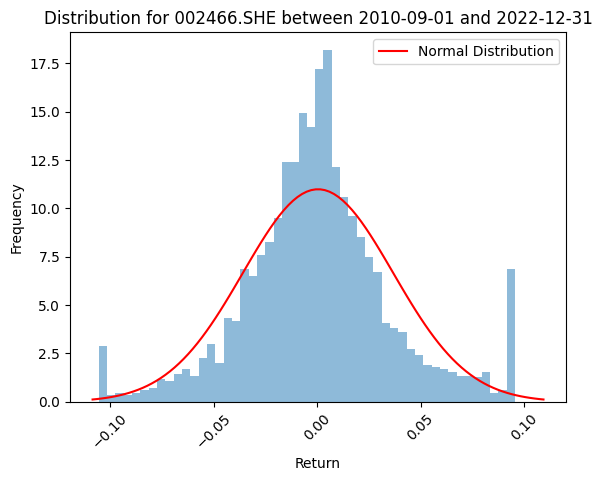

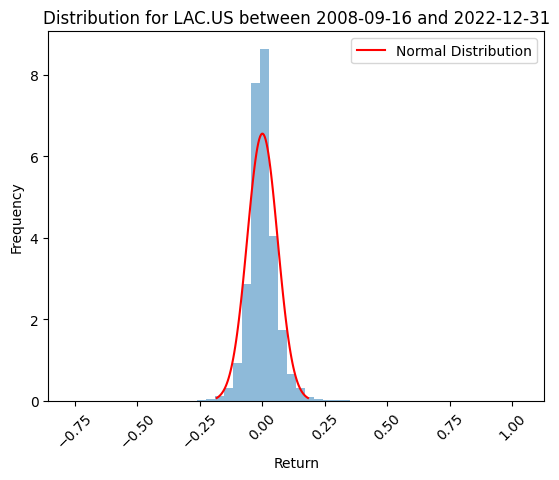

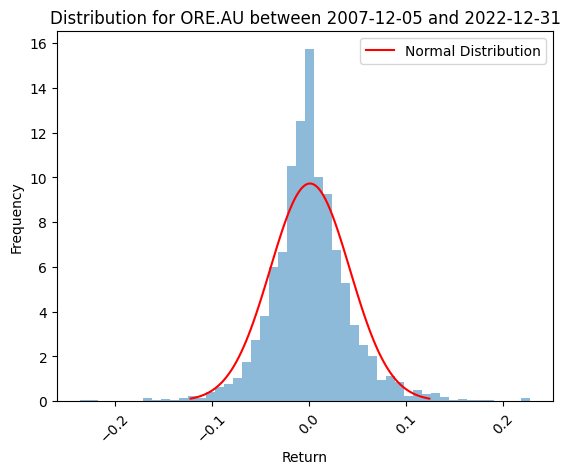

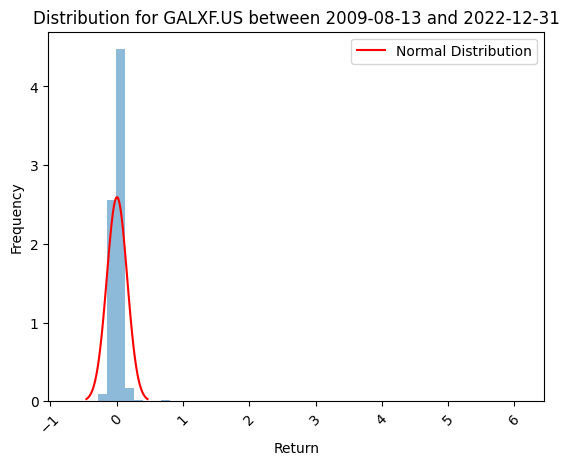

In [655]:
import scipy.stats as stats

for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制直方图
    plt.hist(sep_data, bins=50, density=True, alpha=0.5)
    
    # 生成正态分布的概率密度函数
    mu, sigma = sep_data.mean(), sep_data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    
    # 绘制正态分布曲线
    plt.plot(x, y, 'r-', label='Normal Distribution')
    
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.title('Distribution for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


* Box Plot

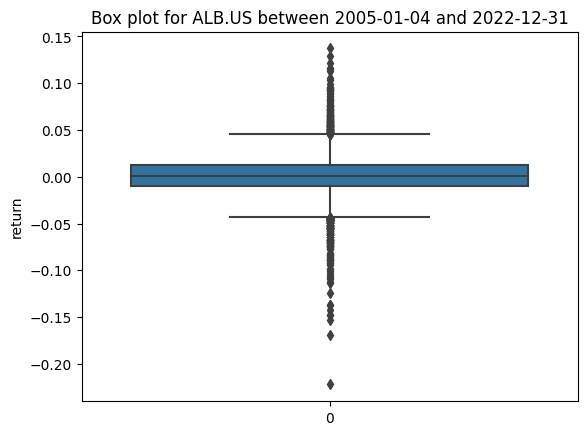

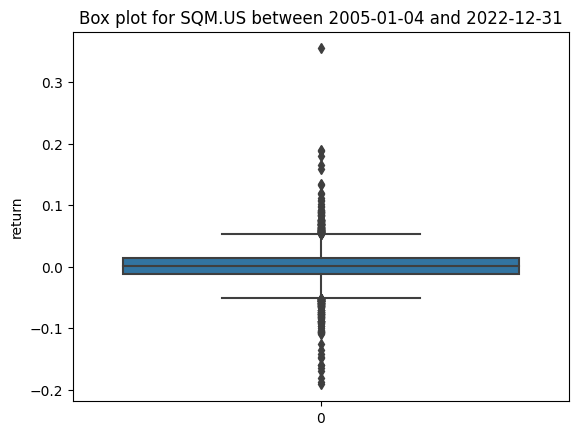

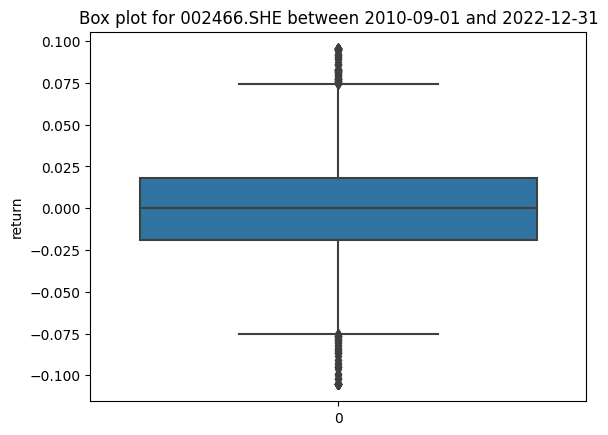

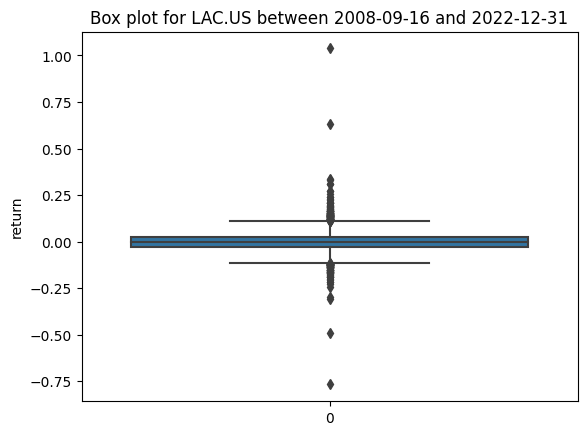

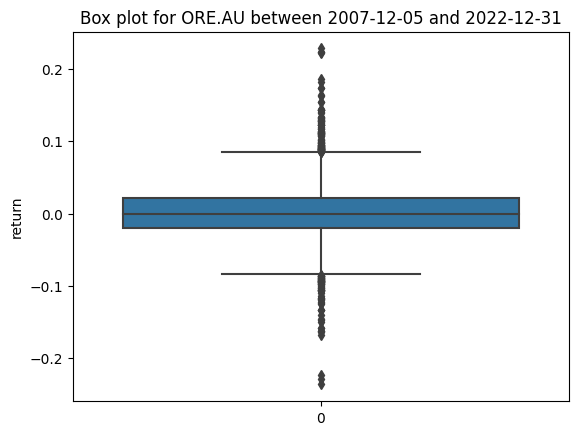

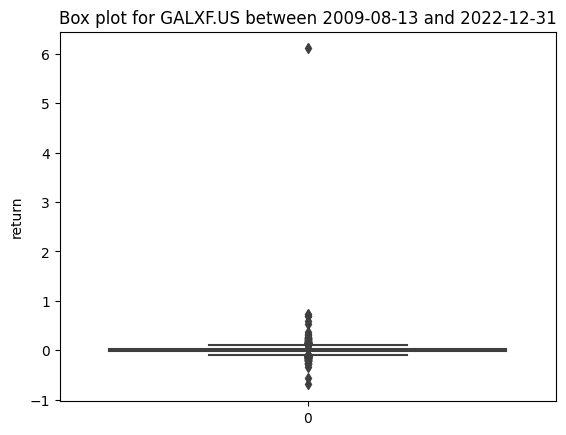

In [656]:
for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    # 绘制箱线图
    sns.boxplot(sep_data)
    plt.ylabel('return')
    plt.title('Box plot for '+ stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* QQ plot

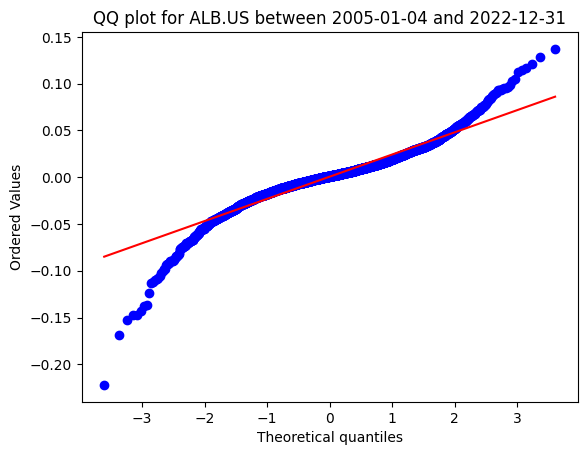

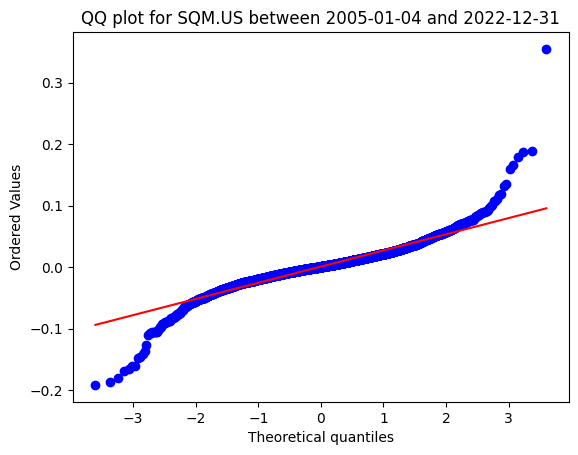

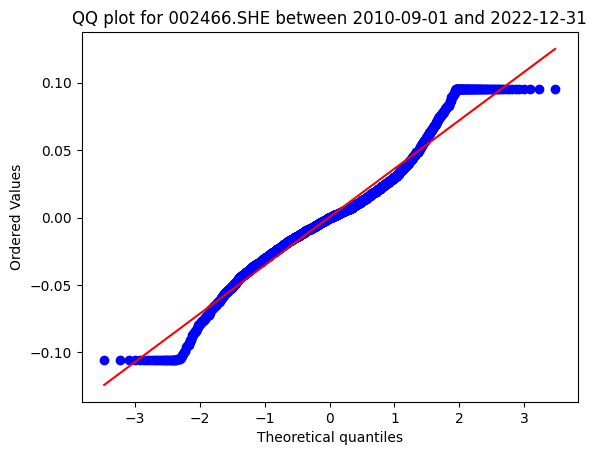

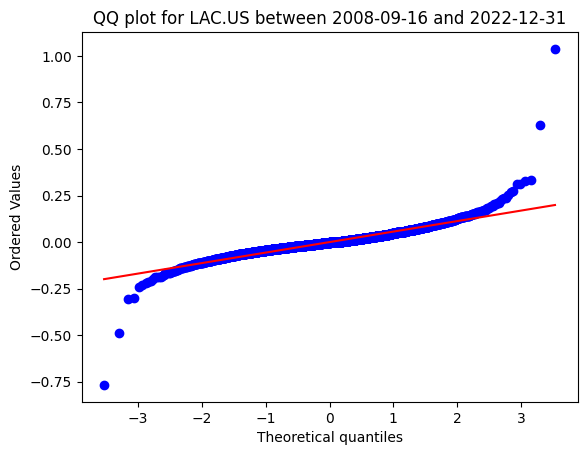

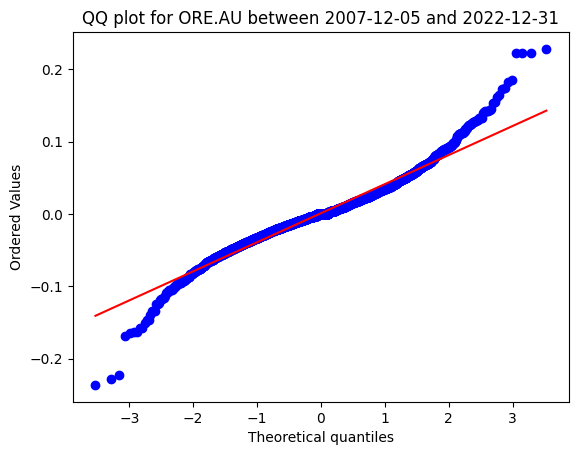

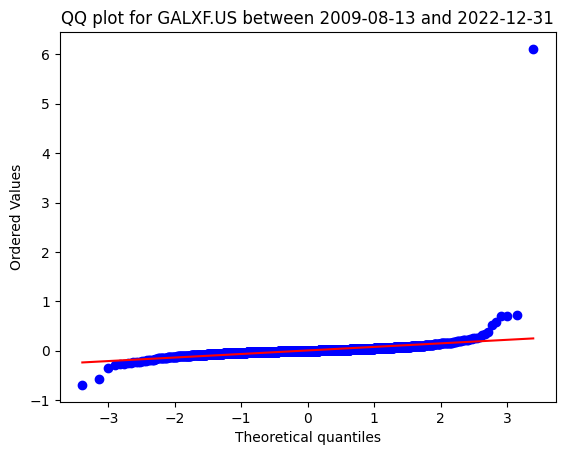

In [657]:
import scipy.stats as stats

for stock in mining_comp_list:
    sep_data = df_Limin['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制QQ图
    stats.probplot(sep_data, dist='norm', plot=plt)
    plt.title('QQ plot for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* Have a look at the recent 2 years 

In [724]:
df_Limin.to_csv('./Data/Lithium mining companies.csv', index=True)

## Try Web scrapping from investing.com (ignore this part)

In [47]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
from fake_useragent import UserAgent

def convert_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d").strftime("%Y%m%d")

url = "https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data"

ua = UserAgent()
headers = {
    "User-Agent": ua.random,
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "X-Requested-With": "XMLHttpRequest"
}

start_date = "2022-01-01"
end_date = "2022-12-31"
start_date_formatted = convert_date(start_date)
end_date_formatted = convert_date(end_date)

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    table = soup.find("table", {"id": "curr_table"})
    headers = [header.text for header in table.find_all("th")]

    with open("lithium_carbonate_99_min_china_futures.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(headers)

        for row in table.find_all("tr")[1:]:
            data = [cell.text for cell in row.find_all("td")]
            date = convert_date(data[0])

            if start_date_formatted <= date <= end_date_formatted:
                writer.writerow(data)
            elif date < start_date_formatted:
                break
else:
    print("请求失败，状态码：", response.status_code)

请求失败，状态码： 403


In [48]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
from fake_useragent import UserAgent

def convert_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d").strftime("%Y%m%d")

url = "https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data"

ua = UserAgent()
headers = {
    "User-Agent": ua.random,
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "X-Requested-With": "XMLHttpRequest",
    "Referer": "https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data",
    "Host": "www.investing.com"
}

start_date = "2022-01-01"
end_date = "2022-12-31"
start_date_formatted = convert_date(start_date)
end_date_formatted = convert_date(end_date)

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    table = soup.find("table", {"id": "curr_table"})
    headers = [header.text for header in table.find_all("th")]

    with open("lithium_carbonate_99_min_china_futures.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(headers)

        for row in table.find_all("tr")[1:]:
            data = [cell.text for cell in row.find_all("td")]
            date = convert_date(data[0])

            if start_date_formatted <= date <= end_date_formatted:
                writer.writerow(data)
            elif date < start_date_formatted:
                break
else:
    print("请求失败，状态码：", response.status_code)

请求失败，状态码： 403


In [ ]:
import os
import csv
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

def convert_date(date_str):
    return datetime.strptime(date_str, "%b %d, %Y").strftime("%Y%m%d")

url = "https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data"

start_date = "Jan 01, 2022"
end_date = "Dec 31, 2022"
start_date_formatted = convert_date(start_date)
end_date_formatted = convert_date(end_date)

# Set up selenium webdriver
chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(executable_path='YOUR_CHROMEDRIVER_PATH', options=chrome_options)

driver.get(url)
driver.implicitly_wait(10)

# Accept cookies
try:
    driver.find_element_by_css_selector(".agreeButton").click()
except:
    pass

# Get the table using Selenium
table_element = driver.find_element_by_css_selector("table.genTbl.closedTbl.historicalTbl")
headers = [header.text for header in table_element.find_elements_by_tag_name("th")]

# Parse the table rows using BeautifulSoup
table_html = table_element.get_attribute("outerHTML")
soup = BeautifulSoup(table_html, "html.parser")

with open("lithium_carbonate_99_min_china_futures.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)

    for row in soup.find_all("tr")[1:]:
        data = [cell.text for cell in row.find_all("td")]
        date = convert_date(data[0])

        if start_date_formatted <= date <= end_date_formatted:
            writer.writerow(data)
        elif date < start_date_formatted:
            break

driver.quit()

In [61]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
# import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [ ]:
url = 'https://www.investing.com/equities/united-states'
browser = webdriver.Chrome()

browser.get(url)
print("Retriving the site...")

selectOption = Select(browser.find_element_by_id('stocksFilter'))
selectOption.select_by_visible_text('United States all stocks')
# print(browser.page_source)

## Lithium related ETF

In [659]:
ETF_list = ['LIT.US','BATT.US','HLIT.TO',
            'ACDC.AU','LITU.LSE','LI7U.XETRA','LITG.LSE','394670.KO','LITU.SW','QCLN.US',
            'ICLN.US','LIT.V', 'LIT.LSE','TAN.US','PBW.US']

 * Not avalaible for 'LIT.AX' 'LITP.US', '7GXQ' 'CHRG'

In [760]:
import requests
import pandas as pd
import io

ETF_list = ['LIT.US','QCLN.US','ICLN.US','PBW.US','LIT.V','TAN.US','ARKQ.US']

api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

for stock in ETF_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)

        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

df_ETF = all_dates_df
for stock, df in dataframes.items():
    df_ETF = df_ETF.merge(df, on='Date', how='left')

In [761]:
df_ETF.set_index('Date', inplace=True)
for col in df_ETF.columns:
    df_ETF[col] = pd.to_numeric(df_ETF[col], errors='coerce')

price of LIT.US starts from 2010-07-23
       Adjusted_close_LIT.US
count            3133.000000
mean               34.095382
std                18.363748
min                15.359500
25%                22.733000
50%                26.669200
75%                35.558400
max                95.210300


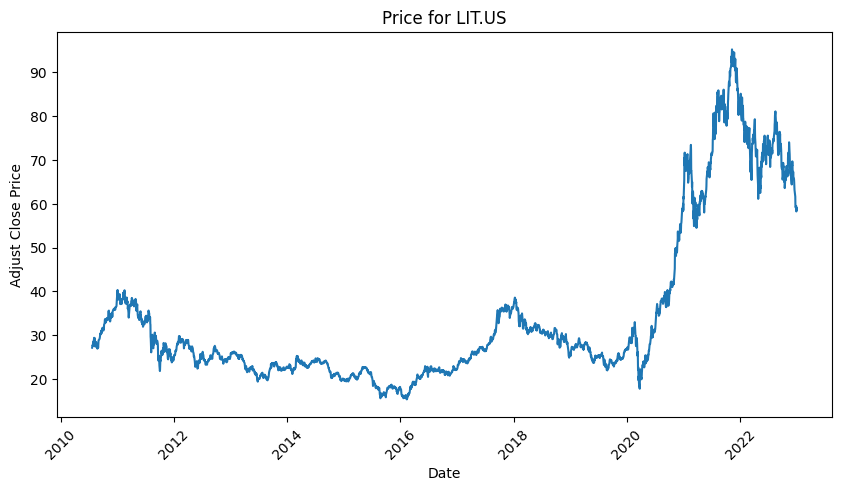

price of QCLN.US starts from 2007-02-14
       Adjusted_close_QCLN.US
count             3996.000000
mean                23.226923
std                 17.086433
min                  7.261400
25%                 13.883875
50%                 17.566000
75%                 21.830500
max                 87.812700


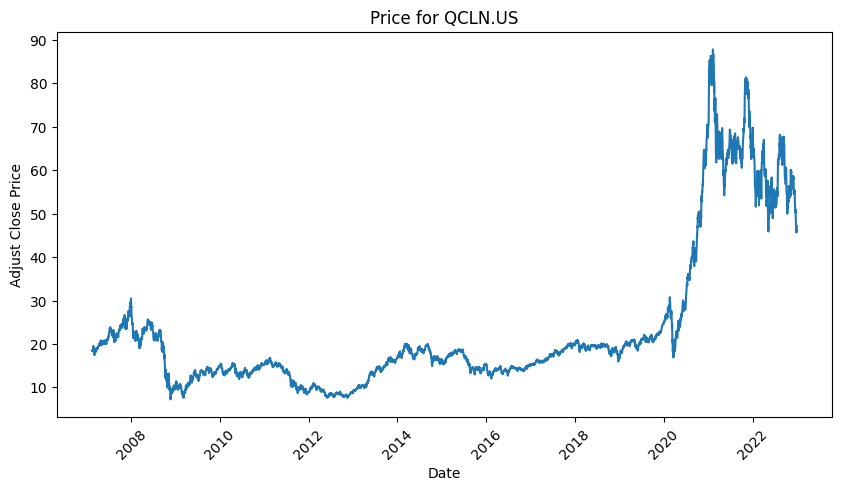

price of ICLN.US starts from 2008-06-25
       Adjusted_close_ICLN.US
count             3656.000000
mean                12.202748
std                  6.041471
min                  4.956300
25%                  8.154700
50%                  9.686700
75%                 14.625125
max                 38.596400


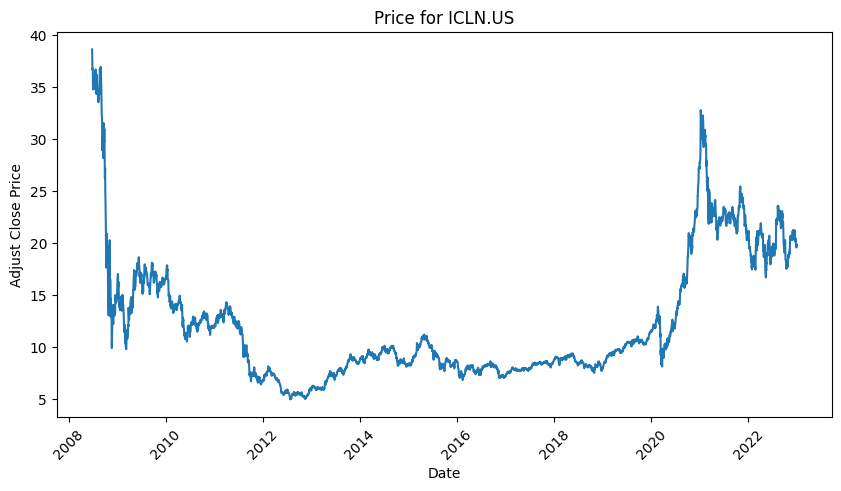

price of PBW.US starts from 2005-03-03
       Adjusted_close_PBW.US
count            4490.000000
mean               40.955293
std                23.836005
min                14.238400
25%                22.253700
50%                31.650850
75%                59.525800
max               128.056900


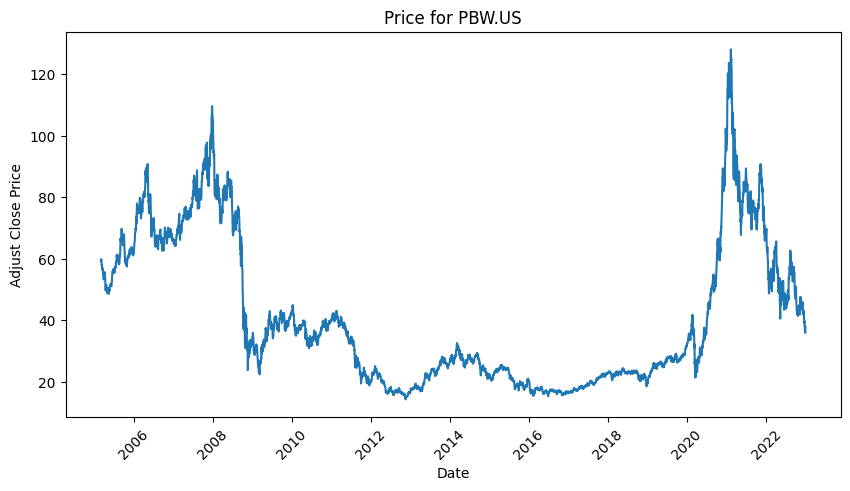

price of LIT.V starts from 2005-01-03
       Adjusted_close_LIT.V
count           4569.000000
mean              10.821044
std               21.488693
min                0.040000
25%                0.270000
50%                1.020000
75%                2.580000
max              112.800000


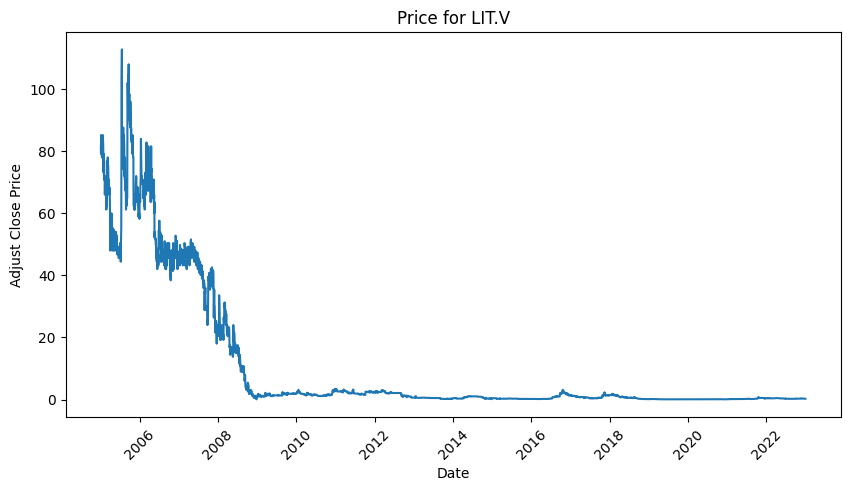

price of TAN.US starts from 2008-04-15
       Adjusted_close_TAN.US
count            3706.000000
mean               46.241825
std                34.321957
min                10.308900
25%                22.483825
50%                33.978800
75%                63.020800
max               215.516600


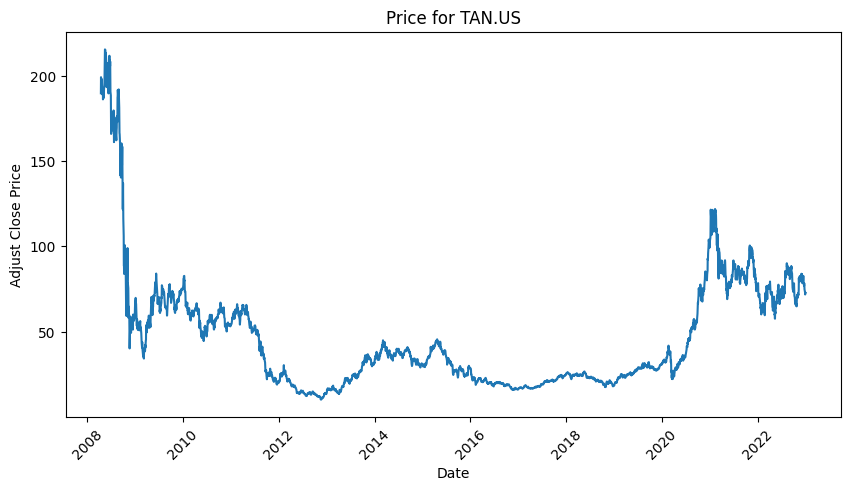

price of ARKQ.US starts from 2014-09-30
       Adjusted_close_ARKQ.US
count             2074.000000
mean                38.865527
std                 21.237574
min                 13.635000
25%                 20.334600
50%                 32.594900
75%                 51.310000
max                 98.419100


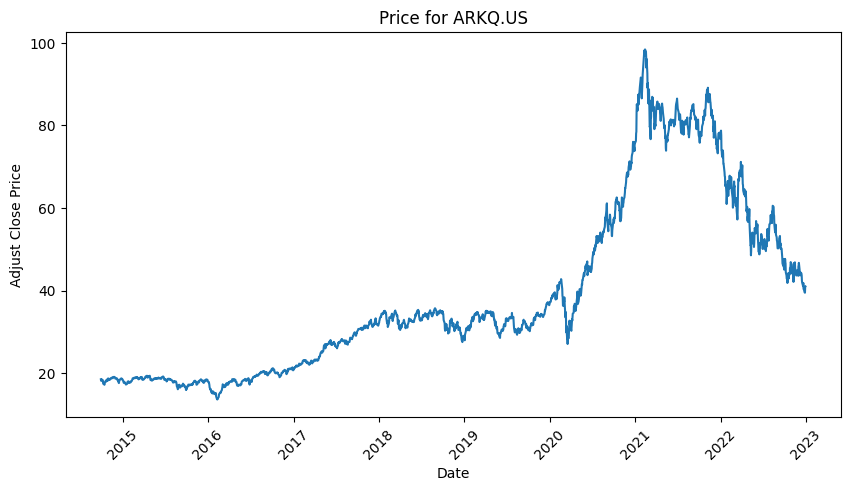

In [762]:
for stock in ETF_list:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('Adjust Close Price')
    plt.title('Price for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

In [763]:
for col in df_ETF.columns:
    df_ETF[col] = np.log(df_ETF[col]) - np.log(df_ETF[col].shift(1))

/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [774]:
df_ETF.to_csv('Lithium related ETF prices.csv', index=True)

* Statistics and visulization

price of LIT.US starts from 2010-07-26
       Adjusted_close_LIT.US
count            3052.000000
mean                0.000211
std                 0.017548
min                -0.145991
25%                -0.008020
50%                 0.000667
75%                 0.009281
max                 0.138826


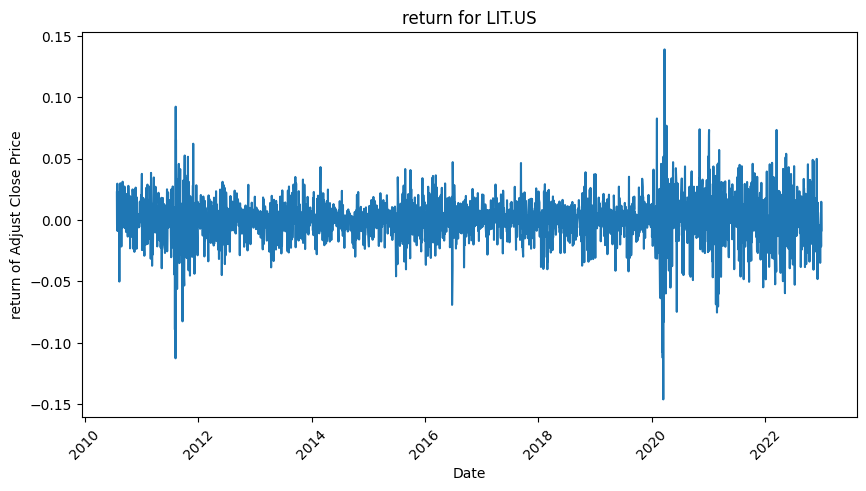

price of QCLN.US starts from 2007-02-15
       Adjusted_close_QCLN.US
count             3882.000000
mean                 0.000215
std                  0.022238
min                 -0.154830
25%                 -0.010320
50%                  0.001229
75%                  0.011856
max                  0.148918


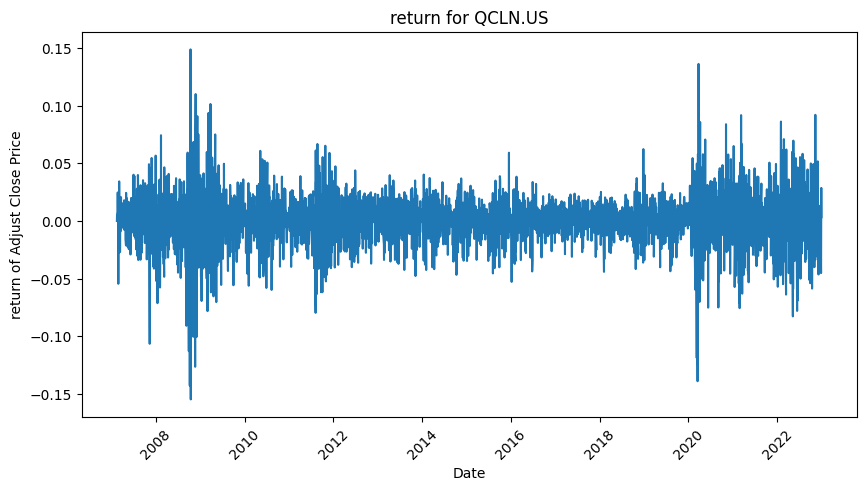

price of ICLN.US starts from 2008-06-26
       Adjusted_close_ICLN.US
count             3556.000000
mean                -0.000215
std                  0.021508
min                 -0.167228
25%                 -0.009233
50%                  0.000000
75%                  0.009973
max                  0.160005


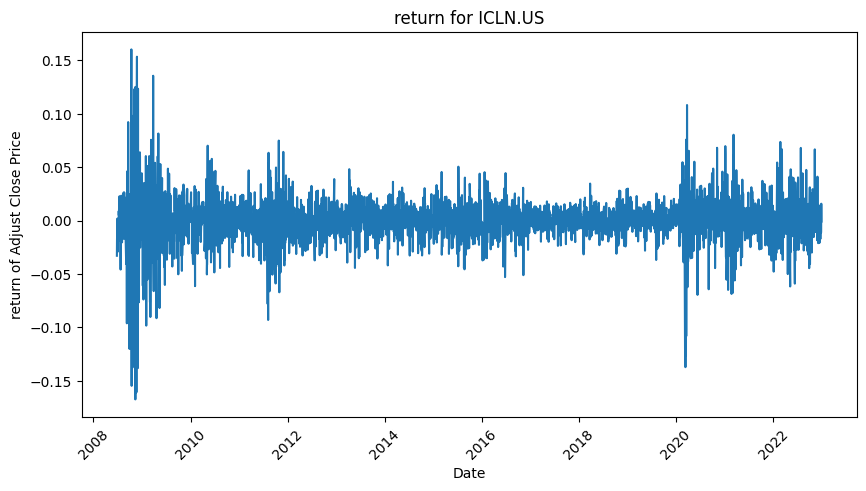

price of PBW.US starts from 2005-03-04
       Adjusted_close_PBW.US
count            4361.000000
mean               -0.000169
std                 0.022777
min                -0.156376
25%                -0.010892
50%                 0.000700
75%                 0.011843
max                 0.158199


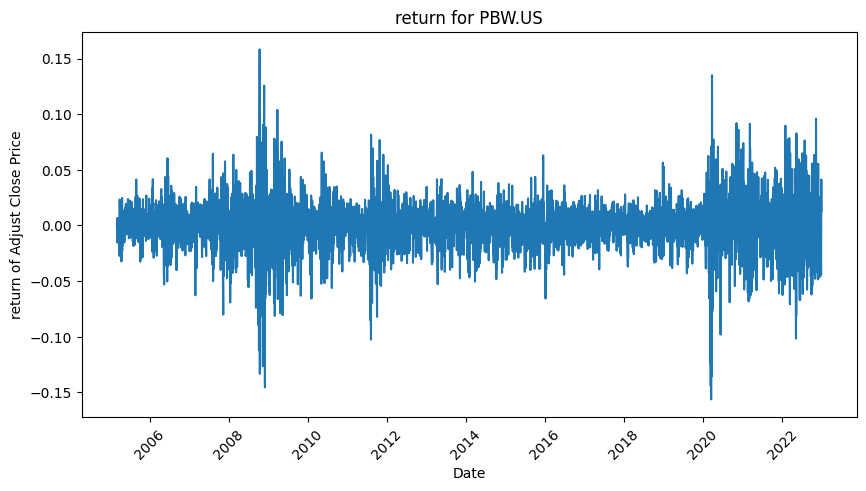

price of LIT.V starts from 2005-01-04
       Adjusted_close_LIT.V
count           4490.000000
mean              -0.001462
std                0.108287
min               -2.302585
25%                0.000000
50%                0.000000
75%                0.000000
max                2.564949


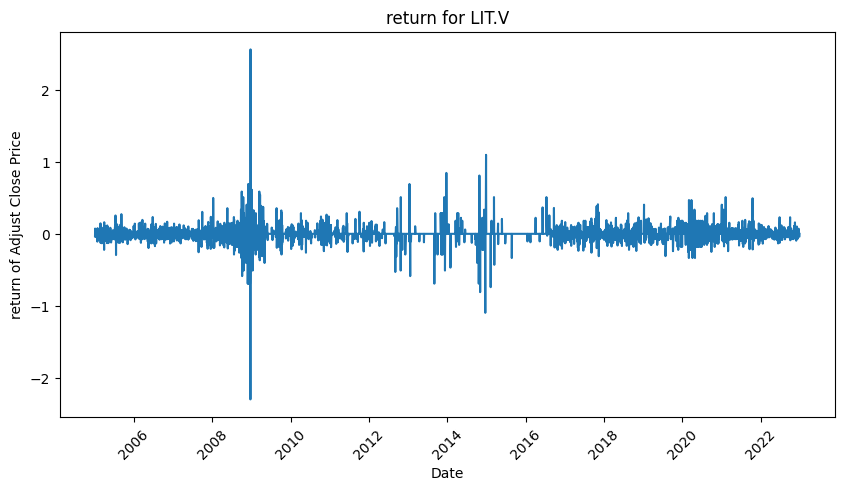

price of TAN.US starts from 2008-04-16
       Adjusted_close_TAN.US
count            3605.000000
mean               -0.000336
std                 0.028959
min                -0.207755
25%                -0.014087
50%                 0.000331
75%                 0.014301
max                 0.197604


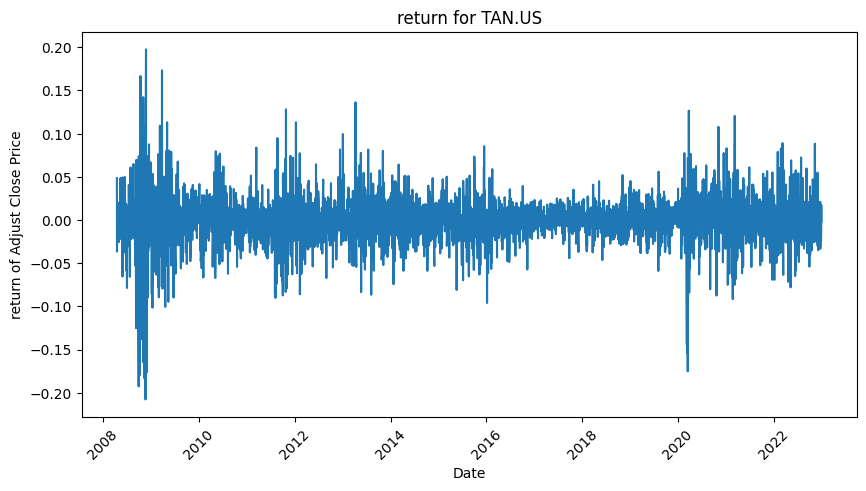

price of ARKQ.US starts from 2014-10-01
       Adjusted_close_ARKQ.US
count             2026.000000
mean                 0.000313
std                  0.017615
min                 -0.110255
25%                 -0.008319
50%                  0.001234
75%                  0.010044
max                  0.088012


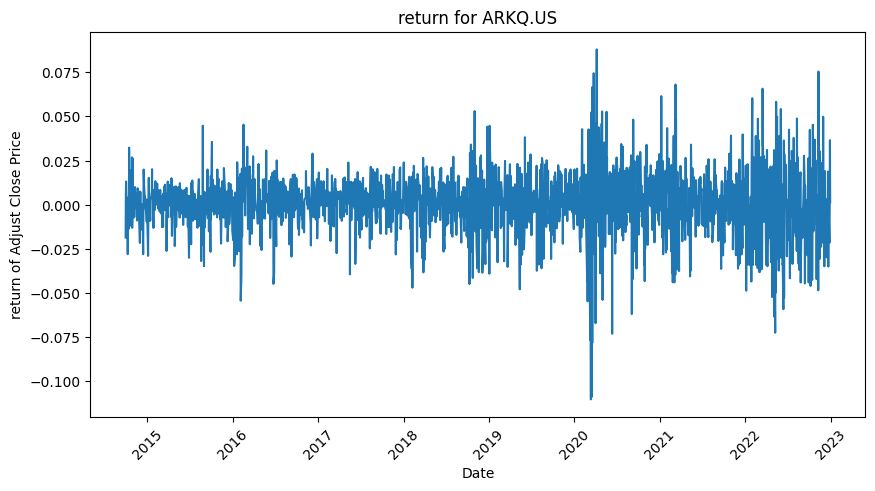

In [764]:
for stock in ETF_list:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('return of Adjust Close Price')
    plt.title('return for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

price of LIT.V starts from 2005-01-04
       Adjusted_close_LIT.V
count           4490.000000
mean              -0.001462
std                0.108287
min               -2.302585
25%                0.000000
50%                0.000000
75%                0.000000
max                2.564949


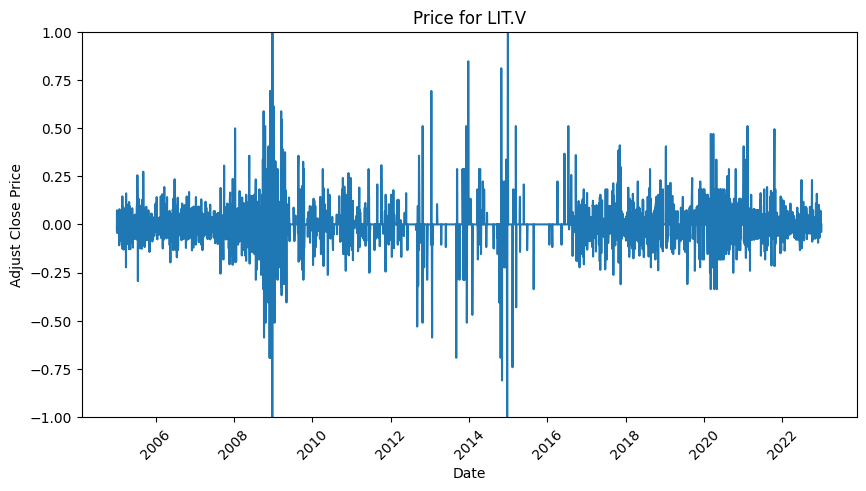

In [666]:
for stock in ETF_list:
    if stock == 'LIT.V':
        sep_data = df_ETF['Adjusted_close'+'_'+stock]
        sep_data =  sep_data.dropna()
        date = sep_data.index[0]
        print ('price of ' + stock + ' starts from '+date)
        stats = pd.DataFrame(sep_data.describe())
        print(stats)
        # 将 'date' 列设置为索引
        sep_data.index= pd.to_datetime(sep_data.index)
        # 绘制时间序列图
        plt.figure(figsize=(10, 5))
        plt.plot(sep_data.index, sep_data)
        plt.xlabel('Date')
        plt.ylabel('Adjust Close Price')
        plt.title('Price for ' + stock)
        plt.xticks(rotation=45)
        plt.ylim(-1, 1)  # 设置y轴范围为-1到1
        plt.show()

* Histogram

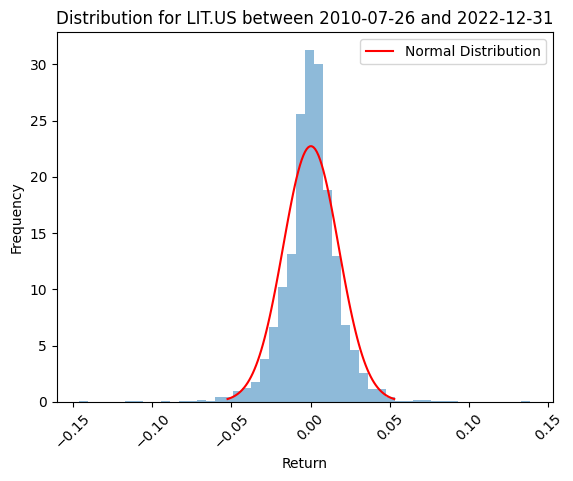

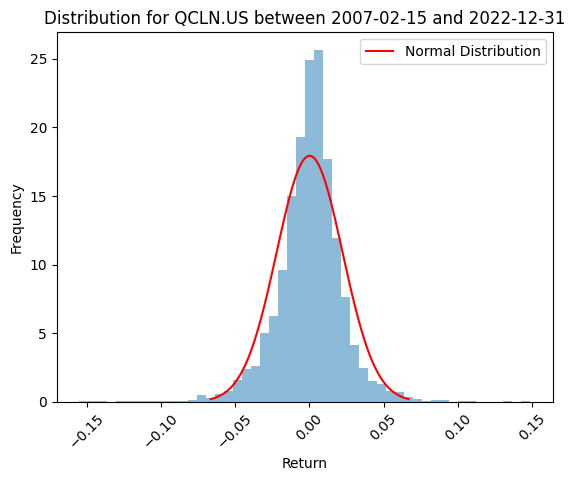

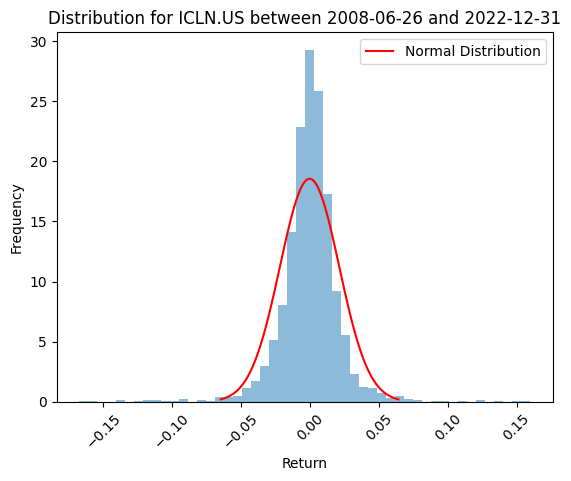

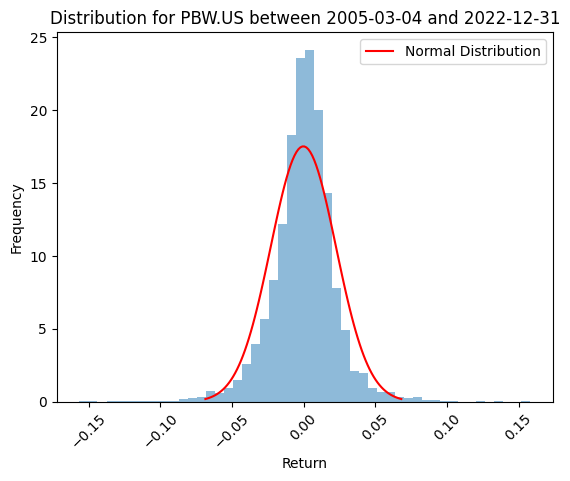

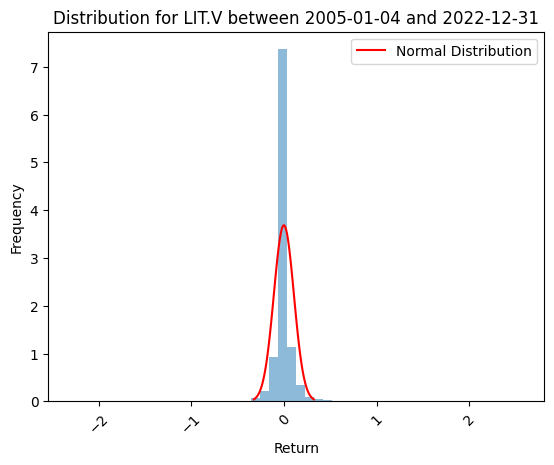

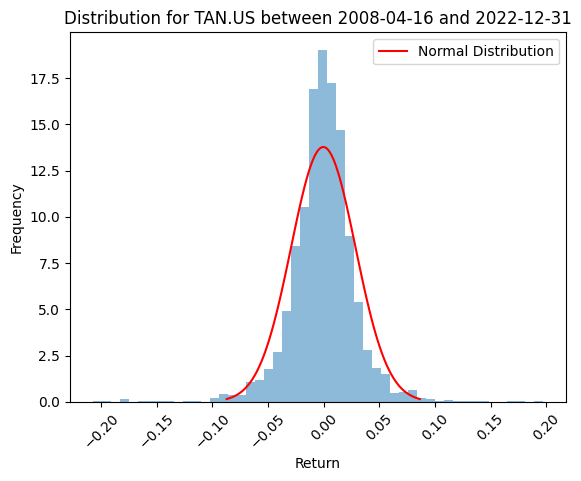

In [667]:
import scipy.stats as stats

for stock in  ETF_list:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制直方图
    plt.hist(sep_data, bins=50, density=True, alpha=0.5)
    
    # 生成正态分布的概率密度函数
    mu, sigma = sep_data.mean(), sep_data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    
    # 绘制正态分布曲线
    plt.plot(x, y, 'r-', label='Normal Distribution')
    
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.title('Distribution for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


* Box plot

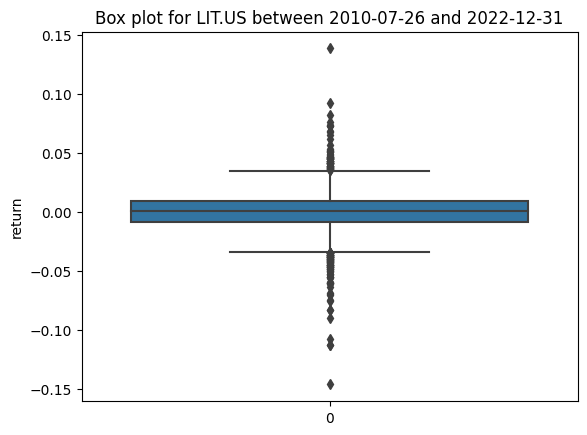

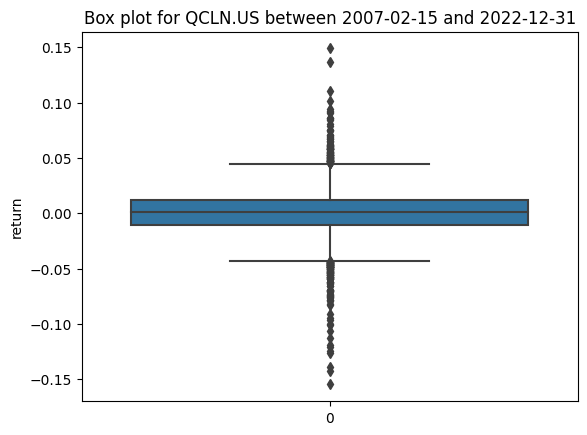

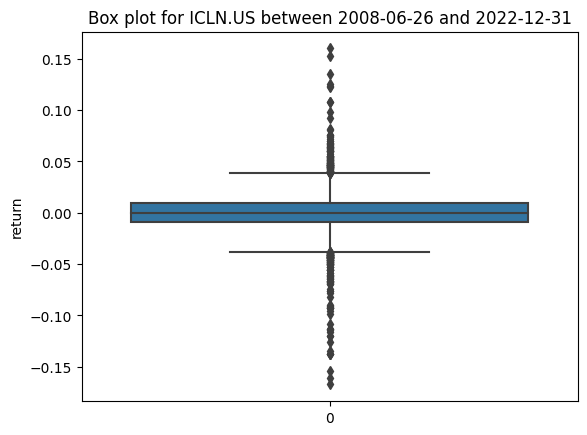

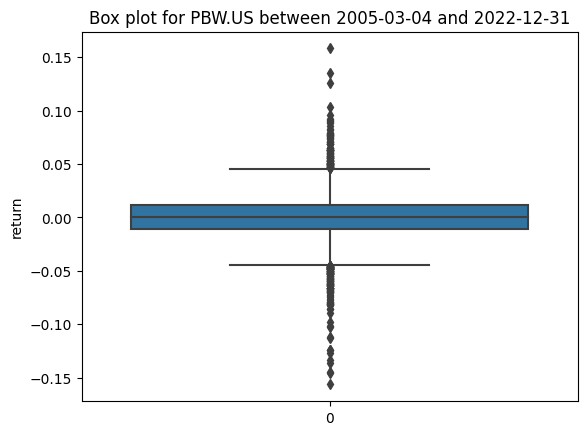

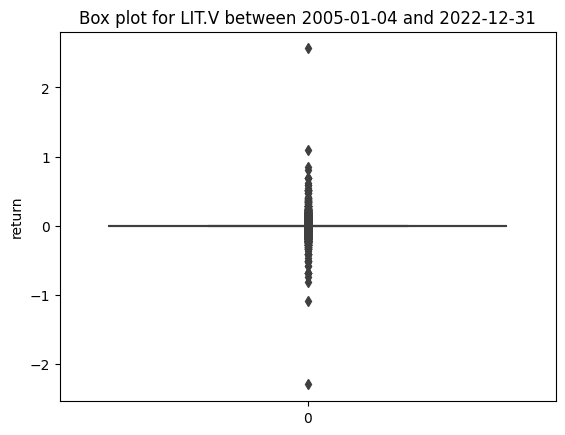

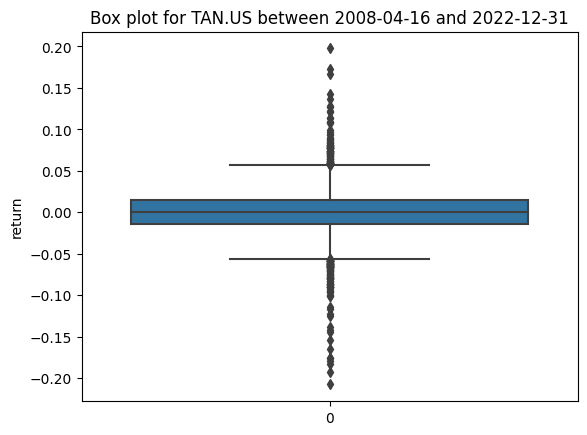

In [668]:
for stock in ETF_list:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    # 绘制箱线图
    sns.boxplot(sep_data)
    plt.ylabel('return')
    plt.title('Box plot for '+ stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* QQ plot

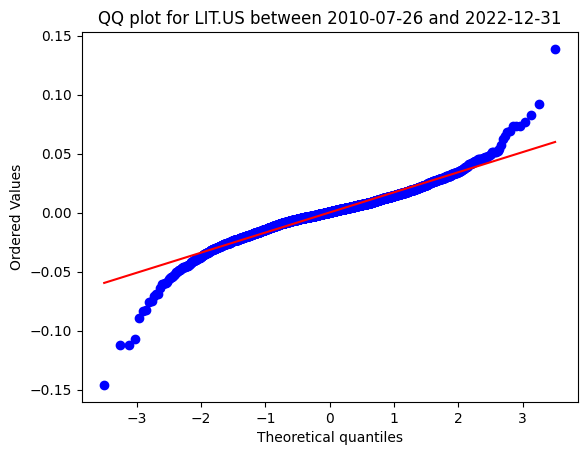

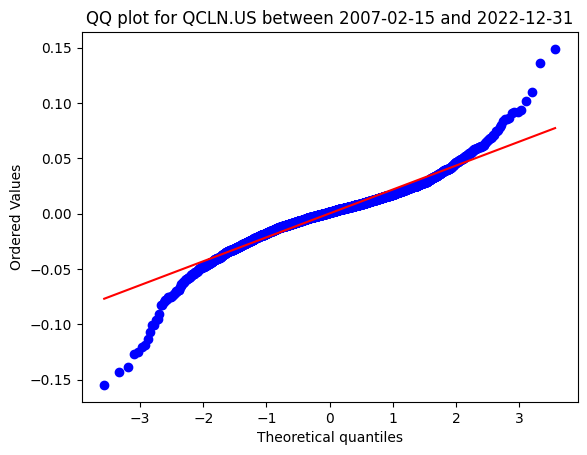

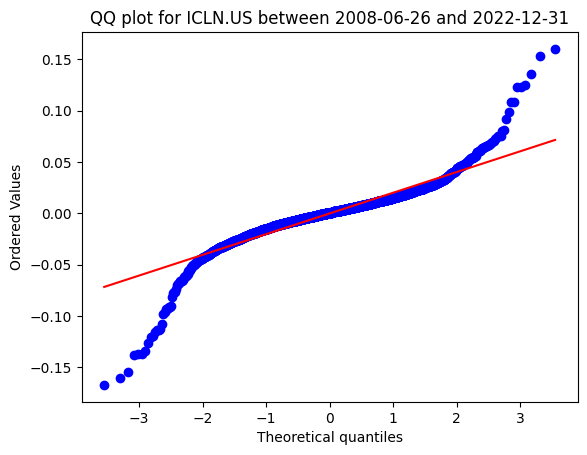

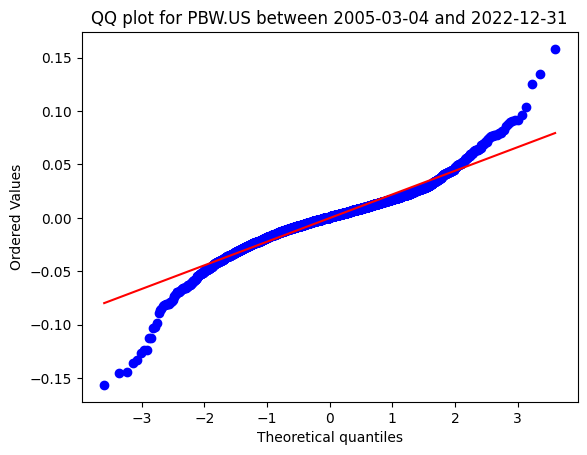

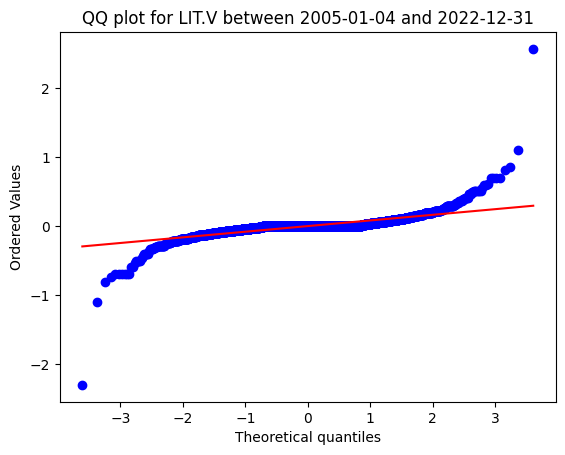

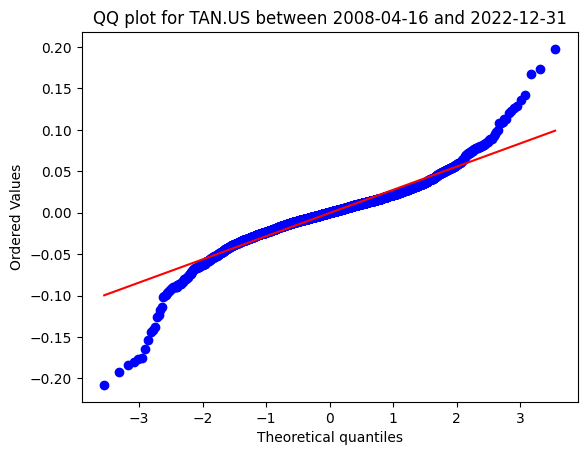

In [669]:
for stock in ETF_list:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制QQ图
    stats.probplot(sep_data, dist='norm', plot=plt)
    plt.title('QQ plot for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* Have a look at recent 2 years

* Plot all the stocks into one graph

price of LIT.US starts from 2010-07-26
price of QCLN.US starts from 2007-02-15
price of ICLN.US starts from 2008-06-26


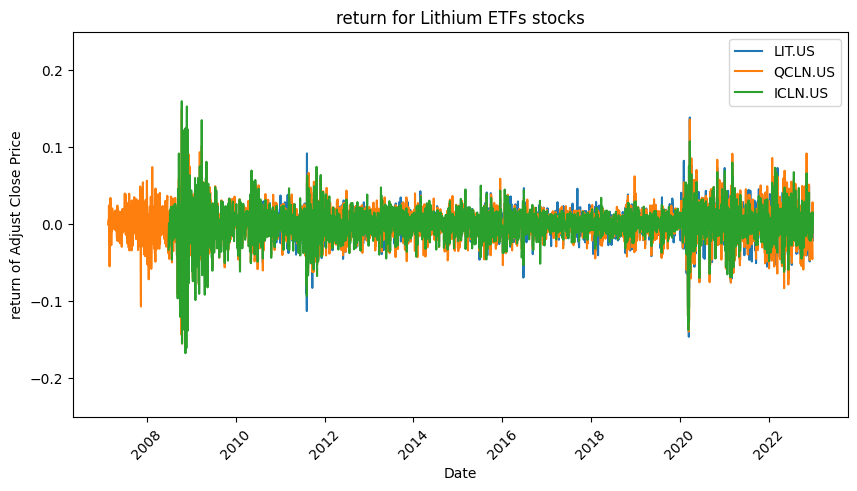

In [679]:
plt.figure(figsize=(10, 5))
for stock in [s for s in ETF_list if s not in ['394670.KO', 'LIT.V','TAN.US','PBW.US']]:
    sep_data = df_ETF['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('return for Lithium ETFs stocks')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(-0.25, 0.25)  # 设置纵坐标范围为-1到1
plt.show()

In [727]:
df_ETF.to_csv('./Data/ETFs.csv', index = True)

## Lithium Battery related stocks

In [765]:
Lithium_Battery_list = ['PCRFY.US','051910.KO','006400.KO','1211.HK','300014.SHE','BATT.US']

In [766]:
api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

for stock in Lithium_Battery_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_Libat = all_dates_df
for stock, df in dataframes.items():
    df_Libat = df_Libat.merge(df, on='Date', how='left')

In [767]:
df_Libat.set_index('Date', inplace=True)
for col in df_Libat.columns:
    df_Libat[col] = pd.to_numeric(df_Libat[col], errors='coerce')

price of PCRFY.US starts from 2005-01-03
       Adjusted_close_PCRFY.US
count              4501.000000
mean                 10.108110
std                   2.604138
min                   3.560800
25%                   8.427300
50%                   9.726100
75%                  11.972800
max                  16.961000


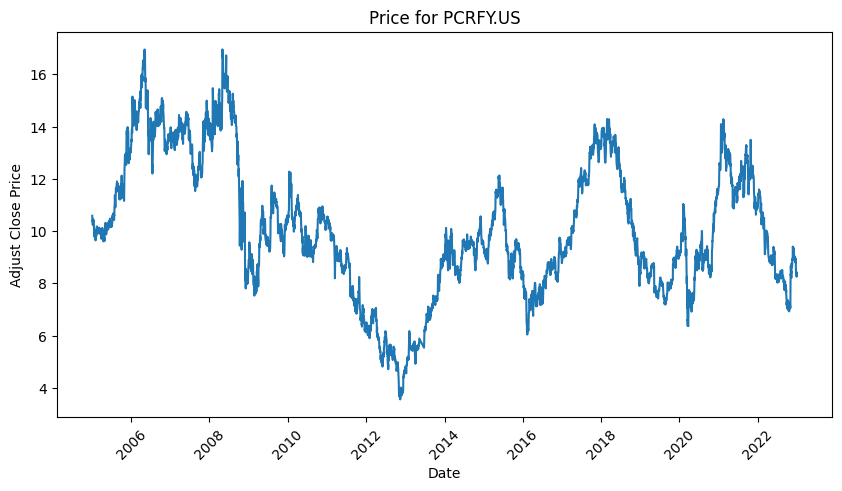

price of 051910.KO starts from 2005-01-03
       Adjusted_close_051910.KO
count               4473.000000
mean              286226.770740
std               208881.569535
min                24295.716700
25%               118240.758900
50%               265504.894200
75%               352500.000000
max               999999.999900


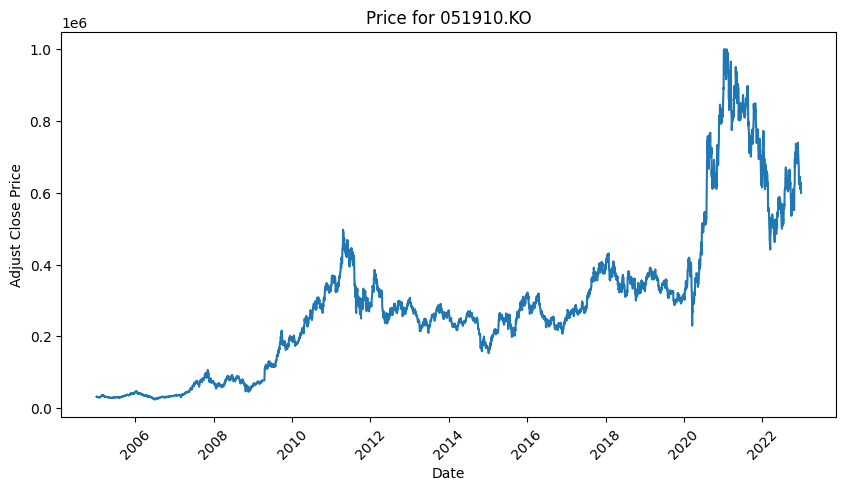

price of 006400.KO starts from 2005-01-03
       Adjusted_close_006400.KO
count               4451.000000
mean              199603.957519
std               180018.174698
min                47711.145400
25%                93849.823150
50%               134935.292800
75%               211693.987000
max               814398.505500


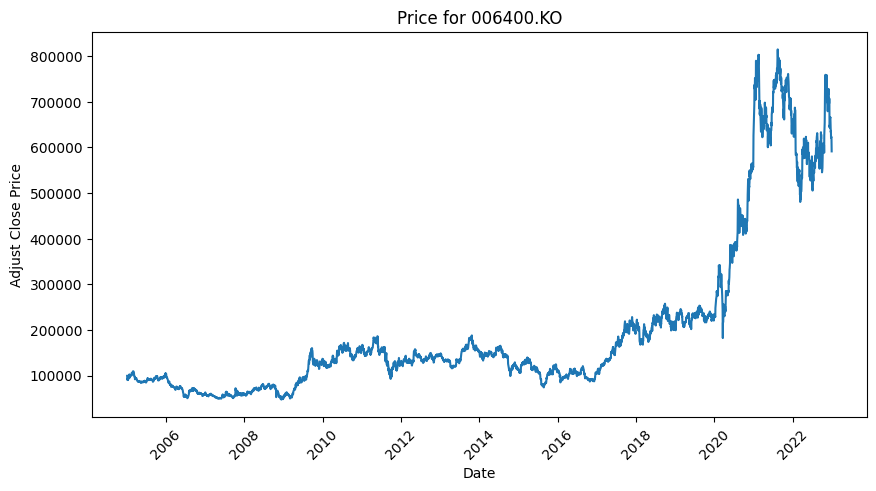

price of 1211.HK starts from 2005-01-03
       Adjusted_close_1211.HK
count             4446.000000
mean                57.508588
std                 69.625010
min                  1.863700
25%                 14.749475
50%                 40.591850
75%                 52.911800
max                331.400000


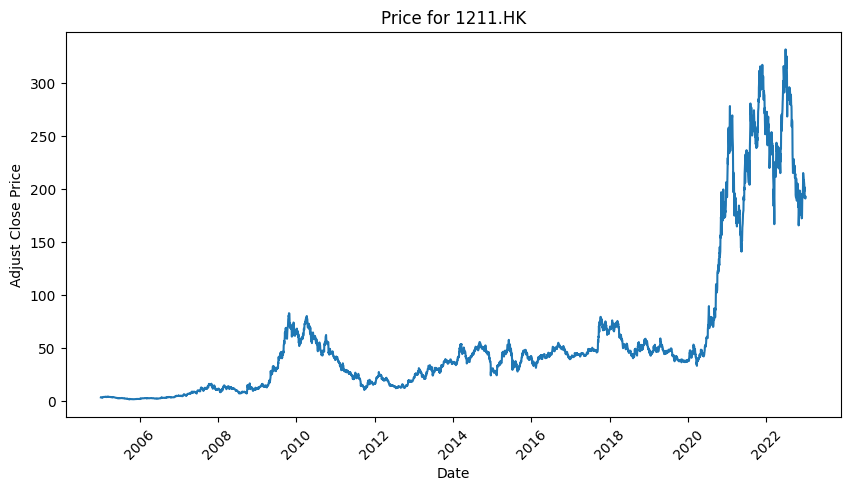

price of 300014.SHE starts from 2009-10-30
       Adjusted_close_300014.SHE
count                3142.000000
mean                   23.302399
std                    34.245305
min                     1.140300
25%                     2.462725
50%                     7.685950
75%                    18.980425
max                   148.521200


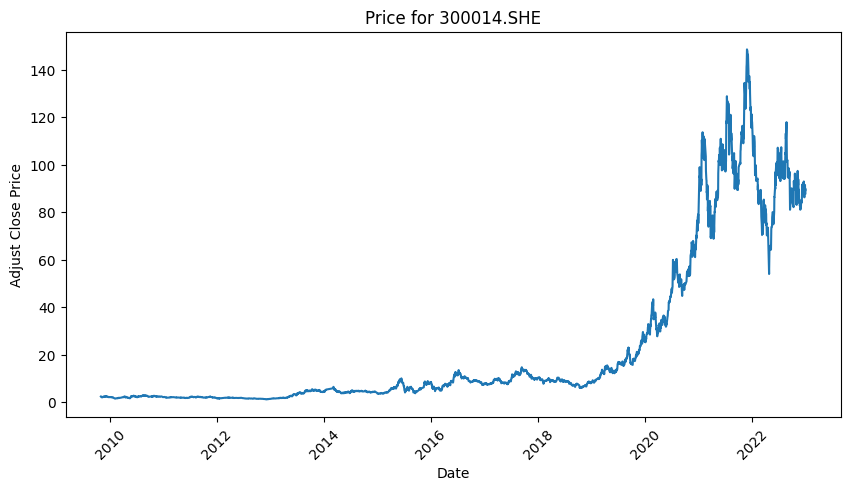

price of BATT.US starts from 2018-06-06
       Adjusted_close_BATT.US
count             1152.000000
mean                12.781480
std                  3.033003
min                  5.598400
25%                 10.159425
50%                 12.693850
75%                 15.376075
max                 19.290000


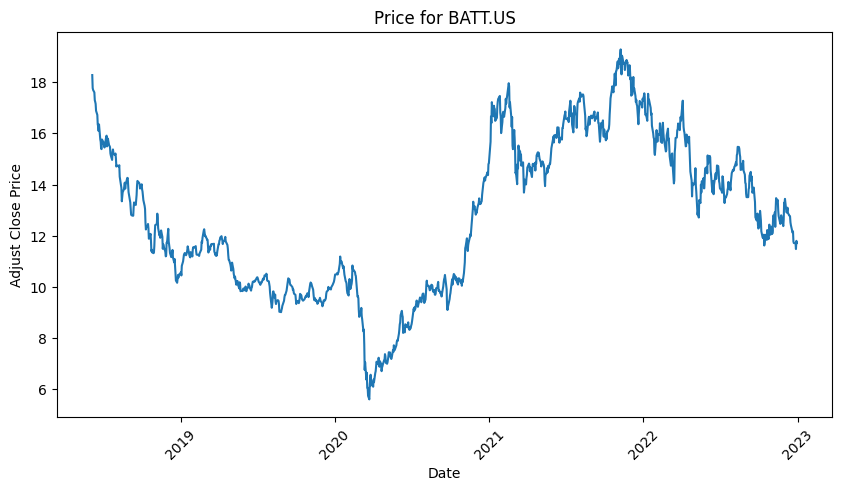

In [768]:
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('Adjust Close Price')
    plt.title('Price for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

In [769]:
for col in df_Libat.columns:
    df_Libat[col] = np.log(df_Libat[col]) - np.log(df_Libat[col].shift(1))

/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


price of PCRFY.US starts from 2005-01-04
       Adjusted_close_PCRFY.US
count              4353.000000
mean                  0.000052
std                   0.019367
min                  -0.125309
25%                  -0.010141
50%                  -0.000469
75%                   0.010619
max                   0.173915


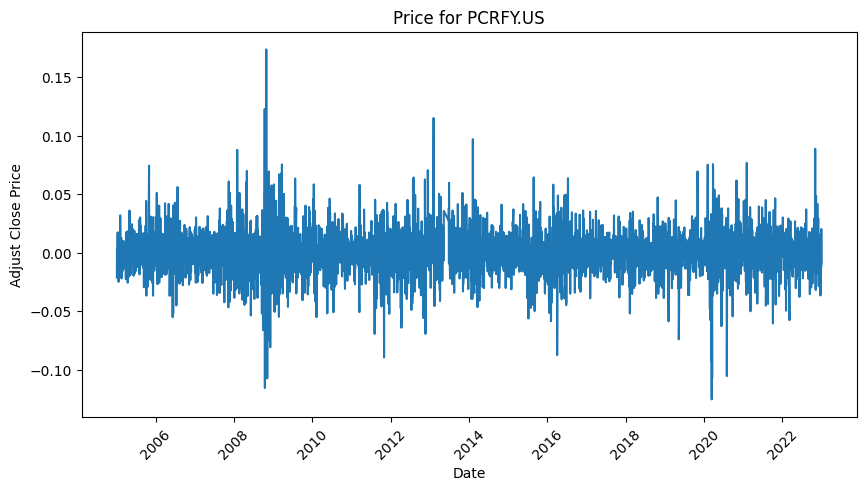

price of 051910.KO starts from 2005-01-04
       Adjusted_close_051910.KO
count               4315.000000
mean                   0.000688
std                    0.026192
min                   -0.196710
25%                   -0.012637
50%                    0.000000
75%                    0.013296
max                    0.348307


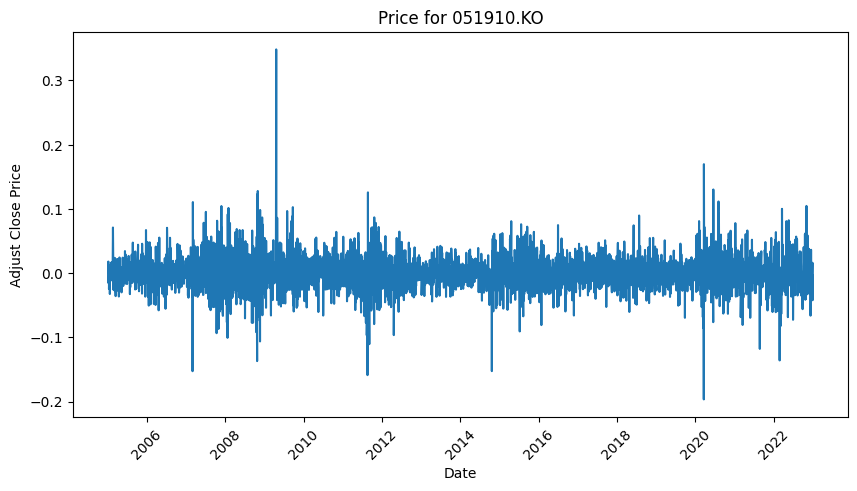

price of 006400.KO starts from 2005-01-04
       Adjusted_close_006400.KO
count               4273.000000
mean                   0.000347
std                    0.024470
min                   -0.190936
25%                   -0.012522
50%                    0.000000
75%                    0.012658
max                    0.168104


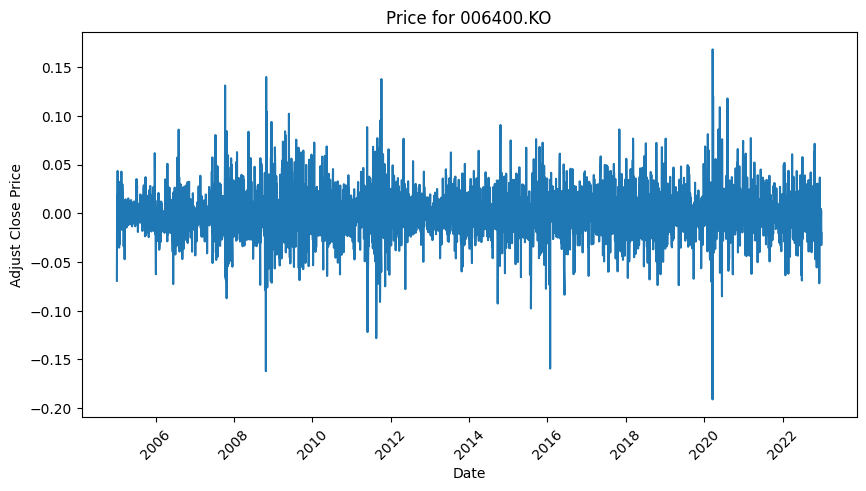

price of 1211.HK starts from 2005-01-04
       Adjusted_close_1211.HK
count             4271.000000
mean                 0.000763
std                  0.034515
min                 -0.340174
25%                 -0.017053
50%                  0.000000
75%                  0.016548
max                  0.348298


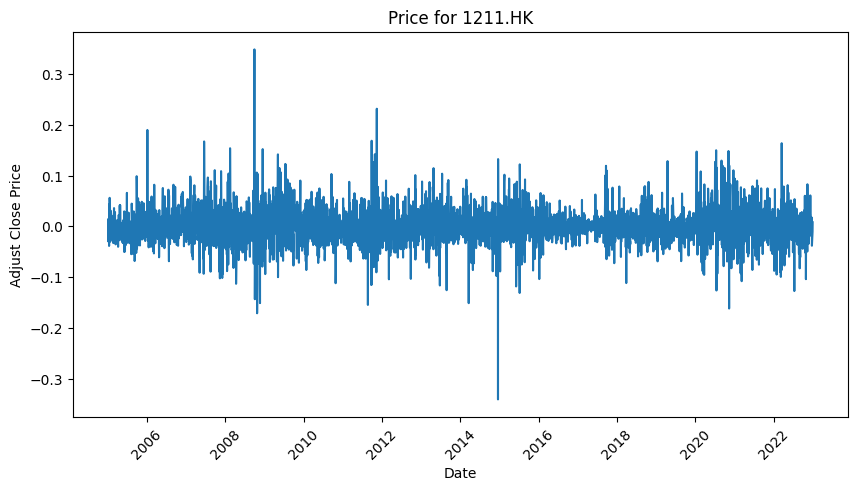

price of 300014.SHE starts from 2009-11-02
       Adjusted_close_300014.SHE
count                3045.000000
mean                    0.001159
std                     0.035727
min                    -0.172628
25%                    -0.018354
50%                     0.000704
75%                     0.019845
max                     0.147368


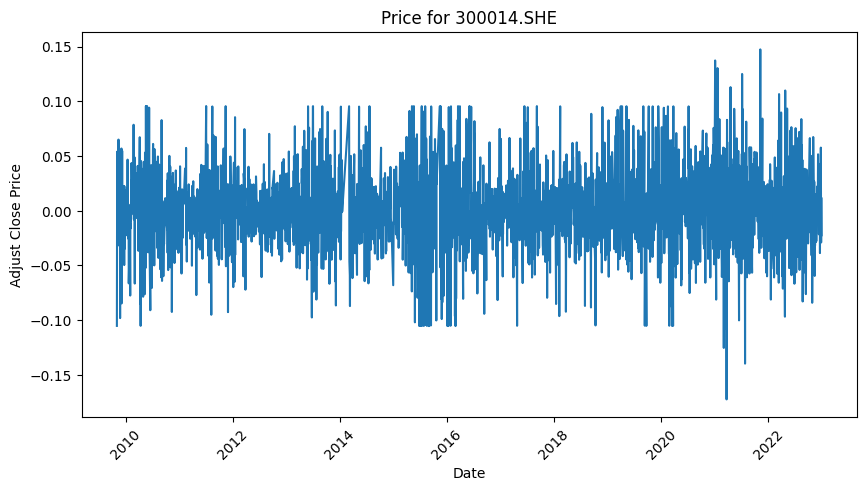

price of BATT.US starts from 2018-06-07
       Adjusted_close_BATT.US
count             1113.000000
mean                -0.000373
std                  0.020547
min                 -0.135760
25%                 -0.011629
50%                  0.000000
75%                  0.011578
max                  0.098659


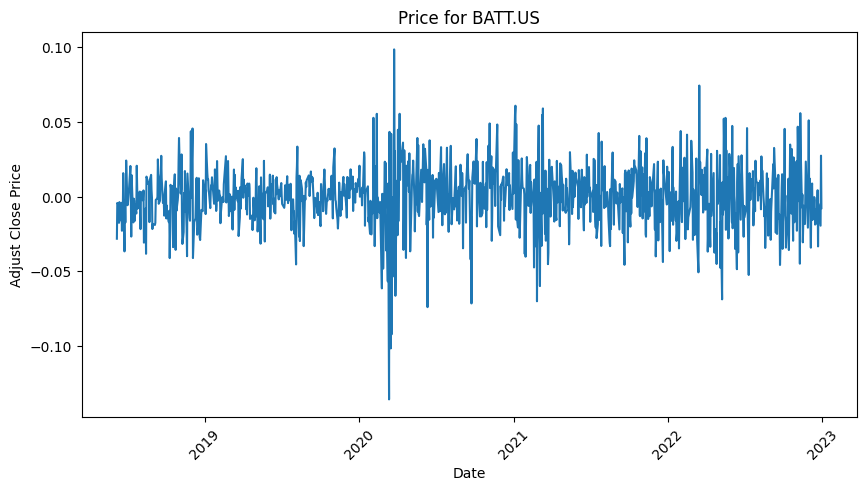

In [770]:
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    stats = pd.DataFrame(sep_data.describe())
    print(stats)
    # 将 'date' 列设置为索引
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.figure(figsize=(10, 5))
    plt.plot(sep_data.index, sep_data)
    plt.xlabel('Date')
    plt.ylabel('Adjust Close Price')
    plt.title('Price for ' + stock)
    plt.xticks(rotation=45)
    plt.show()

In [589]:
df_Libat.to_csv('Lithium Battery Company stock prices.csv', index=False)

* Histogram

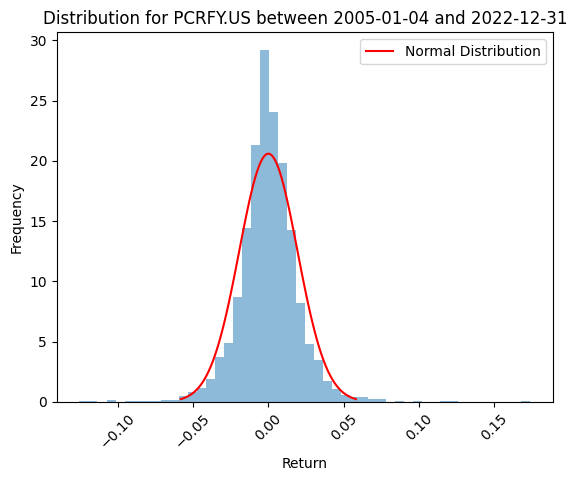

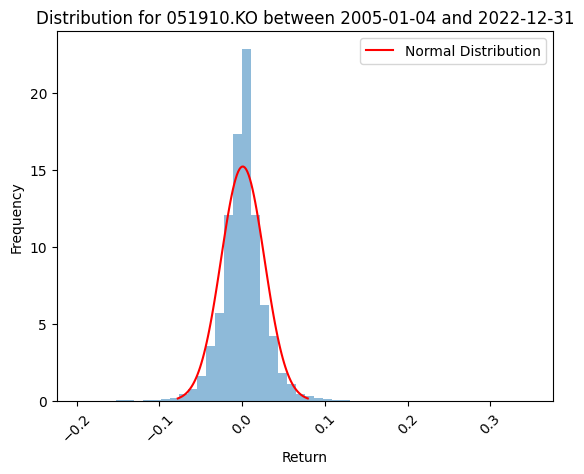

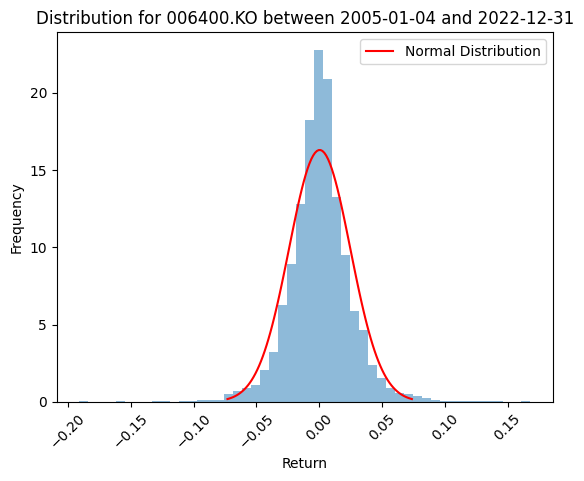

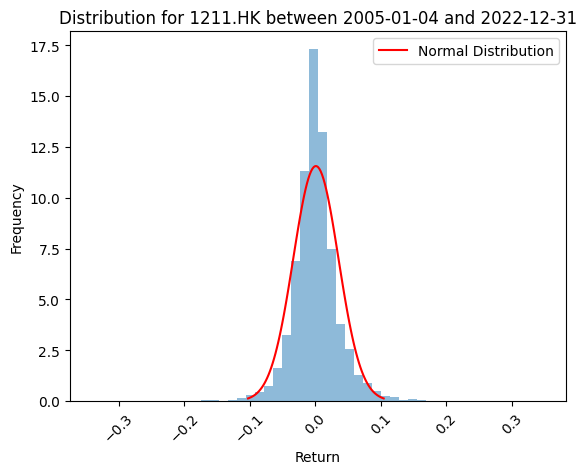

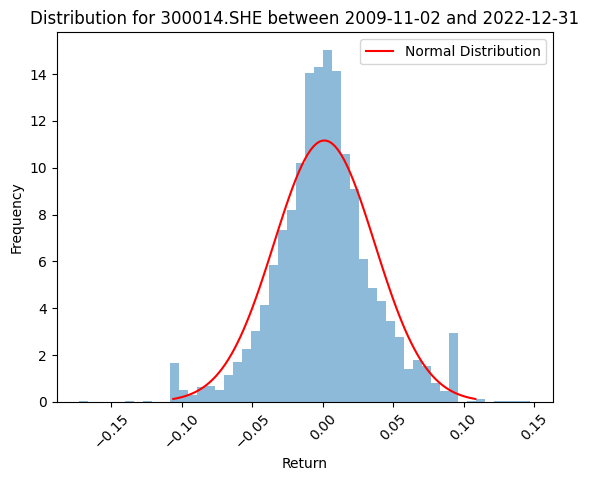

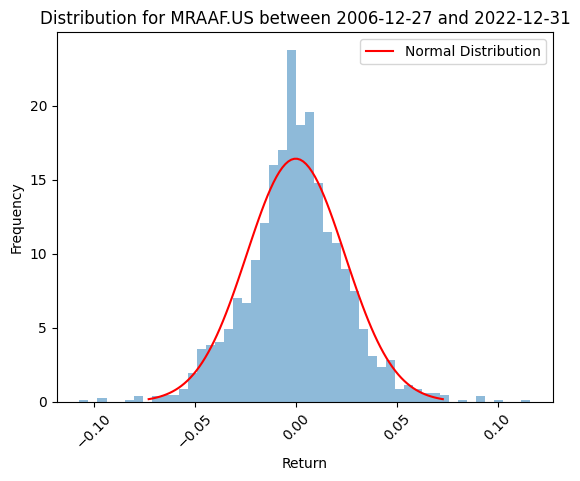

In [688]:
import scipy.stats as stats

for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制直方图
    plt.hist(sep_data, bins=50, density=True, alpha=0.5)
    
    # 生成正态分布的概率密度函数
    mu, sigma = sep_data.mean(), sep_data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    
    # 绘制正态分布曲线
    plt.plot(x, y, 'r-', label='Normal Distribution')
    
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.title('Distribution for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


* Box plot

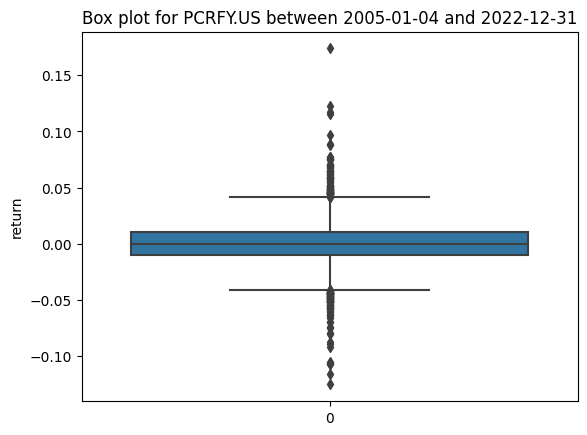

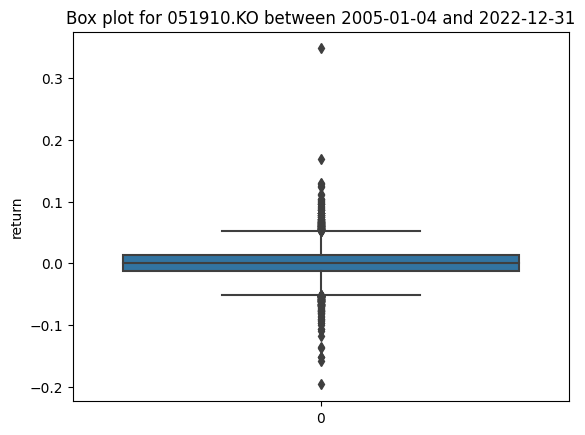

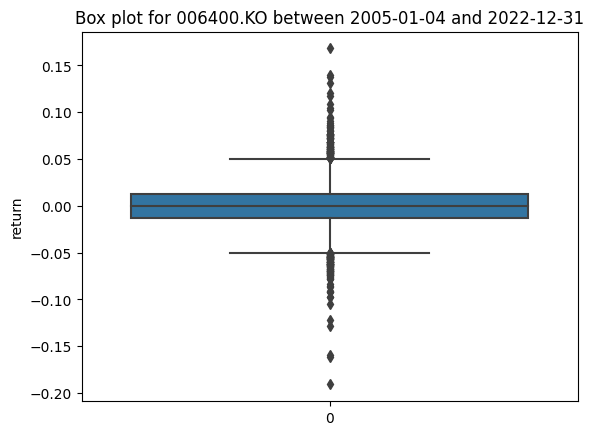

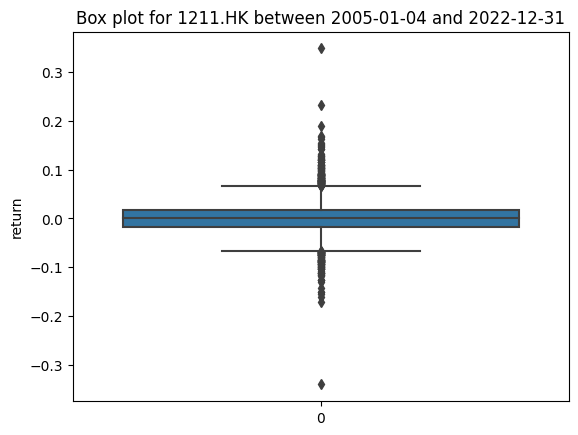

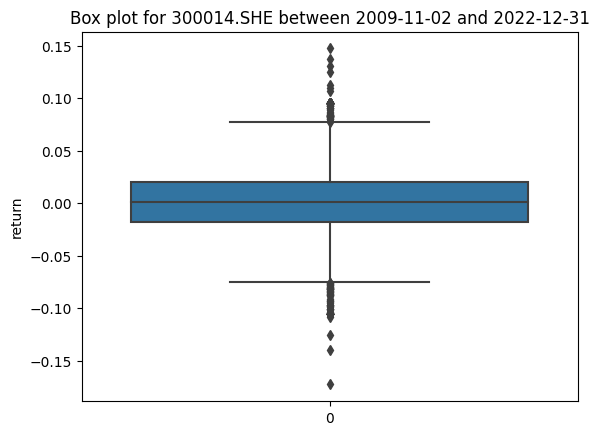

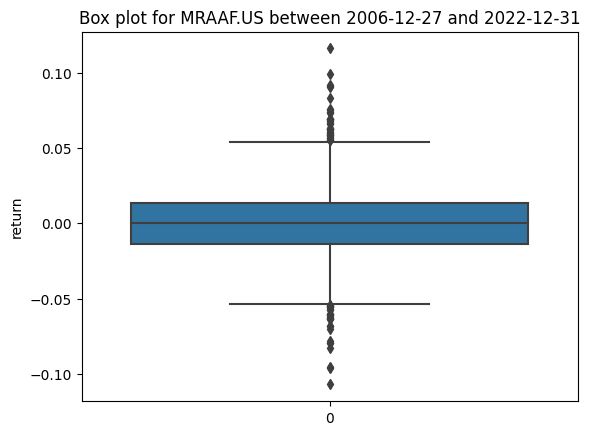

In [689]:
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    # 绘制箱线图
    sns.boxplot(sep_data)
    plt.ylabel('return')
    plt.title('Box plot for '+ stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* QQ plot 

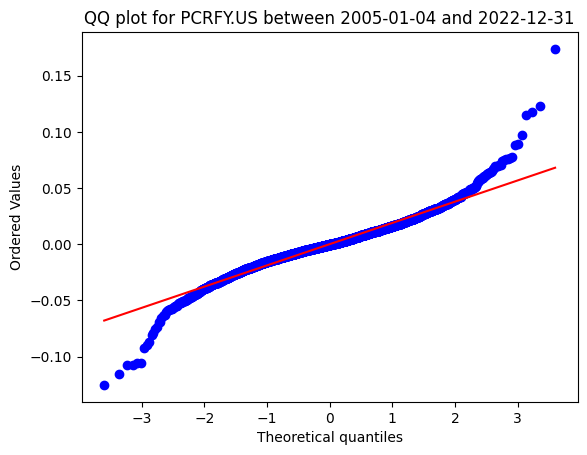

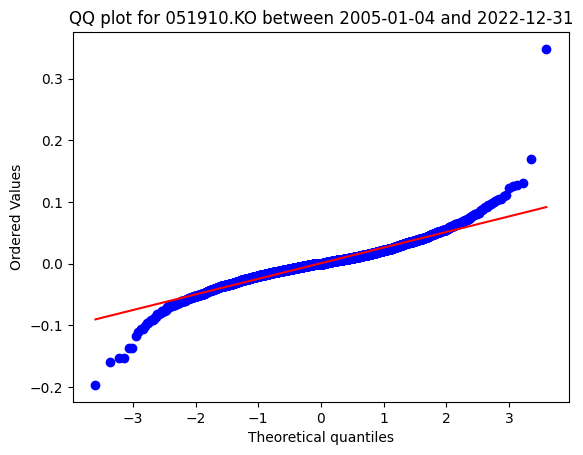

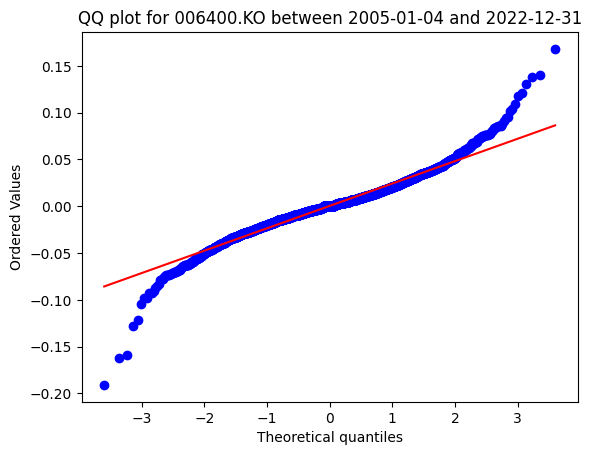

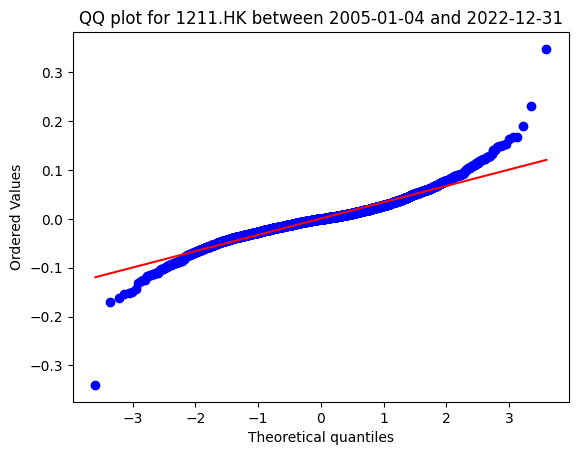

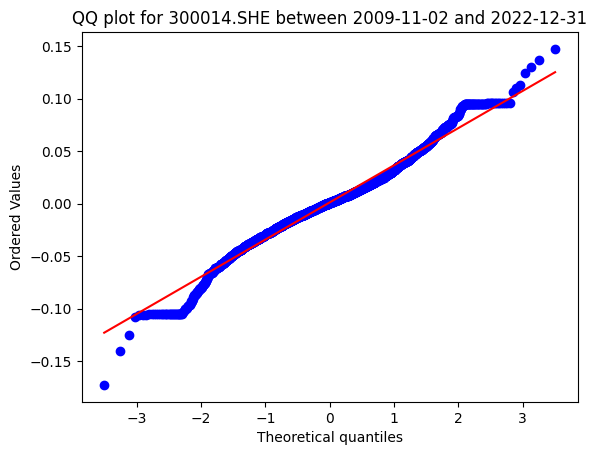

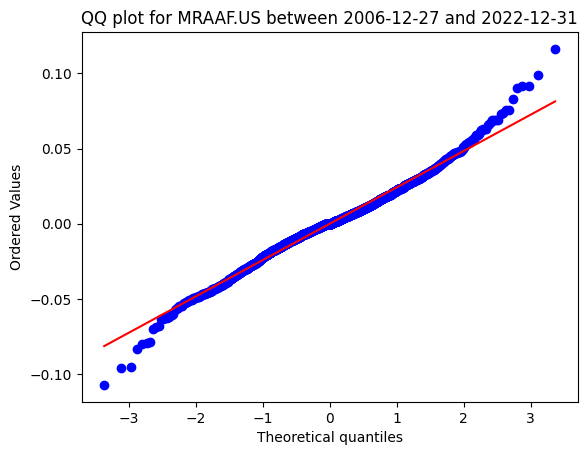

In [690]:
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data = sep_data.dropna()
    date = sep_data.index[0]
    sep_data.index = pd.to_datetime(sep_data.index)
    
    # 绘制QQ图
    stats.probplot(sep_data, dist='norm', plot=plt)
    plt.title('QQ plot for ' + stock + ' between ' + date + ' and 2022-12-31')
    plt.show()

* Have a look at the recent 2 years 

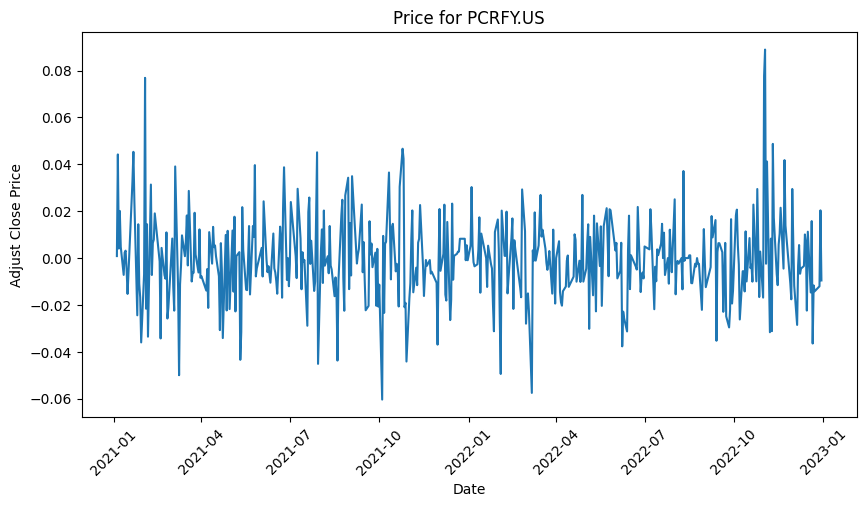

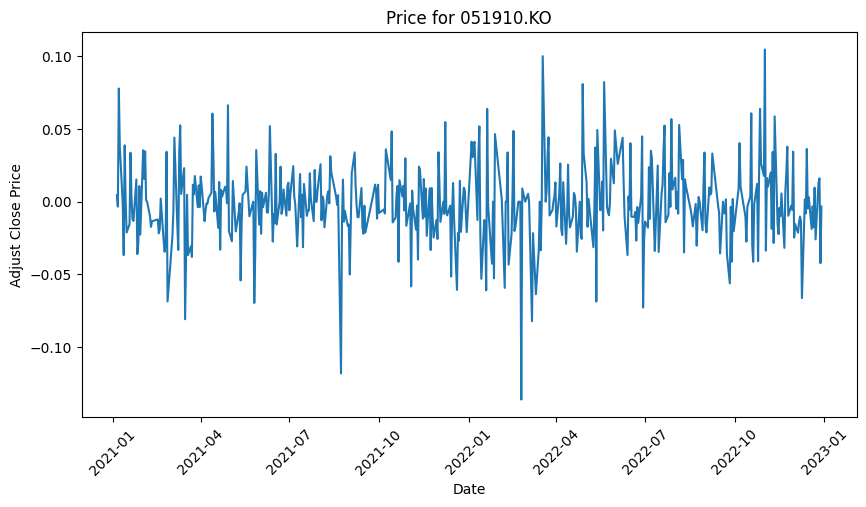

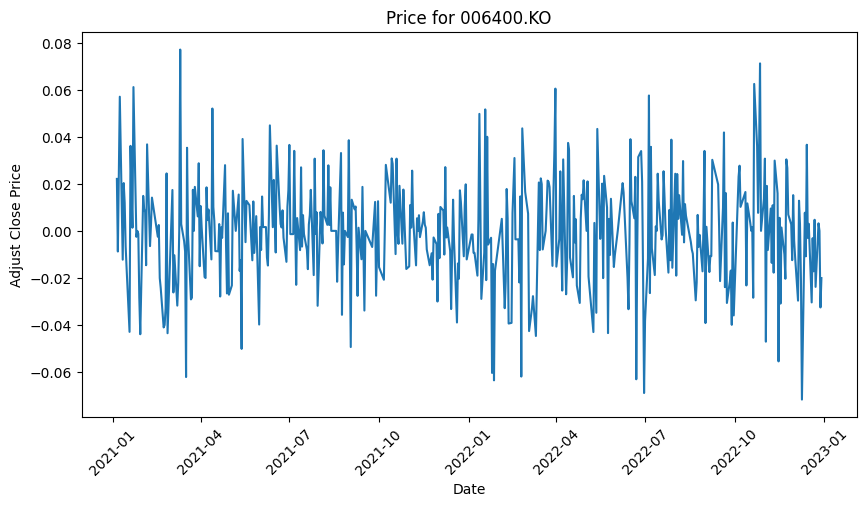

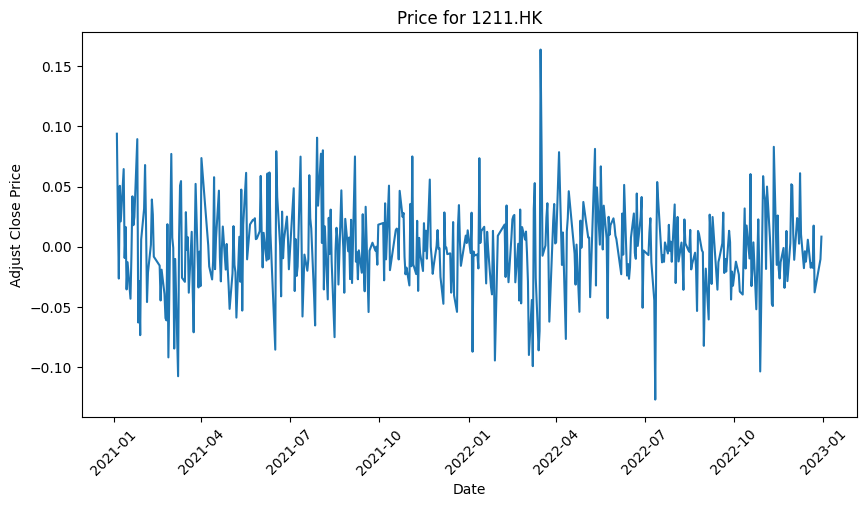

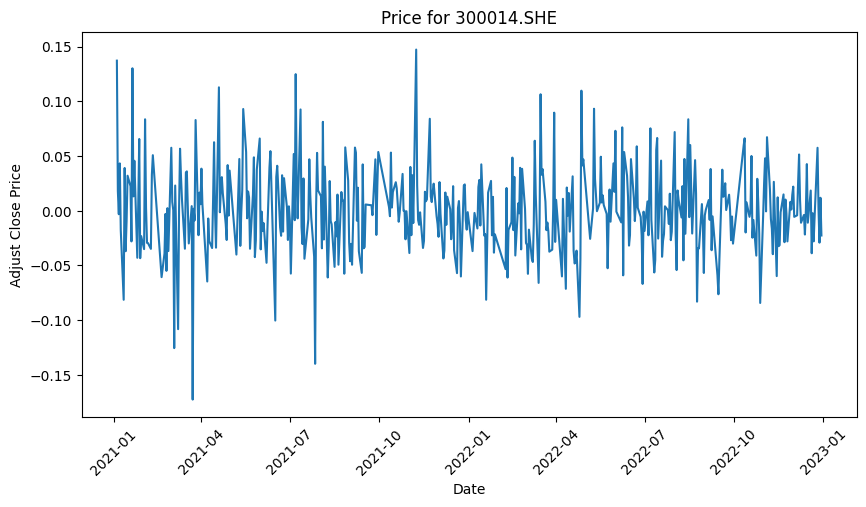

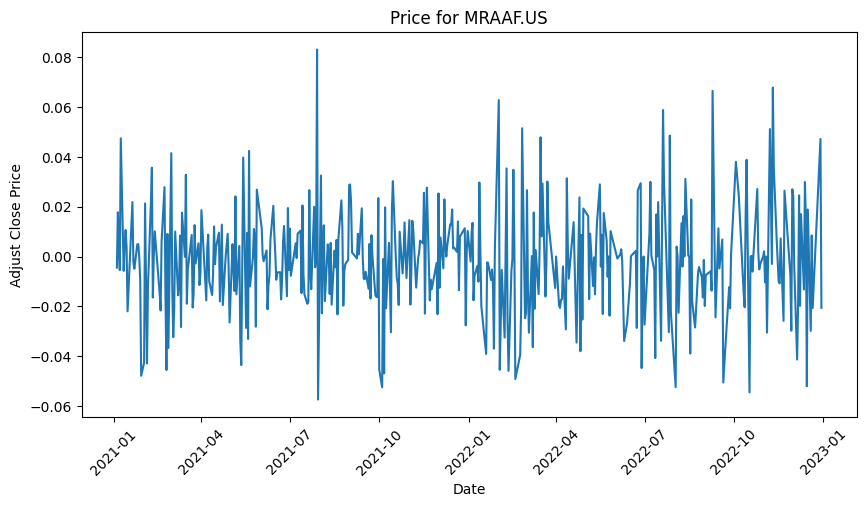

In [691]:
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    date1 = datetime(2021, 1, 1)
    date =  datetime.strptime(date, '%Y-%m-%d')
    sep_data.index = pd.to_datetime(sep_data.index)
    if date1 >= date:
        sep_data = sep_data.loc['2021-01-01':]
        plt.figure(figsize=(10, 5))
        plt.plot(sep_data.index, sep_data)
        plt.xlabel('Date')
        plt.ylabel('Adjust Close Price')
        plt.title('Price for ' + stock)
        plt.xticks(rotation=45)
        plt.show()
    else: print('Not enough data for ' + stock) 

* Plot all the stocks into one graph

price of PCRFY.US starts from 2005-01-04
price of 051910.KO starts from 2005-01-04
price of 006400.KO starts from 2005-01-04
price of 1211.HK starts from 2005-01-04
price of 300014.SHE starts from 2009-11-02
price of MRAAF.US starts from 2006-12-27


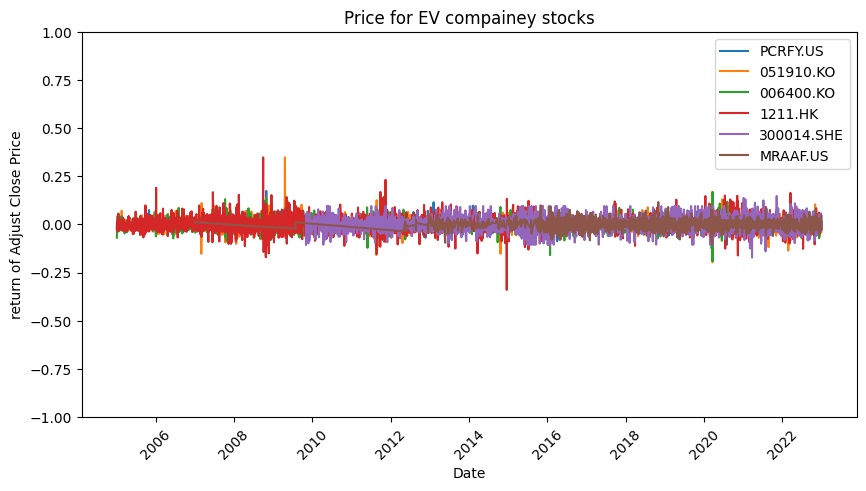

In [698]:
plt.figure(figsize=(10, 5))
for stock in Lithium_Battery_list:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('Price for EV compainey stocks')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(-1, 1)  # 设置纵坐标范围为-1到1
plt.show()

price of PCRFY.US starts from 2005-01-04
price of 1211.HK starts from 2005-01-04
price of 300014.SHE starts from 2009-11-02
price of MRAAF.US starts from 2006-12-27


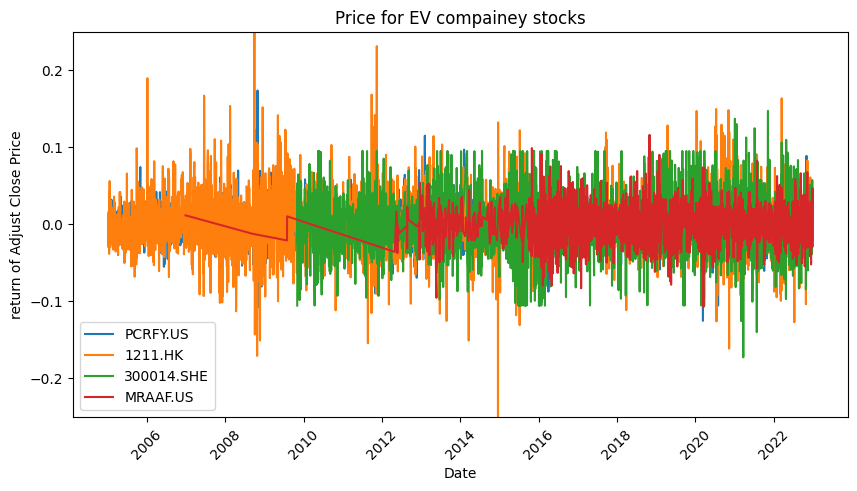

In [700]:
plt.figure(figsize=(10, 5))
for stock in [s for s in Lithium_Battery_list if s not in ["051910.KO","006400.KO"]]:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('Price for EV compainey stocks')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(-0.25, 0.25)  # 设置纵坐标范围为-1到1
plt.show()

price of 051910.KO starts from 2005-01-04
price of 006400.KO starts from 2005-01-04


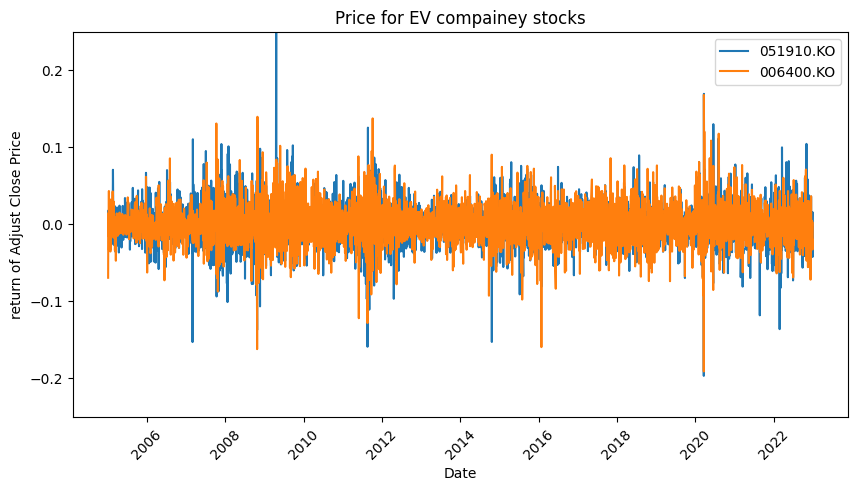

In [701]:
plt.figure(figsize=(10, 5))
for stock in [s for s in Lithium_Battery_list if s in ["051910.KO","006400.KO"]]:
    sep_data = df_Libat['Adjusted_close'+'_'+stock]
    sep_data =  sep_data.dropna()
    date = sep_data.index[0]
    print ('price of ' + stock + ' starts from '+date)
    sep_data.index= pd.to_datetime(sep_data.index)
    # 绘制时间序列图
    plt.plot(sep_data.index, sep_data, label=stock)

plt.xlabel('Date')
plt.ylabel('return of Adjust Close Price')
plt.title('Price for EV compainey stocks')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(-0.25, 0.25)  # 设置纵坐标范围为-1到1
plt.show()

In [740]:
df_Libat.to_csv('./Data/Lithium Battery companies.csv', index= True)

## Lithium index (from investing.com)

*  (Solactive Global Lithium (SOLLIT)

In [36]:
df_Liidx = pd.read_csv('./Data/(Index) Solactive Global Lithium Historical Data.csv')

In [37]:
df_Liidx.set_index('Date', inplace = True)
df_Liidx.index = pd.to_datetime(df_Liidx.index)

In [38]:
# 循环遍历DataFrame的列并转换为数值类型
for col in df_Liidx.columns:
    df_Liidx[col] = pd.to_numeric(df_Liidx[col], errors='coerce')
df_Liidx = df_Liidx[::-1]

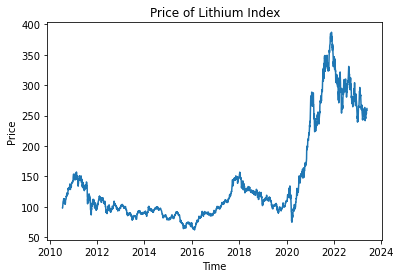

In [39]:
plt.plot(df_Liidx.index, df_Liidx['Open'])

#plt.ylim(-0.025, 0.025)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price of Lithium Index')
plt.show()

In [40]:
df_Liidx.to_csv('Lithium Index price.csv', index = True)

In [715]:
for col in df_Liidx.columns:
    df_Liidx[col] = np.log(df_Liidx[col]) - np.log(df_Liidx[col].shift(1))

In [716]:
pd.DataFrame(df_Liidx['Open'].describe())

Open
count  3338.000000
mean      0.000293
std       0.014890
min      -0.092870
25%      -0.007087
50%       0.000724
75%       0.008636
max       0.104902

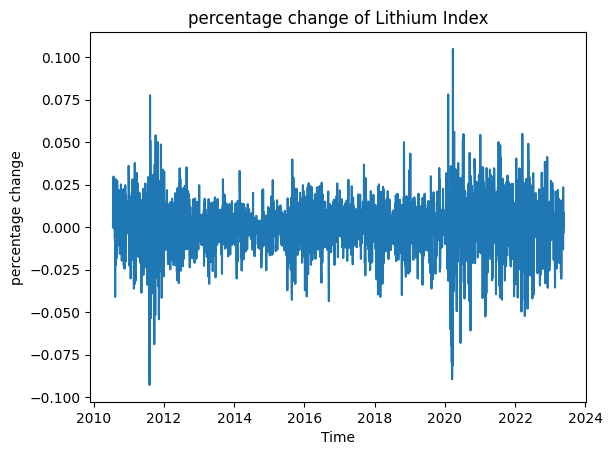

In [717]:
plt.plot(df_Liidx.index, df_Liidx['Open'])

#plt.ylim(-0.025, 0.025)
plt.xlabel('Time')
plt.ylabel('percentage change')
plt.title('percentage change of Lithium Index')
plt.show()

In [718]:
sep_data = df_LITHUSD['Adj Close']
sep_data =  sep_data.dropna()
plt.figure(figsize=(10, 5))
autocorrelation_plot(sep_data)
plt.title('Autocorrelation plot of LITH_USD')
plt.show()

Price      Open      High       Low  Vol.  Change %
Date                                                              
2010-07-19       NaN       NaN       NaN       NaN   NaN       NaN
2010-07-20  0.011936  0.001018  0.007165 -0.000616   NaN       NaN
2010-07-21  0.003213  0.014538  0.013979  0.021248   NaN       NaN
2010-07-22  0.018078 -0.000401  0.012416  0.002712   NaN       NaN
2010-07-23  0.032158  0.021722  0.027338  0.019964   NaN       NaN
...              ...       ...       ...       ...   ...       ...
2023-05-17  0.003015 -0.003827 -0.001578 -0.002680   NaN       NaN
2023-05-18  0.001273  0.004097  0.005646  0.005122   NaN       NaN
2023-05-19 -0.001273  0.001233 -0.000536  0.001199   NaN       NaN
2023-05-22  0.008569 -0.000964  0.003672 -0.001973   NaN       NaN
2023-05-23 -0.002145  0.008294  0.001907  0.004213   NaN       NaN

[3339 rows x 6 columns]

In [731]:
df_Liidx.to_csv('./Data/Lithium index.csv', index = True)

In [609]:
df_LitCarb.loc[:, ['Price', 'Open', 'High', 'Low']] = df_LitCarb.loc[:, ['Price', 'Open', 'High', 'Low']].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df_LitCarb['Open'] = pd.to_numeric(df_LitCarb['Open'])
stats = pd.DataFrame(df_LitCarb['Open'].describe())
print(stats)
# 将 'date' 列设置为索引
df_LitCarb['Date'] = pd.to_datetime(df_LitCarb['Date'])
df_LitCarb.set_index('Date', inplace=True)

                Open
count    1358.000000
mean   153483.652430
std    152424.937316
min         0.000000
25%     56625.000000
50%     82000.000000
75%    152000.000000
max    581500.000000


In [610]:
# 绘制时间序列图
for col in df_Liidx.columns:
    df_LitCarb[col] = pd.to_numeric(df_LitCarb[col], errors='coerce')
df_LitCarb = df_LitCarb.pct_change()

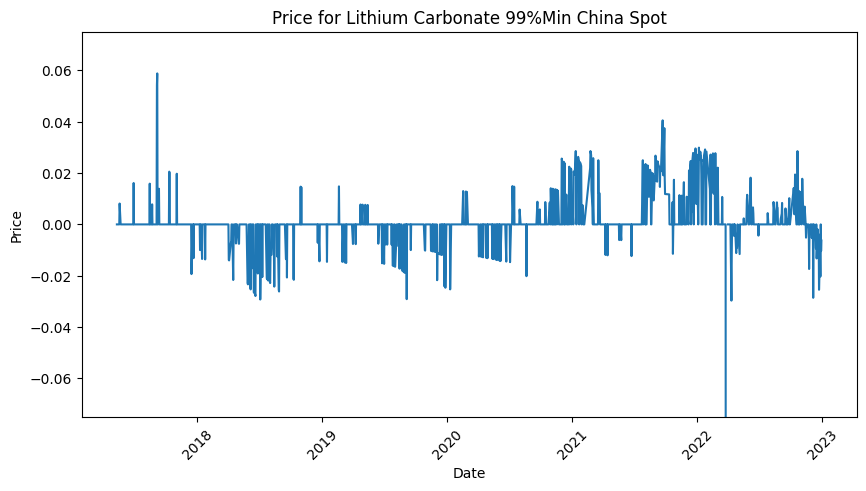

In [615]:
plt.figure(figsize=(10, 5))
plt.plot(df_LitCarb.index, df_LitCarb['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price for Lithium Carbonate 99%Min China Spot')
plt.xticks(rotation=45)
plt.ylim(-0.075, 0.075)
plt.show()

### Try to use Interactive Brokers to get lithium futures price (ignore this part)

In [74]:
util.startLoop()  # uncomment this line when in a notebook
ib = IB()
ib.connect('127.0.0.1',7496,clientId=12)

In [56]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time

In [57]:
class TradeApp(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)

    def historicalData(self, reqId, bar):
        print("reqID:{}, date:{}, open:{}, high:{}, low:{}, close:{}, volume:{}".format(
            reqId, bar.date, bar.open, bar.high, bar.low, bar.close, bar.volume))

def websocket_con(app):
    app.run()

In [58]:
app = TradeApp()
app.connect("127.0.0.1", 7496, clientId=12)

In [59]:
con_thread = threading.Thread(target=websocket_con, daemon=True)
con_thread.start()
time.sleep(1)  # 确保连接完成

contract = Contract()
contract.symbol = "INFY"
contract.secType = "FUT"
contract.currency = "INR"
contract.exchange = "NSE"
contract.lastTradeDateOrContractMonth = "20220127"

app.reqHistoricalData(reqId=0,
                      contract=contract,
                      endDateTime='',
                      durationStr='100 D',
                      barSizeSetting= '30 mins',
                      whatToShow='ADJUSTED_LAST',
                      useRTH=1,
                      formatDate=1,
                      keepUpToDate=0,
                      chartOptions=[])

Exception in thread Thread-21:
Traceback (most recent call last):
  File "/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/yangli/opt/anaconda3/envs/tensorflow/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
TypeError: websocket_con() missing 1 required positional argument: 'app'
ERROR 0 504 Not connected


In [61]:
class TradeApp(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)

    def historicalData(self, reqId, bar):
        print("reqID:{}, date:{}, open:{}, high:{}, low:{}, close:{}, volume:{}".format(
            reqId, bar.date, bar.open, bar.high, bar.low, bar.close, bar.volume))

In [62]:
def websocket_con(app):
    app.run()

In [63]:
app = TradeApp()  # 创建 TradeApp 对象
app.connect("127.0.0.1", 7496, clientId=12)  # 连接到 IB Gateway

In [64]:
con_thread = Thread(target=websocket_con, args=(app,), daemon=True)  # 创建新线程，传入 app 参数
con_thread.start()  # 开始新线程
time.sleep(1)  # 等待连接完成

In [65]:
contract = Contract()  # 创建 Contract 对象
contract.symbol = "INFY"
contract.secType = "FUT"
contract.currency = "INR"
contract.exchange = "NSE"
contract.lastTradeDateOrContractMonth = "20220127"

In [66]:
app.reqHistoricalData(0, contract, "", "100 D", "30 mins", "ADJUSTED_LAST", 1, 1, False, [])

ERROR 0 504 Not connected


In [ ]:
time.sleep(10)  # 等待数据获取完成
app.disconnect()  # 断开连接

## Exchange rate

* Given the global nature of the lithium market, exchange rate fluctuations may affect production costs, import and export prices, and market supply and demand.

* Use API or download from the website 

In [ ]:
import requests
import pandas as pd
from datetime import date

api_key = "42d1f1088c9249f6ab723599cf8aaa16"
base_url = "https://openexchangerates.org/api"

start_date = pd.Timestamp(2022, 1, 1)
end_date = pd.Timestamp(date.today())

# 修改此行，将 freq 参数从 "M" 更改为 "D"
date_list = pd.date_range(start_date, end_date, freq="D")
date_list = date_list.union([start_date - pd.offsets.MonthBegin(1), end_date]).sort_values()

exchange_rates = []

for d in date_list:
    current_date = d.strftime("%Y-%m-%d")
    url = f"{base_url}/historical/{current_date}.json?app_id={api_key}&symbols=USD,CNY&base=USD"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if 'rates' in data and 'CNY' in data['rates']:
            exchange_rate = data["rates"]["CNY"]
            exchange_rates.append({"Date": current_date, "USD_to_CNY": exchange_rate})
        else:
            print(f"Error: Data for {current_date} is not available.")
    else:
        print(f"Error: API request for {current_date} failed with status code {response.status_code}")

df = pd.DataFrame(exchange_rates)
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

print(df.head())


In [431]:
df_exrate = pd.read_csv('./DEXCHUS.csv')

In [432]:
df_exrate.set_index('DATE', inplace=True)

In [433]:
df_exrate['DEXCHUS'] = df_exrate['DEXCHUS'].replace('.', np.nan)
df_exrate['DEXCHUS'] = df_exrate['DEXCHUS'].astype(float)

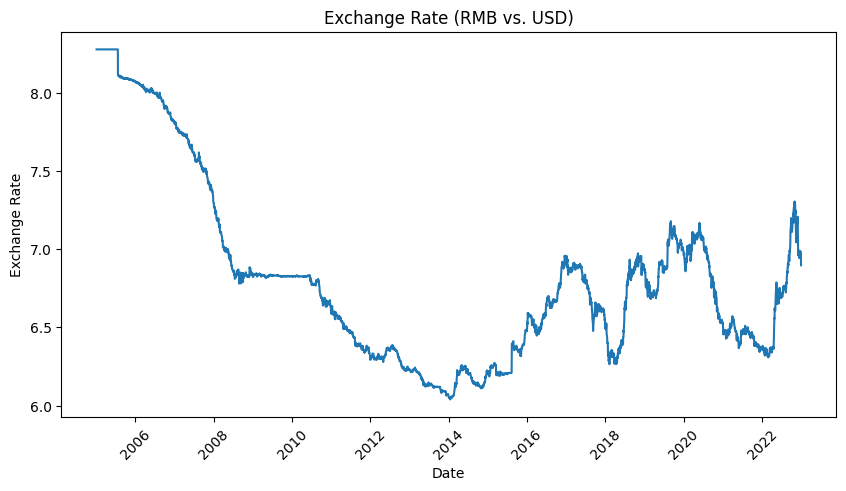

In [434]:
sep_data = df_exrate
sep_data =  sep_data.dropna()
# 将 'date' 列设置为索引
sep_data.index = pd.to_datetime(sep_data.index)
plt.figure(figsize=(10, 5))
plt.plot(sep_data.index, sep_data)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate (RMB vs. USD)')
plt.xticks(rotation=45)
plt.show()

In [435]:
df_exrate = df_exrate.pct_change()

In [444]:
pd.DataFrame(df_exrate.describe())

DEXCHUS
count  4694.000000
mean     -0.000037
std       0.001889
min      -0.019984
25%      -0.000608
50%       0.000000
75%       0.000479
max       0.018327

In [437]:
df_exrate.to_csv('Exchange rate.csv', index = False)

* Visulization

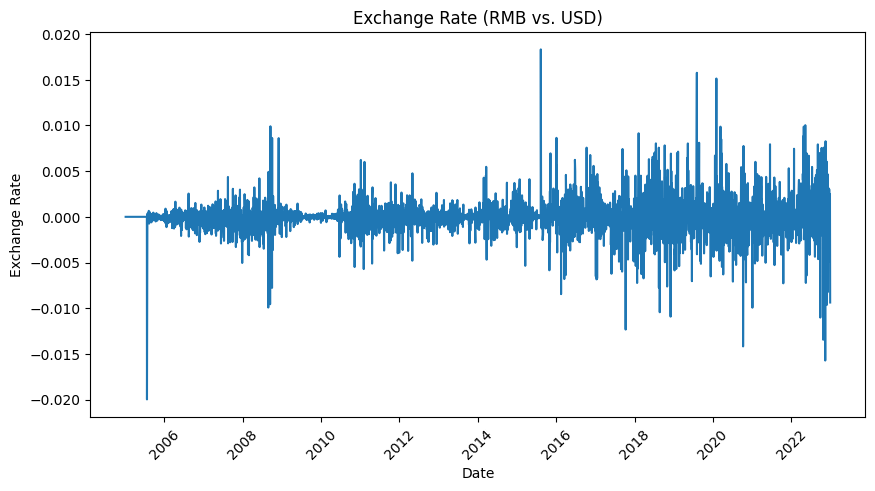

In [438]:
sep_data = df_exrate
sep_data =  sep_data.dropna()
# 将 'date' 列设置为索引
sep_data.index = pd.to_datetime(sep_data.index)
plt.figure(figsize=(10, 5))
plt.plot(sep_data.index, sep_data)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate (RMB vs. USD)')
plt.xticks(rotation=45)
plt.show()

## EV sales data (world)

* sales data is divided into BEV (Battery Electric Vehicle) and PHEV (Plug-in Hybrid Electric Vehicle)

In [519]:
df_EV = pd.read_csv('./IEA-EV-dataEV salesCarsHistorical.csv')

* BEV (Battery Electric Vehicle)

In [520]:
grouped_powertrain_year = df_EV.groupby(['powertrain', 'year'])
BEV_list = []
PHEV_list = []
for (powertrain_type, year), group in grouped_powertrain_year:
    if powertrain_type == 'BEV':
        BEV_list.append(group['value'].sum())
    
    if powertrain_type == 'PHEV':
        PHEV_list.append(group['value'].sum())

In [521]:
df_BEV = pd.DataFrame()
df_BEV['Year'] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_BEV['Number'] = BEV_list

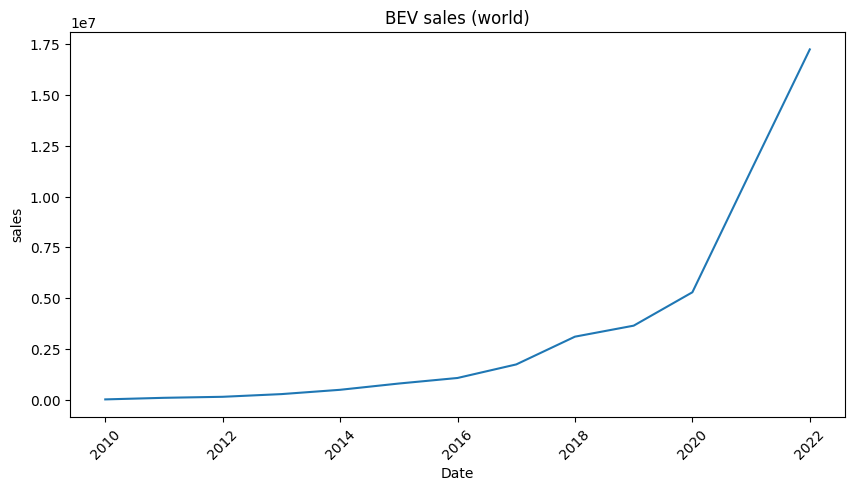

In [522]:
plt.figure(figsize=(10, 5))
plt.plot(df_BEV['Year'], df_BEV['Number'])
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('BEV sales (world)')
plt.xticks(rotation=45)
plt.show()

In [518]:
df_BEV

Year    Number
0   2010     17795
1   2011     95589
2   2012    145915
3   2013    278215
4   2014    490227
5   2015    798692
6   2016   1071902
7   2017   1739120
8   2018   3105250
9   2019   3646510
10  2020   5289952
11  2021  11289890
12  2022  17242980

In [509]:
df_BEV = df_BEV.pct_change()

In [510]:
df_BEV['Year'] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [511]:
pd.DataFrame(df_BEV['Number'].describe())

Number
count  12.000000
mean    0.936058
std     1.111614
min     0.174305
25%     0.507535
50%     0.625845
75%     0.815820
max     4.371677

In [744]:
df_BEV.to_csv('EV sales data (Battery Electric Vehicle).csv',index = True)

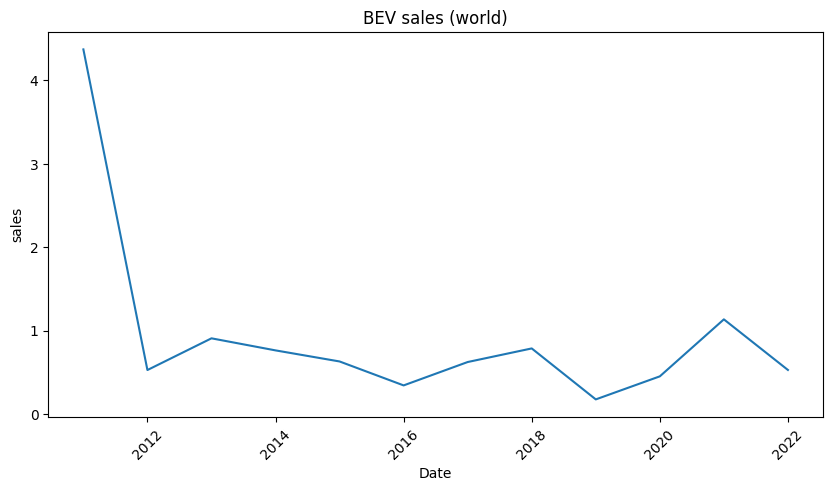

In [512]:
plt.figure(figsize=(10, 5))
plt.plot(df_BEV['Year'], df_BEV['Number'])
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('BEV sales (world)')
plt.xticks(rotation=45)
plt.show()

In [513]:
df_BEV

Year    Number
0   2010       NaN
1   2011  4.371677
2   2012  0.526483
3   2013  0.906692
4   2014  0.762044
5   2015  0.629229
6   2016  0.342072
7   2017  0.622462
8   2018  0.785529
9   2019  0.174305
10  2020  0.450689
11  2021  1.134214
12  2022  0.527294

* PHEV (Plug-in Hybrid Electric Vehicle)

In [523]:
df_PHEV = pd.DataFrame()
df_PHEV['Year'] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_PHEV['Number'] = PHEV_list

In [525]:
df_PHEV

Year   Number
0   2010      779
1   2011    18874
2   2012   137091
3   2013   232106
4   2014   320320
5   2015   612725
6   2016   763718
7   2017  1076099
8   2018  1588395
9   2019  1501703
10  2020  3069572
11  2021  5746921
12  2022  7619203

In [745]:
df_PHEV.to_csv('EV sales data ((Plug-in Hybrid Electric Vehicle).csv',index = False)

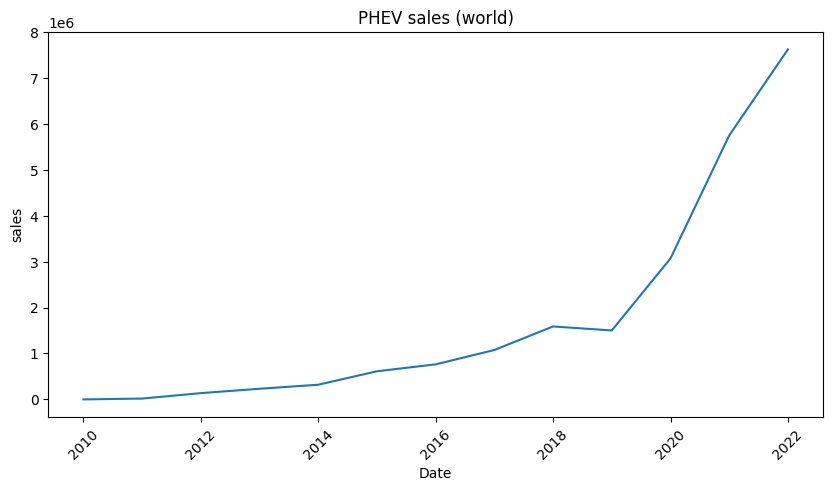

In [196]:
plt.figure(figsize=(10, 5))
plt.plot(df_PHEV['Year'], df_PHEV['Number'])
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('PHEV sales (world)')
plt.xticks(rotation=45)
plt.show()

In [526]:
df_PHEV = df_PHEV.pct_change()

In [527]:
df_PHEV['Year'] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [528]:
pd.DataFrame(df_PHEV['Number'].describe())

Number
count  12.000000
mean    2.899749
std     6.617913
min    -0.054578
25%     0.366492
50%     0.584574
75%     0.945655
max    23.228498

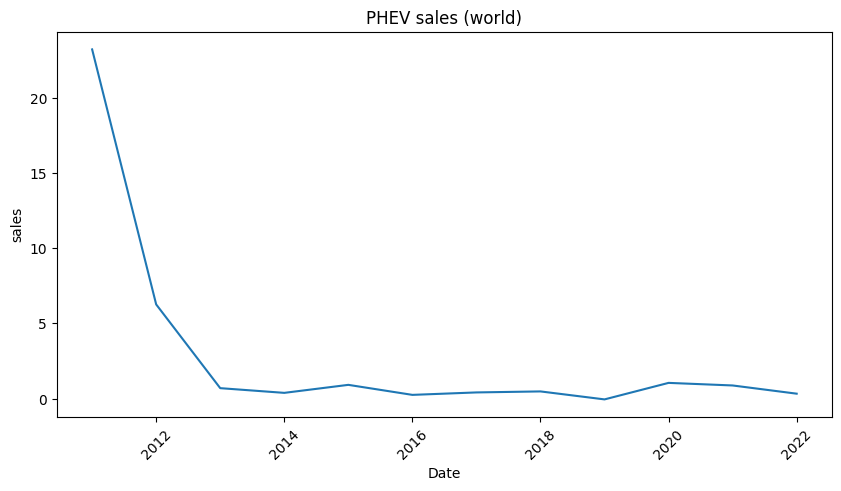

In [531]:
plt.figure(figsize=(10, 5))
plt.plot(df_PHEV['Year'], df_PHEV['Number'])
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('PHEV sales (world)')
plt.xticks(rotation=45)
plt.show()

## Lithium Production (world)

In [482]:
df_production = pd.read_csv('./Data/lithium-production.csv')
df_production = df_production[df_production['Entity'] == 'World']

In [483]:
del df_production['Entity']
del df_production['Code']

In [484]:
df_production.set_index('Year', inplace = True)

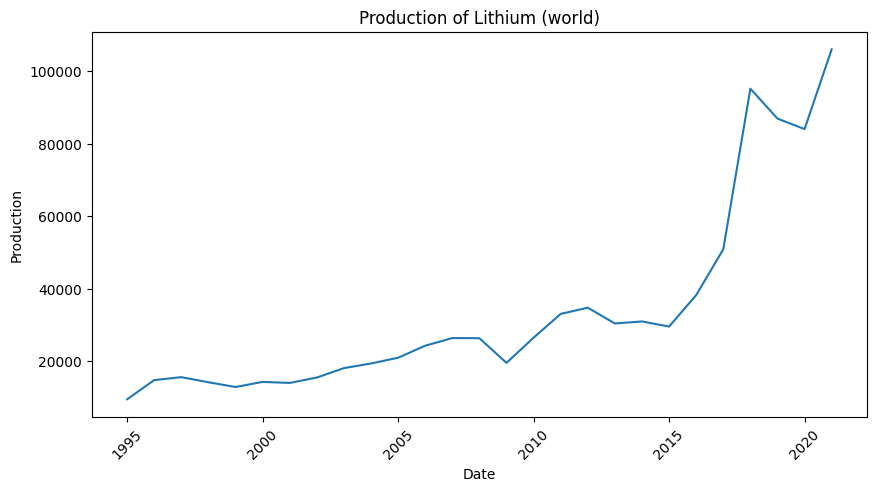

In [485]:
plt.figure(figsize=(10, 5))
plt.plot(df_production.index, df_production)
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Production of Lithium (world)')
plt.xticks(rotation=45)
plt.show()

In [486]:
df_production = df_production.pct_change()

In [487]:
pd.DataFrame(df_production.describe())

Lithium Production-Reserves
count                    26.000000
mean                      0.118137
std                       0.234188
min                      -0.258133
25%                      -0.029838
50%                       0.076210
75%                       0.227710
max                       0.870873

In [746]:
df_production.to_csv('Lithium Production.csv',index= False)

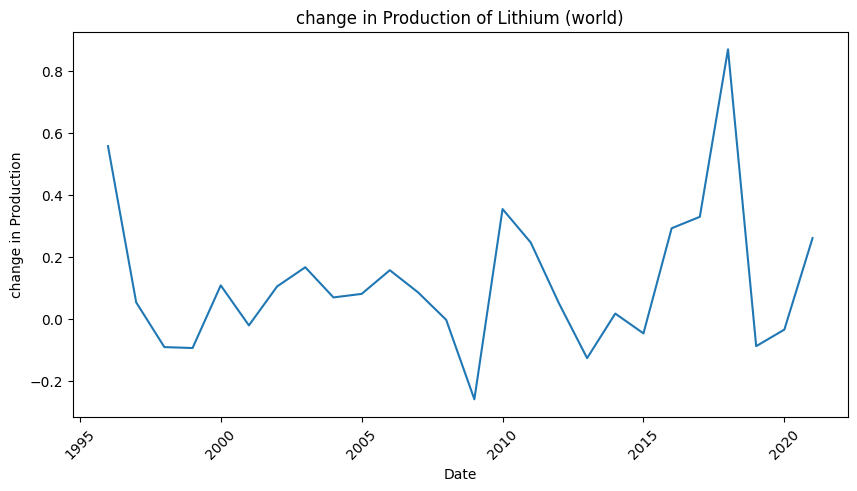

In [489]:
plt.figure(figsize=(10, 5))
plt.plot(df_production.index, df_production)
plt.xlabel('Date')
plt.ylabel('change in Production')
plt.title('change in Production of Lithium (world)')
plt.xticks(rotation=45)
plt.show()

# To be done...

## Lithium Reserves

## Price of alternatives

## Alternative Energy Market Share:

## Cobalt

## Nickel

* I can only get monthly historical data of Nickel
* 'PNICKUSDM'

## Nickel-related stocks

In [390]:
NI_stock_list = ['NCP.TO','NIC.AU','POS.AU','AXN.AU','PNM.AU','NKL.AU','WIN.AU','NIS.AU','NNL.AU',
                 'NCPCF.US','NIKL.PSE','FPX.V','NKL.V','CNC.V','PNPN.V','FLYN.V','ZBNI.V',
                 'PNRL.V','FTJ.V','NNX.V','NCP.TO']

In [391]:
api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

# 获取每个股票的 DataFrame 并存储在字典中
for stock in NI_stock_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        # 仅为非 "Date" 列添加后缀
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        # 将 DataFrame 存储在字典中，使用股票代码作为键
        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

# 创建一个包含所有交易日期的单独 DataFrame
all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_NI = all_dates_df
for stock, df in dataframes.items():
    df_NI = df_NI.merge(df, on='Date', how='left')

In [392]:
df_NI

Date  Open_NCP.TO  High_NCP.TO  Low_NCP.TO  Close_NCP.TO   
0     2005-01-03          NaN          NaN         NaN           NaN  \
1     2005-01-04          NaN          NaN         NaN           NaN   
2     2005-01-05          NaN          NaN         NaN           NaN   
3     2005-01-06          NaN          NaN         NaN           NaN   
4     2005-01-07          NaN          NaN         NaN           NaN   
...          ...          ...          ...         ...           ...   
4674  2022-12-23         0.06         0.06        0.06          0.06   
4675  2022-12-27          NaN          NaN         NaN           NaN   
4676  2022-12-28         0.06         0.06        0.06          0.06   
4677  2022-12-29         0.06         0.06        0.05          0.05   
4678  2022-12-30         0.06         0.06        0.06          0.06   

      Adjusted_close_NCP.TO  Volume_NCP.TO  Open_NIC.AU  High_NIC.AU   
0                       NaN            NaN          NaN          NaN  \
1                       NaN            NaN          NaN          NaN   
2                       NaN            NaN          NaN          NaN   
3                       NaN            NaN          NaN          NaN   
4                       NaN            NaN          NaN          NaN   
...                     ...            ...          ...          ...   
4674                   0.06        83200.0        0.975        0.980   
4675                    NaN            NaN          NaN          NaN   
4676                   0.06       111600.0        0.970        0.970   
4677                   0.05       677500.0        0.955        0.975   
4678                   0.06        22700.0        0.965        0.990   

      Low_NIC.AU  ...  Low_FTJ.V  Close_FTJ.V  Adjusted_close_FTJ.V   
0            NaN  ...        NaN          NaN                   NaN  \
1            NaN  ...       5.60         5.60                  5.60   
2            NaN  ...       5.60         5.60                  5.60   
3            NaN  ...       5.60         5.60                  5.60   
4            NaN  ...       5.60         5.60                  5.60   
...          ...  ...        ...          ...                   ...   
4674      0.9500  ...       0.03         0.03                  0.03   
4675         NaN  ...        NaN          NaN                   NaN   
4676      0.9500  ...       0.03         0.03                  0.03   
4677      0.9525  ...       0.03         0.03                  0.03   
4678      0.9600  ...       0.03         0.03                  0.03   

      Volume_FTJ.V  Open_NNX.V  High_NNX.V  Low_NNX.V  Close_NNX.V   
0              NaN         NaN         NaN        NaN          NaN  \
1              0.0         NaN         NaN        NaN          NaN   
2              0.0         NaN         NaN        NaN          NaN   
3              0.0         NaN         NaN        NaN          NaN   
4              0.0         NaN         NaN        NaN          NaN   
...            ...         ...         ...        ...          ...   
4674           0.0       0.030       0.030      0.030        0.030   
4675           NaN         NaN         NaN        NaN          NaN   
4676           0.0       0.035       0.035      0.035        0.035   
4677      300000.0       0.035       0.035      0.035        0.035   
4678           0.0       0.030       0.030      0.030        0.030   

      Adjusted_close_NNX.V  Volume_NNX.V  
0                      NaN           NaN  
1                      NaN           NaN  
2                      NaN           NaN  
3                      NaN           NaN  
4                      NaN           NaN  
...                    ...           ...  
4674                 0.030       35000.0  
4675                   NaN           NaN  
4676                 0.035        2000.0  
4677                 0.035           0.0  
4678                 0.030        1000.0  

[4679 rows x 121 columns]

In [ ]:
df_NI.set_index('Date', inplace=True)
for col in df_EV.columns:
    df_EV[col] = pd.to_numeric(df_EV[col], errors='coerce')

## Nickel-related ETFs

In [403]:
NiETF_list = ['NIKL.US','JJN.US','CHRG.US','B4NR.XETRA',
            'B4NC.XETRA','0GZC.XETRA','LNIK.LSE','NICK.LSE','SNIK.LSE']

In [404]:
api_token = "5f3afd582bd7b4.95720069"
dataframes = {}

# 获取每个股票的 DataFrame 并存储在字典中
for stock in NiETF_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        # 仅为非 "Date" 列添加后缀
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

        # 将 DataFrame 存储在字典中，使用股票代码作为键
        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")

# 创建一个包含所有交易日期的单独 DataFrame
all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
all_dates_df = pd.DataFrame({'Date': all_dates})

# 合并所有 DataFrame
df_NIETF = all_dates_df
for stock, df in dataframes.items():
    df_NIETF = df_NIETF.merge(df, on='Date', how='left')

KeyError: 'Date'

In [ ]:
NiETF_list = ['NIKL.US','JJN.US','CHRG.US','B4NR.XETRA',
            'B4NC.XETRA','0GZC.XETRA','LNIK.LSE','NICK.LSE','SNIK.LSE']

In [406]:
# 获取每个股票的 DataFrame 并存储在字典中
for stock in NiETF_list:
    url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

    response = requests.get(url)
    
    if response.status_code == 200:
        csv_data = io.StringIO(response.text)
        df = pd.read_csv(csv_data)
        
        # 仅为非 "Date" 列添加后缀
        df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)
        print(stock)
        print(df)
        # 将 DataFrame 存储在字典中，使用股票代码作为键
        dataframes[stock] = df
    else:
        print(f"Error: API request for {stock} failed with status code {response.status_code}")


NIKL.US
Empty DataFrame
Columns: [Value_NIKL.US]
Index: []
JJN.US
            Date  Open_JJN.US  High_JJN.US  Low_JJN.US  Close_JJN.US   
0     2018-01-18       50.600      50.6000       50.60       50.6000  \
1     2018-01-25       55.300      55.3000       55.29       55.2900   
2     2018-01-29       55.750      55.7500       55.75       55.7500   
3     2018-02-01       56.370      56.4000       56.37       56.4000   
4     2018-02-02       54.050      54.4800       54.05       54.4800   
...          ...          ...          ...         ...           ...   
1150  2022-12-23       39.375      39.5340       39.13       39.5340   
1151  2022-12-27       39.600      41.8000       39.55       40.9300   
1152  2022-12-28       39.870      41.5764       39.87       40.1200   
1153  2022-12-29       39.900      40.1300       39.77       40.0800   
1154  2022-12-30       40.900      40.9000       39.55       39.7253   

      Adjusted_close_JJN.US  Volume_JJN.US  
0                   16.8

NICK.LSE
            Date  Open_NICK.LSE  High_NICK.LSE  Low_NICK.LSE  Close_NICK.LSE   
0     2006-09-28          32.30          32.36         32.30          32.300  \
1     2006-09-29          32.33          32.33         32.00          32.330   
2     2006-10-04          32.68          32.68         31.49          31.490   
3     2006-10-06          32.70          33.30         32.68          32.680   
4     2006-10-09          33.28          33.39         33.28          33.280   
...          ...            ...            ...           ...             ...   
3923  2022-12-22          26.51          26.99         26.51          26.990   
3924  2022-12-23          28.00          28.00         27.39          27.590   
3925  2022-12-28          27.95          29.03         27.95          28.300   
3926  2022-12-29          28.21          28.30         28.10          28.100   
3927  2022-12-30          28.80          28.80         28.06          28.375   

      Adjusted_close_NICK.LSE 

## Nickel-related indecies

## Nickel Futures from investing.com

### MNKc1

In [227]:
df_MNKc1 = pd.read_csv('./Data/Nickel Futures Historical Data.csv')
df_MNKc1['Date'] = pd.to_datetime(df_MNKc1['Date'])
df_MNKc1= df_MNKc1[::-1]
df_MNKc1 = df_MNKc1.reset_index(drop=True)
df_MNKc1

Date    Price     Open     High      Low   Vol. Change %
0    2005-01-01    607.0    607.0    607.0    607.0    NaN   -2.65%
1    2005-01-03    607.0    607.0    607.0    607.0    NaN    0.00%
2    2005-01-04    607.0    607.0    607.0    607.0    NaN    0.00%
3    2005-01-05    607.5    642.0    642.0    573.0  2.00K    0.08%
4    2005-01-06    607.5    607.5    607.5    607.5    NaN    0.00%
...         ...      ...      ...      ...      ...    ...      ...
4995 2022-10-26  1,873.0  1,873.0  1,873.0  1,873.0    NaN    0.00%
4996 2022-10-27  1,890.0  1,890.0  1,890.0  1,890.0    NaN    0.91%
4997 2022-10-28  1,897.0  1,897.0  1,897.0  1,897.0    NaN    0.37%
4998 2022-10-31  1,902.5  1,902.5  1,902.5  1,902.5    NaN    0.29%
4999 2022-11-01  1,900.0  1,900.0  1,900.0  1,900.0  0.01K   -0.13%

[5000 rows x 7 columns]

### NICKELc1

In [ ]:
df_NICKELc1 = pd.read_csv('./Data/Nickel Futures Historical Data.csv')

### MNKc2

In [ ]:
df_MNKc2 = pd.read_csv('./Data/Nickel Futures Historical Data.csv')

### SNIc1

In [ ]:
df_SNIc1 = pd.read_csv('./Data/Nickel Futures Historical Data.csv')

##  the price of other battery materials, such as cobalt and copper, can also impact the price of lithium

In [ ]:
data = pd.read_csv('/Users/yangli/Desktop/indexv2.csv')
data.set_index('DATE', inplace = True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = data.dropna(how='any')
X = data.iloc[:,0]
y = data.iloc[:,1] 
X = X.to_frame()
y = y.to_frame()
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_0 = LinearRegression()
model_0.fit(X_train, y_train)

y_pred = model_0.predict(X_test)
y_train_pred = model_0.predict(X_train)



from sklearn.metrics import r2_score

# 计算R平方值
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
# 打印R平方值
print("R-squared:", r2)
print("R-squared_train:", r2_train)


# upstream

# Midstream

# downstream